<a href="https://colab.research.google.com/github/AuntiesSnail/DADS5001-Mini-Project/blob/main/ProjectDADS_5001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-Project DADS5001: Credit Card Churning** 💳


---
 By Good People Good Deeds 🌼




In [23]:
!pip install "pandas>=2.0.0"

In [24]:
!pip install --upgrade matplotlib

In [25]:
!pip install squarify

In [26]:
!pip install scipy

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: Introduction


---

**Business Problem:**

ธนาคารแห่งหนึ่งต้องการวิเคราะห์หาลูกค้าที่มีแนวโน้มจะยกเลิกการใช้บริการบัตรเครดิตเพื่อที่จะได้มอบการบริการที่ดีขึ้นและกระตุ้นการตัดสินใจของลูกค้าให้กลับมาใช้บริการอีกครั้ง

**Dataset:**

Kaggle: [Predicting Credit Card Customer Segmentation](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)

Credit: [Data Source](https://zenodo.org/record/4322342#.Y8OsBdJBwUE)

#Part 2: Exploratory Data Analysis (EDA)


---



In [28]:
import sys
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import IPython
from IPython.display import display
import seaborn as sns
import squarify
import matplotlib
import matplotlib.font_manager as fm
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import math

plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Pandas 2.0.3
NumPy 1.22.4
IPython 7.34.0
Matplotlib 3.7.1


**Data Cleaning:** ข้อมูลลูกค้า Consumer Credit Card Portfolio


---




In [29]:
df_bank= pd.read_csv("BankChurners_data.csv")
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [30]:
df_bank.head(5)


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Naive_Bayes1  Naive_Bayes2  
0                  0.061      0.000093       0.99991  
1                  0.105      0.000057       0.99994  
2                  0.000      0.000021       0.99998  
3                  0.760      0.000134       0.99987  
4                  0.000      0.000022       0.99998  

[5 rows x 23 columns]

In [31]:
#Check  Unknown data (Education_Level, Marital_Status, Income_Category)
x1 = df_bank['Attrition_Flag'].value_counts()
print(x1)

print('\n---Unknown Education----------')
query = (df_bank['Education_Level'] == 'Unknown')
x2 = df_bank[query]['Attrition_Flag'].value_counts()
print(x2)

print('\n---Unknown Marital_Status----------')
c = df_bank['Marital_Status'].value_counts()
print(c)
query = (df_bank['Marital_Status'] == 'Unknown')
x3 = df_bank[query]['Attrition_Flag'].value_counts()
print(x3)

print('\n---Unknown Income----------')
query = (df_bank['Income_Category'] == 'Unknown')
x4 = df_bank[query]['Attrition_Flag'].value_counts()
print(x4)

print('\n---Card Category----------')
df_bank.groupby(['Card_Category'])['Attrition_Flag'].value_counts()
x5 = df_bank['Card_Category'].value_counts()
print(x5)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

---Unknown Education----------
Attrition_Flag
Existing Customer    1263
Attrited Customer     256
Name: count, dtype: int64

---Unknown Marital_Status----------
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Attrition_Flag
Existing Customer    620
Attrited Customer    129
Name: count, dtype: int64

---Unknown Income----------
Attrition_Flag
Existing Customer    925
Attrited Customer    187
Name: count, dtype: int64

---Card Category----------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


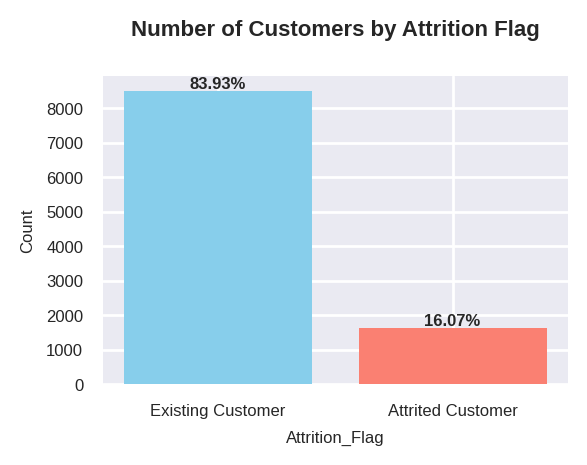

In [32]:
#Count the occurrences of each category in Attrition_Flag column
count_data = df_bank['Attrition_Flag'].value_counts()
total_count = count_data.sum()
percentage_data = count_data / total_count * 100

bar_colors = ['skyblue', 'salmon']
fig, ax = plt.subplots(figsize=(3,2 ), dpi=200)
bars = ax.bar(count_data.index, count_data, color=bar_colors)
ax.set_xlabel('Attrition_Flag',fontsize=6)
ax.set_ylabel('Count',fontsize=6)
ax.set_title('Number of Customers by Attrition Flag\n', fontweight='bold',fontsize=8)
ax.tick_params(axis='both', labelsize=6)

#Show the count values as percentages
for i, v in enumerate(percentage_data):
    ax.text(i, count_data[i], f'{v:.2f}%', ha='center', va='bottom', fontweight='bold',fontsize=6)

plt.show()

In [33]:
#Categorical data

columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Calculate the number of rows and columns for the subplots
num_cols = 3
num_rows = math.ceil(len(columns) / num_cols)

# Create a figure with subplots in a matrix layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10), dpi=200)
fig.subplots_adjust(hspace=0.7, wspace=0.5)

# Flatten the axes array for easier indexing
axes = axes.flatten()
hist_color = '#039BE5'

# Iterate over the columns and plot histograms
for i, col in enumerate(columns):
    # Plot histogram for the current column
    df_bank[col].value_counts().plot(kind='bar', ax=axes[i], color=hist_color)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(col, fontweight='bold')

# Hide any unused subplots
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')


fig.tight_layout()
plt.show()


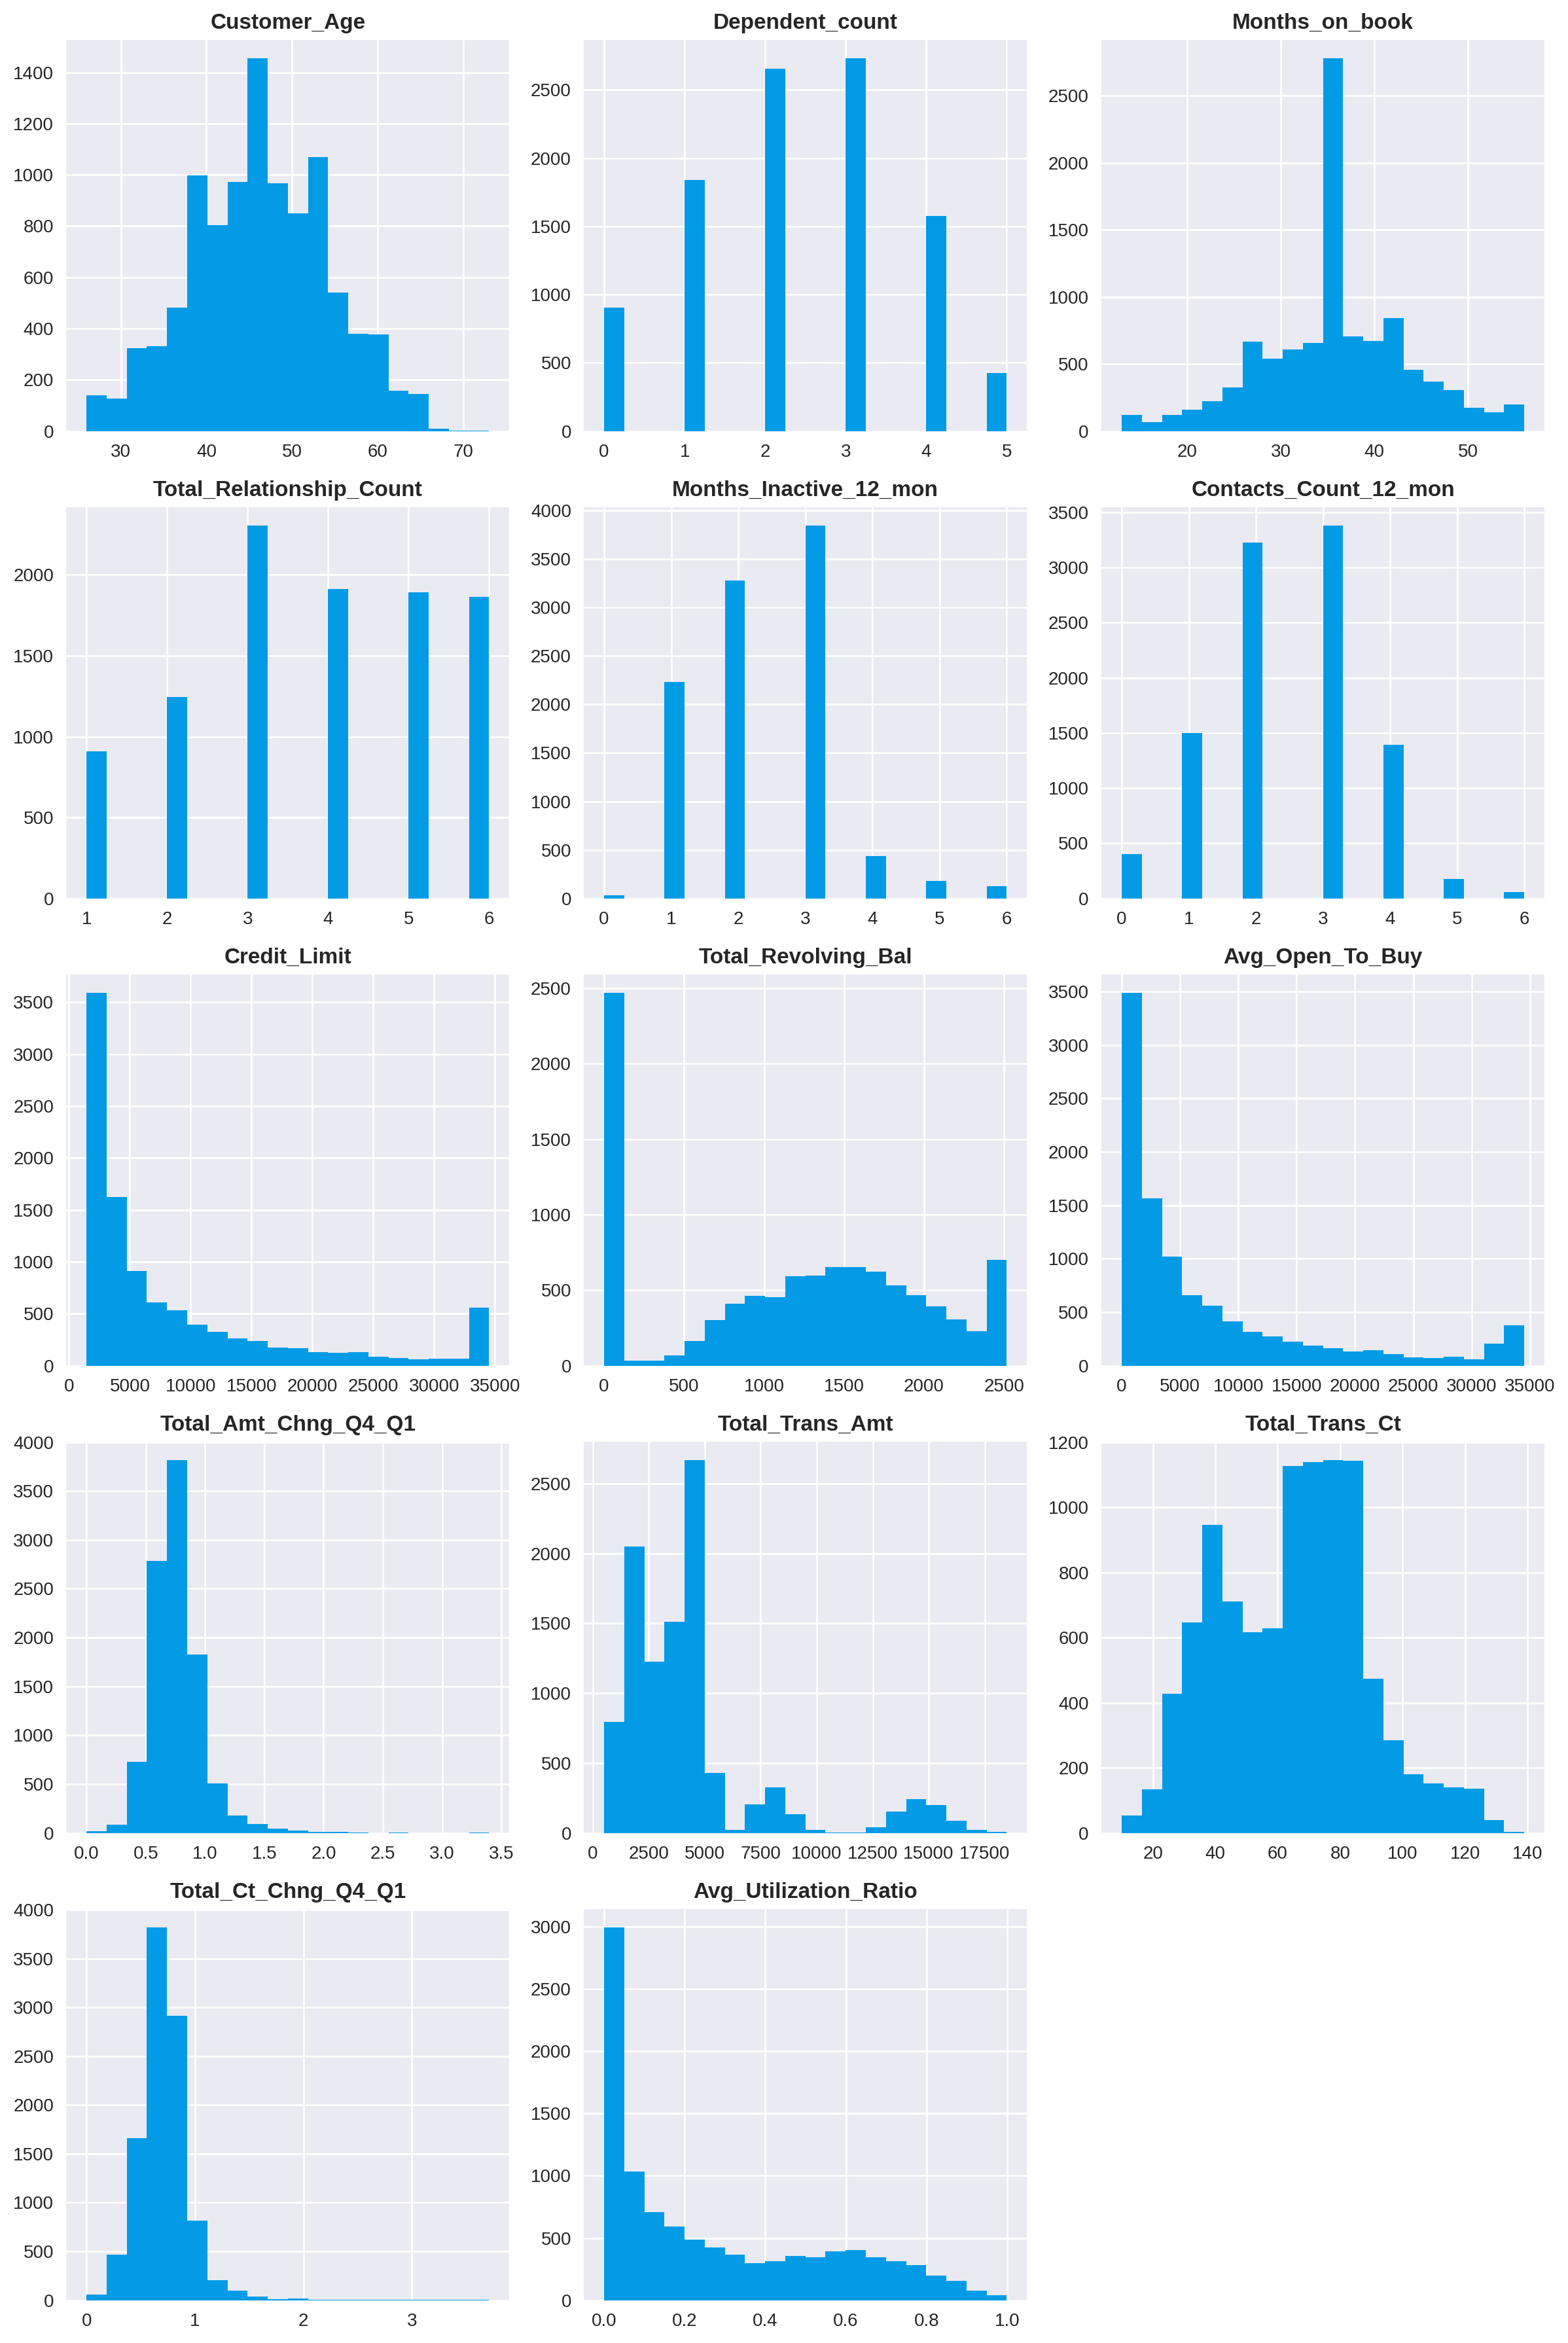

In [34]:
#Numerical data

numerical_columns = ['Customer_Age', 'Dependent_count','Months_on_book', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Calculate the number of rows and columns for the subplots
num_cols = 3
num_rows = math.ceil(len(numerical_columns) / num_cols)

# Create a figure with subplots in a matrix layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 18), dpi=200)
axes = axes.flatten()
hist_color = '#039BE5'

# Iterate over the numerical columns and plot histograms
for i, col in enumerate(numerical_columns):
    # Plot histogram for the current column
    df_bank[col].plot.hist(ax=axes[i], bins=20, color=hist_color)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(col, fontweight='bold')

# Hide any unused subplots
if len(numerical_columns) < len(axes):
    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

fig.tight_layout()
plt.show()


In [35]:
#Drop column that will be not used
df_bank = df_bank.drop(columns = ['Naive_Bayes1','Naive_Bayes2'])

check = df_bank.columns
print(check)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [36]:
#Set RFM by binning the raw RFM metrics into quintiles
df_bank['percentile_R'] = df_bank['Months_on_book'].rank(pct=True)
df_bank['rank_R'] = pd.cut(df_bank['percentile_R'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['percentile_F'] = df_bank['Total_Trans_Ct'].rank(pct=True)
df_bank['rank_F'] = pd.cut(df_bank['percentile_F'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['percentile_M'] = df_bank['Total_Trans_Amt'].rank(pct=True)
df_bank['rank_M'] = pd.cut(df_bank['percentile_M'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['type'] = df_bank.apply(lambda x : str(x['rank_R']) + str(x['rank_F']) + str(x['rank_M']) ,axis = 1)



df_bank.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              39  ...              42                1.625   
1              44  ...              33                3.714   
2              36  ...              20                2.333   
3              34  ...              20                2.333   
4              21  ...              28                2.500   

   Avg_Utilization_Ratio  percentile_R  rank_R  percentile_F  rank_F  \
0                  0.061      0.705145       4      0.211563       2   
1                  0.105      0.849264       5      0.094845       1   
2                  0.000      0.497087       3      0.010862       1   
3                  0.760      0.326750       2      0.010862       1   
4                  0.000      0.041967       1      0.049669       1   

   percentile_M  rank_M  type  
0      0.027698       1   421  
1      0.051595       1   511  
2      0.193098       1   311  
3      0.030907       1   211  
4      0.007307       1   111  

[5 rows x 28 columns]

In [37]:
#Read data in "Segment" Table
df_seg = pd.read_csv("segment.csv", sep=',', encoding='latin-1')
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RFM            125 non-null    int64 
 1   Segment        125 non-null    object
 2   No             125 non-null    int64 
 3   Group Segment  125 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.0+ KB


In [38]:
#Joining Table
df_bank['type'] = df_bank['type'].astype(int)

result = pd.merge(df_bank, df_seg, left_on='type', right_on='RFM', how='inner')
result.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  785387883  Existing Customer            47      F                3   
2  780466533  Existing Customer            54      M                3   
3  799224108  Existing Customer            46      F                4   
4  709122483  Existing Customer            56      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1     High School         Single     $40K - $60K          Blue   
2       Doctorate        Married         $120K +          Blue   
3        Graduate         Single  Less than $40K          Blue   
4        Graduate        Married     $60K - $80K          Blue   

   Months_on_book  ...  rank_R  percentile_F  rank_F  percentile_M  rank_M  \
0              39  ...       4      0.211563       2      0.027698       1   
1              41  ...       4      0.273181       2      0.124173       1   
2              41  ...       4      0.321171       2      0.189790       1   
3              40  ...       4      0.225338       2      0.150834       1   
4              37  ...       4      0.337119       2      0.198479       1   

   type  RFM         Segment  No     Group Segment  
0   421  421  About to sleep   7  7.About to sleep  
1   421  421  About to sleep   7  7.About to sleep  
2   421  421  About to sleep   7  7.About to sleep  
3   421  421  About to sleep   7  7.About to sleep  
4   421  421  About to sleep   7  7.About to sleep  

[5 rows x 32 columns]

In [52]:
#Take into account the attrited customer's historical data to understand their past behavior and interactions

desired_order = ['1.Champions', '2.Loyal Customers', '3.Potential loyalist', '4.Recent customers', '5.Promising',
                 '6.Need Attention', '7.About to sleep', '8.At risk', '9.Can not lose them', '10.Hibernating', '11.Lost']


df_attrited = result[result['Attrition_Flag'] == 'Attrited Customer']
sum_transc = df_attrited['Total_Trans_Amt'].sum()

# Calculate the sum of total transaction amount by segment
segment_totals = df_attrited.groupby('Group Segment')['Total_Trans_Amt'].sum().sort_values(ascending=False)
segment_totals = segment_totals / 100000

colors = sns.color_palette("Paired", 10)
plt.figure(figsize=(10, 5), dpi=200)


# Plot the bar chart
sns.barplot(x=segment_totals.index, y=segment_totals.values, palette=colors)

# Plot a line plot over the bar graph
plt.plot(segment_totals.index, segment_totals.values, marker='o', color='red')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Segment',fontsize=10, labelpad = 10)
plt.ylabel('Total Amount of Transaction (in 100K)',fontsize=10, labelpad = 10)
plt.title('Total Transaction Amount for Attrited Customers by Segment',fontweight='bold', fontsize=12)


plt.show()
print(f'Total Amount of Transaction (Attrited Customer) is {sum_transc:.2f}')

Total Amount of Transaction (Attrited Customer) is 5035607.00


In [40]:
#Numerical variable: Consider correlations values

encoding = {'Attrited Customer': 1, 'Existing Customer': 0}

# Map the encoding to the Attrition_Flag column
df_bank['Attrition_Encoded'] = df_bank['Attrition_Flag'].map(encoding)

# Select the columns for correlation calculation
columns_for_correlation = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                           'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                           'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                           'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Calculate correlation between selected columns and Attrition_Encoded
correlations = df_bank[columns_for_correlation].corrwith(df_bank['Attrition_Encoded'])
correlations_df = pd.DataFrame({'Attribute': correlations.index, 'Value': correlations.values})

correlations_df = correlations_df.sort_values(by='Value', ascending=False)
display(correlations_df)

Attribute     Value
5      Contacts_Count_12_mon  0.204491
4     Months_Inactive_12_mon  0.152449
1            Dependent_count  0.018991
0               Customer_Age  0.018203
2             Months_on_book  0.013687
8            Avg_Open_To_Buy -0.000285
6               Credit_Limit -0.023873
9       Total_Amt_Chng_Q4_Q1 -0.131063
3   Total_Relationship_Count -0.150005
10           Total_Trans_Amt -0.168598
13     Avg_Utilization_Ratio -0.178410
7        Total_Revolving_Bal -0.263053
12       Total_Ct_Chng_Q4_Q1 -0.290054
11            Total_Trans_Ct -0.371403

In [41]:
 #Categorical variables: Consider a significant relationship with churn for further analysis

# Select the categorical variables of interest
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Perform chi-square tests
significant_vars = []
for var in categorical_vars:
    contingency_table = pd.crosstab(df_bank['Attrition_Flag'], df_bank[var])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Check if the p-value is below the significance level (e.g., 0.05)
    if p_value < 0.05:
        significant_vars.append(var)
        print("Significant relationship between 'Attrition_Flag' and", var)
        print("Chi-square statistic:", chi2)
        print("P-value:", p_value)
        print()


Significant relationship between 'Attrition_Flag' and Gender
Chi-square statistic: 13.865613700637342
P-value: 0.00019635846717310269

Significant relationship between 'Attrition_Flag' and Income_Category
Chi-square statistic: 12.832259274756895
P-value: 0.025002425704390617



**RFM Model:** ใช้สำหรับพิจารณาแบ่งกลุ่ม Customer Segment


---




In [42]:
#Select the desired columns from df_bank
selected_columns = ['CLIENTNUM', 'Months_on_book', 'Total_Trans_Ct', 'Total_Trans_Amt']
selected_data = df_bank[selected_columns]

display(selected_data.head(5))

CLIENTNUM  Months_on_book  Total_Trans_Ct  Total_Trans_Amt
0  768805383              39              42             1144
1  818770008              44              33             1291
2  713982108              36              20             1887
3  769911858              34              20             1171
4  709106358              21              28              816

**Calculating RFM Scores:** กำหนดเกณฑ์คะแนนตั้งแต่ 1 ถึง 5 และแบ่งจำนวนลูกค้าออกเป็นทั้งหมด 5 ช่วง เพื่อให้คะแนนในแต่ละด้านของ RFM Model


---



In [43]:
#Set RFM by binning the raw RFM metrics into quintiles
df_bank['percentile_R'] = df_bank['Months_on_book'].rank(pct=True)
df_bank['rank_R'] = pd.cut(df_bank['percentile_R'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['percentile_F'] = df_bank['Total_Trans_Ct'].rank(pct=True)
df_bank['rank_F'] = pd.cut(df_bank['percentile_F'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['percentile_M'] = df_bank['Total_Trans_Amt'].rank(pct=True)
df_bank['rank_M'] = pd.cut(df_bank['percentile_M'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['type'] = df_bank.apply(lambda x : str(x['rank_R']) + str(x['rank_F']) + str(x['rank_M']) ,axis = 1)



df_bank.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0              39  ...                1.625                  0.061   
1              44  ...                3.714                  0.105   
2              36  ...                2.333                  0.000   
3              34  ...                2.333                  0.760   
4              21  ...                2.500                  0.000   

   percentile_R  rank_R  percentile_F  rank_F  percentile_M  rank_M  type  \
0      0.705145       4      0.211563       2      0.027698       1   421   
1      0.849264       5      0.094845       1      0.051595       1   511   
2      0.497087       3      0.010862       1      0.193098       1   311   
3      0.326750       2      0.010862       1      0.030907       1   211   
4      0.041967       1      0.049669       1      0.007307       1   111   

   Attrition_Encoded  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 29 columns]

In [44]:
df_seg = pd.read_csv("segment.csv", sep=',', encoding='latin-1')
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RFM            125 non-null    int64 
 1   Segment        125 non-null    object
 2   No             125 non-null    int64 
 3   Group Segment  125 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.0+ KB


In [45]:
df_bank['type'] = df_bank['type'].astype(int)

result = pd.merge(df_bank, df_seg, left_on='type', right_on='RFM', how='inner')
result.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  785387883  Existing Customer            47      F                3   
2  780466533  Existing Customer            54      M                3   
3  799224108  Existing Customer            46      F                4   
4  709122483  Existing Customer            56      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1     High School         Single     $40K - $60K          Blue   
2       Doctorate        Married         $120K +          Blue   
3        Graduate         Single  Less than $40K          Blue   
4        Graduate        Married     $60K - $80K          Blue   

   Months_on_book  ...  percentile_F  rank_F  percentile_M  rank_M  type  \
0              39  ...      0.211563       2      0.027698       1   421   
1              41  ...      0.273181       2      0.124173       1   421   
2              41  ...      0.321171       2      0.189790       1   421   
3              40  ...      0.225338       2      0.150834       1   421   
4              37  ...      0.337119       2      0.198479       1   421   

   Attrition_Encoded  RFM         Segment  No     Group Segment  
0                  0  421  About to sleep   7  7.About to sleep  
1                  0  421  About to sleep   7  7.About to sleep  
2                  0  421  About to sleep   7  7.About to sleep  
3                  0  421  About to sleep   7  7.About to sleep  
4                  0  421  About to sleep   7  7.About to sleep  

[5 rows x 33 columns]

In [46]:
# Select the desired columns
selected_columns = ['CLIENTNUM', 'Months_on_book', 'Total_Trans_Ct', 'Total_Trans_Amt', 'rank_R', 'rank_F', 'rank_M']
selected_data = result[selected_columns]

# Display the selected columns as a table
display(pd.DataFrame(selected_data.head(5)))

CLIENTNUM  Months_on_book  Total_Trans_Ct  Total_Trans_Amt rank_R rank_F  \
0  768805383              39              42             1144      4      2   
1  785387883              41              47             1594      4      2   
2  780466533              41              52             1873      4      2   
3  799224108              40              43             1715      4      2   
4  709122483              37              54             1909      4      2   

  rank_M  
0      1  
1      1  
2      1  
3      1  
4      1

พิจารณาแบ่งกลุ่ม Customer Segment ออกเป็นทั้งหมด 11 กลุ่ม ดังตาราง

Source: https://www.putler.com/rfm-analysis/

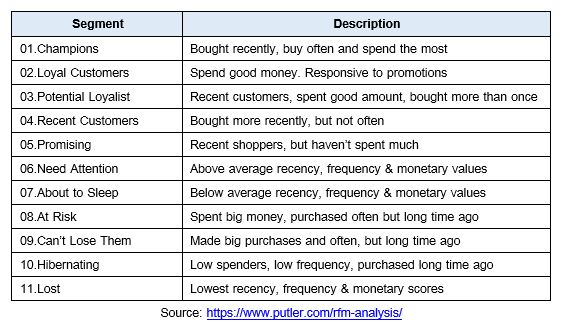

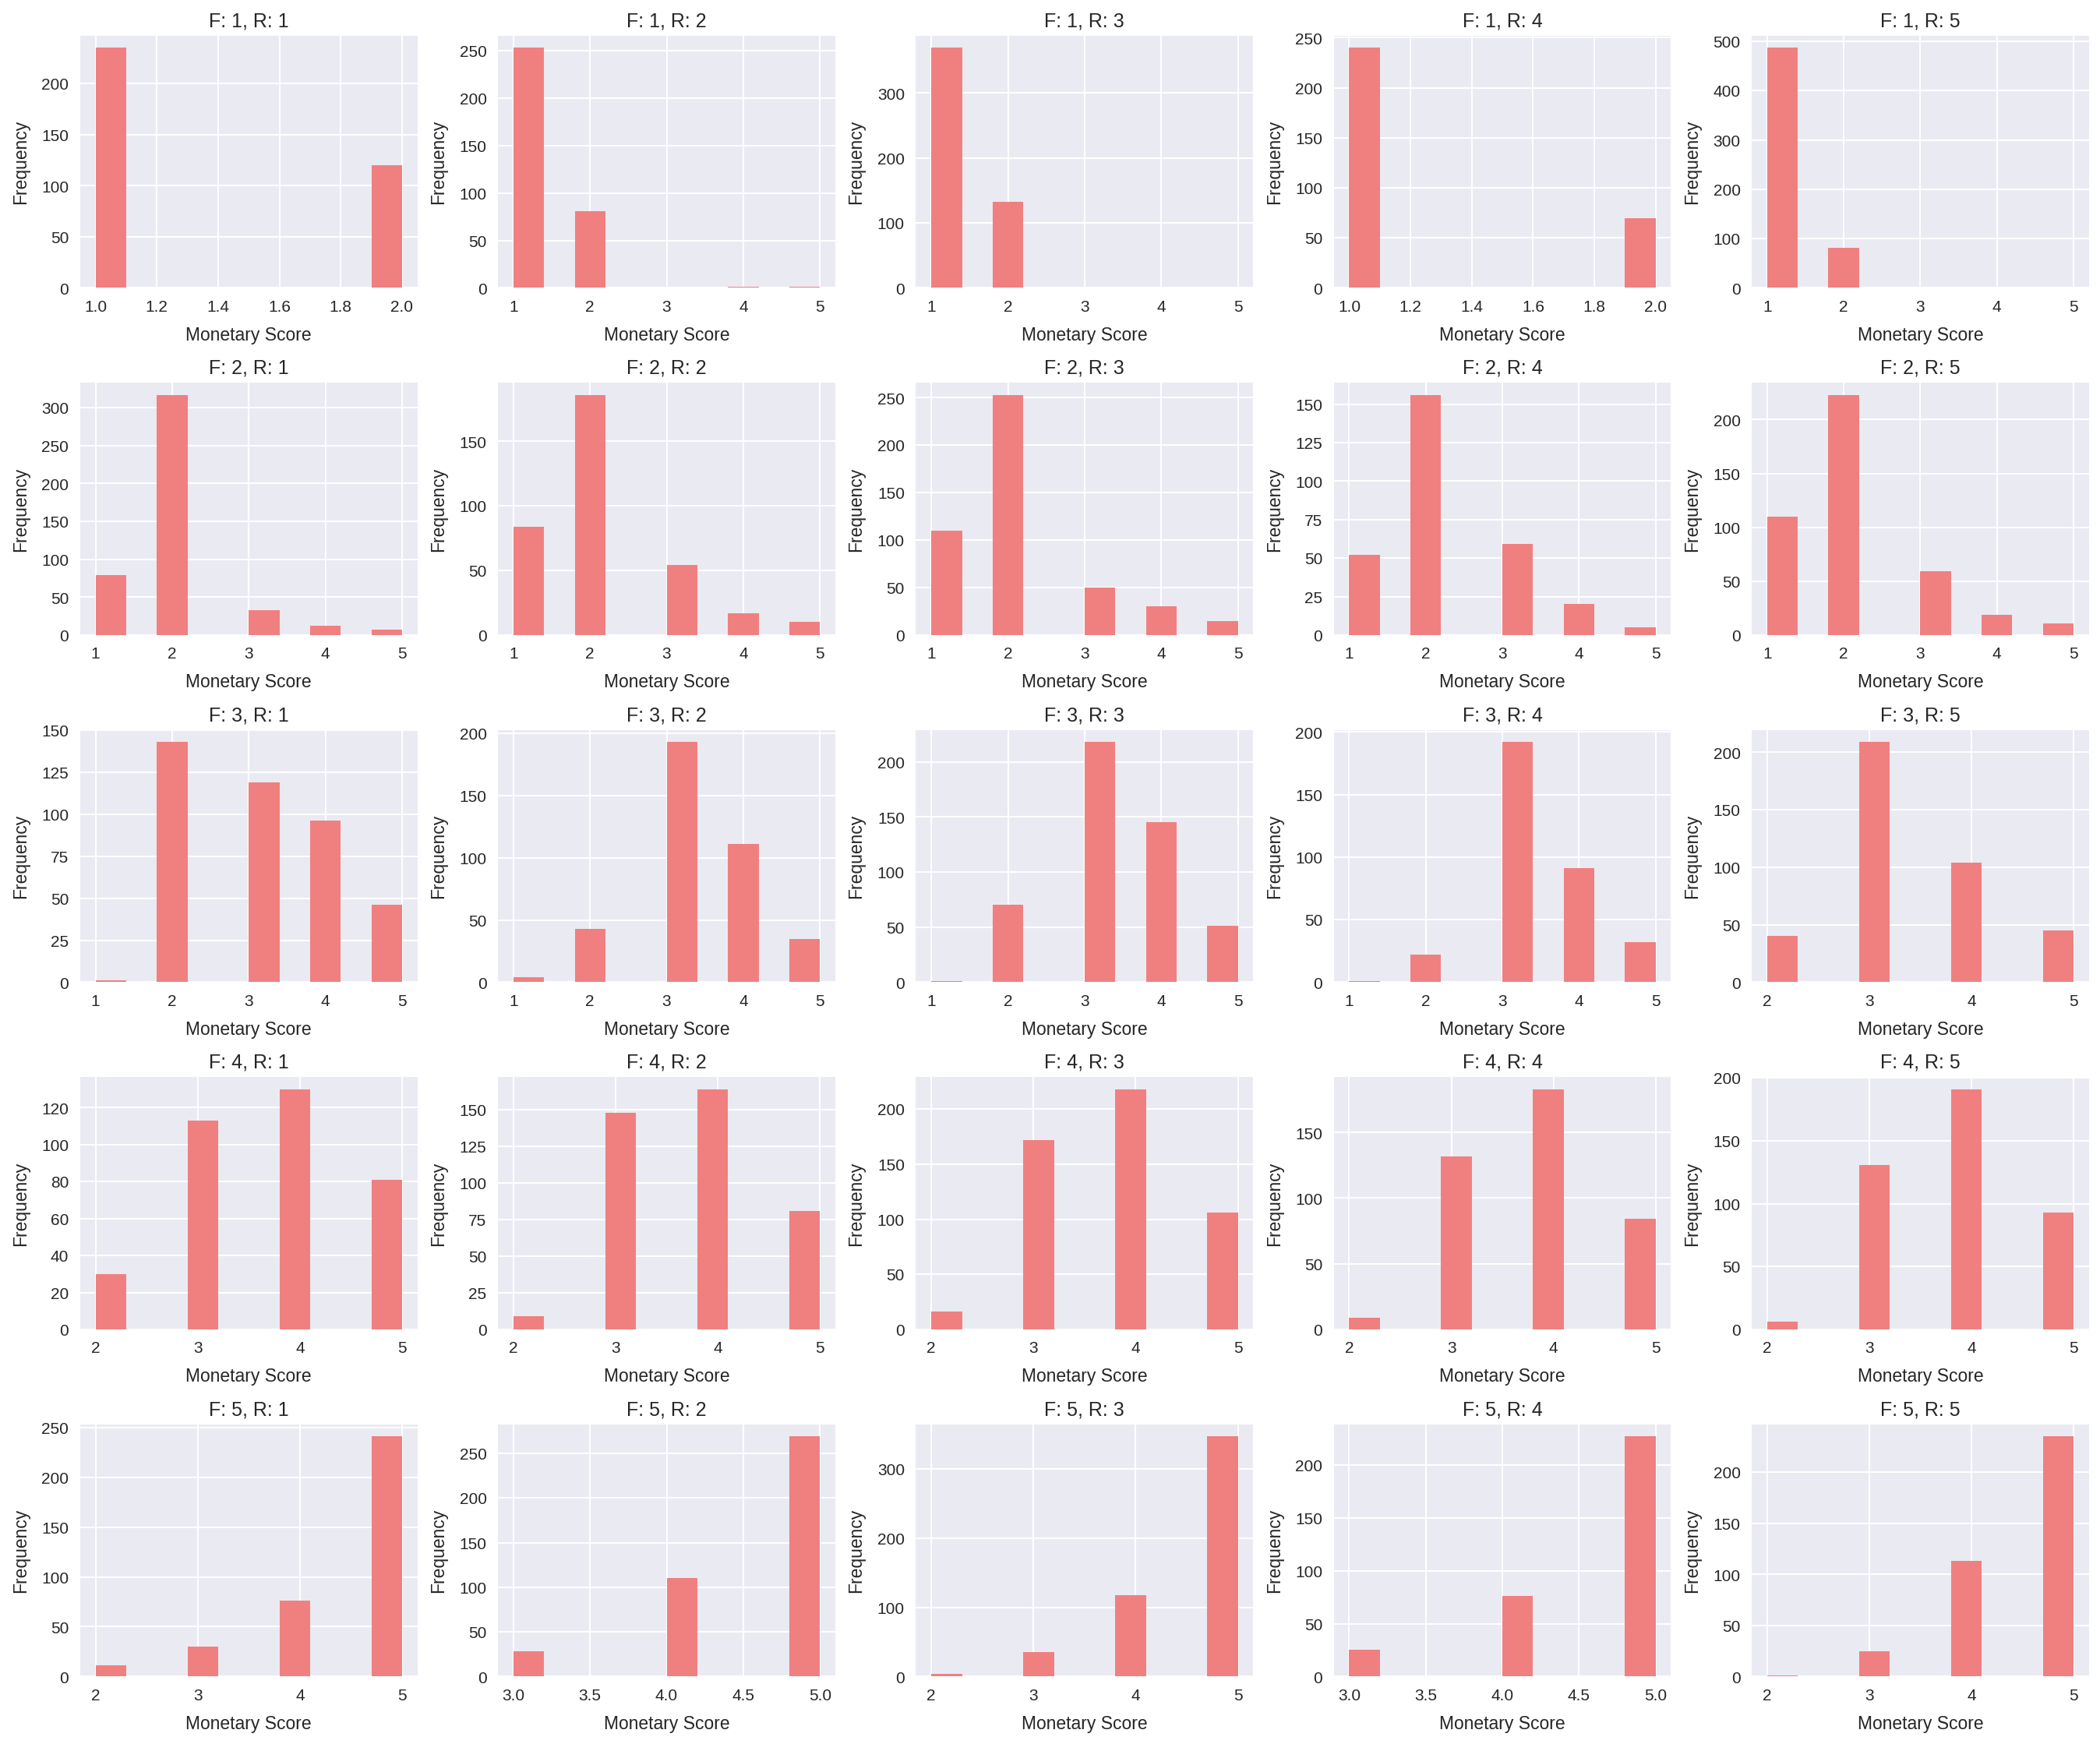

In [47]:
#Consider all possible combinations of frequency and recency scores

# Assuming you have three lists of ranks: rank_R, rank_F, rank_M
rank_R = result['rank_R']
rank_F = result['rank_F']
rank_M = result['rank_M']

# Creating a 5x5 grid of subplots (25 plots in total)
fig, axs = plt.subplots(5, 5, figsize=(18, 15), dpi=150)

# Iterating over all possible combinations of frequency and recency scores
for i, freq_score in enumerate(np.unique(rank_F)):
    for j, re_score in enumerate(np.unique(rank_R)):
        # Filtering the data for the current combination of scores
        filtered_data = rank_M[(rank_F == freq_score) & (rank_R == re_score)]

        # Plotting the histogram on the corresponding subplot with a custom color
        axs[i, j].hist(filtered_data, bins=10, color='#F08080')

        # Setting the title for the subplot
        axs[i, j].set_title(f'F: {freq_score}, R: {re_score}')

        # Setting labels for x and y axes
        axs[i, j].set_xlabel('Monetary Score')
        axs[i, j].set_ylabel('Frequency')

        # Adjusting the spacing between subplots
        axs[i, j].xaxis.set_label_coords(0.5, -0.15)
        axs[i, j].yaxis.set_label_coords(-0.15, 0.5)

plt.tight_layout()
plt.show()

#Part 3 : Analyzing and Insight

---



**Summary of Customer Segment**


---



In [48]:
df_grouped = result.groupby(by=['No','Segment'])['CLIENTNUM'].count().reset_index()
df_grouped.sort_values(by='No', ascending=True)
df_grouped.rename(columns={'CLIENTNUM':'Count_Customer'}, inplace=True)
display(df_grouped)

No             Segment  Count_Customer
0    1           Champions             988
1    2     Loyal Customers            1152
2    3  Potential loyalist             988
3    4    Recent customers            1329
4    5           Promising             479
5    6      Need Attention             763
6    7      About to sleep             295
7    8             At risk            1528
8    9   Can not lose them             541
9   10         Hibernating            1385
10  11                Lost             679

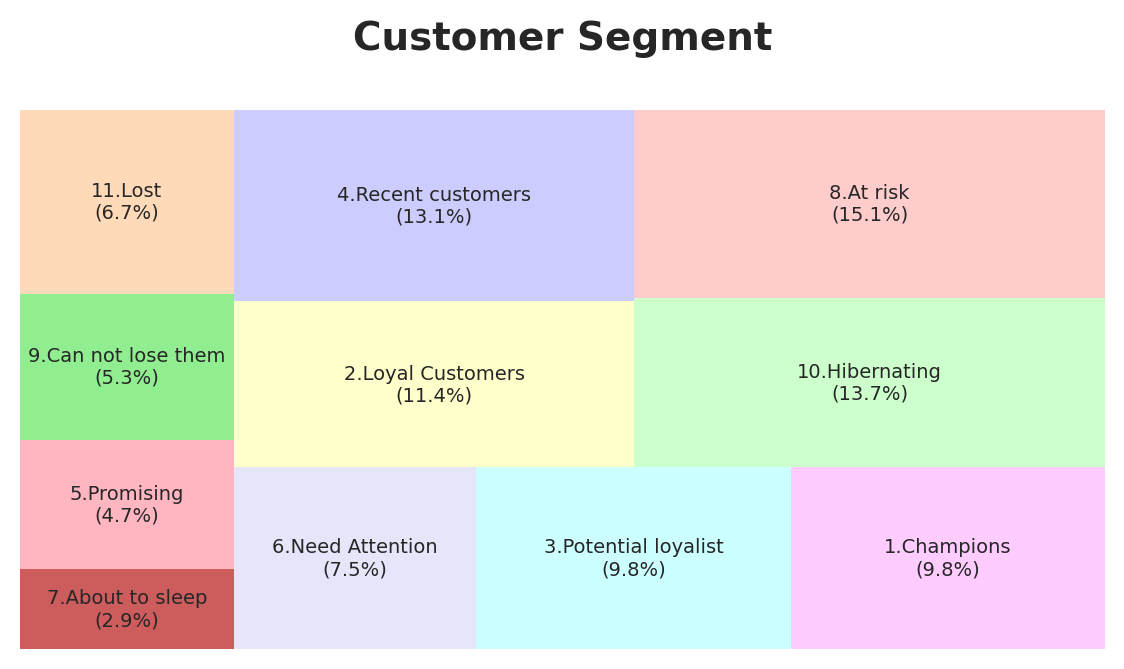

In [49]:
# Group the DataFrame by 'Group Segment' and count the number of occurrences
grouped = result.groupby('Group Segment')
count_values = grouped['CLIENTNUM'].count().to_frame()

# Set the font family
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']

# Create a figure with a specified size
plt.figure(figsize=(7, 3.5), dpi=200)

# Sort the values in descending order
sorted_values = count_values['CLIENTNUM'].sort_values(ascending=False)

# Define the sizes for the treemap in reverse order
sizes = sorted_values.values[::-1]

# Calculate the percentages
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

# Define the labels for each rectangle in reverse order
labels = [f"{label}\n({percent:.1f}%)" for label, percent in zip(sorted_values.index[::-1], percentages)]

# Define the colors for each rectangle in reverse order
colors = [
    "#FFCCCC",  # Light Red
    "#CCFFCC",  # Light Green
    "#CCCCFF",  # Light Blue
    "#FFFFCC",  # Light Yellow
    "#FFCCFF",  # Light Magenta
    "#CCFFFF",  # Light Cyan
    "#E6E6FA",  # Lavender
    "#FFDAB9",  # Peachpuff
    "#90EE90",  # Light Green
    "#FFB6C1",  # Light Pink
    "#CD5C5C"   # Indian Red
][::-1]

# Set the text properties for labels
text_props = {"fontsize": 7}

# Plot the treemap with adjusted text size and percentage labels
squarify.plot(sizes=sizes, label=labels, color=colors, text_kwargs=text_props)

# Add a title
plt.title("Customer Segment\n", fontsize=14, fontweight='bold')

# Remove axes
plt.axis('off')
plt.show()


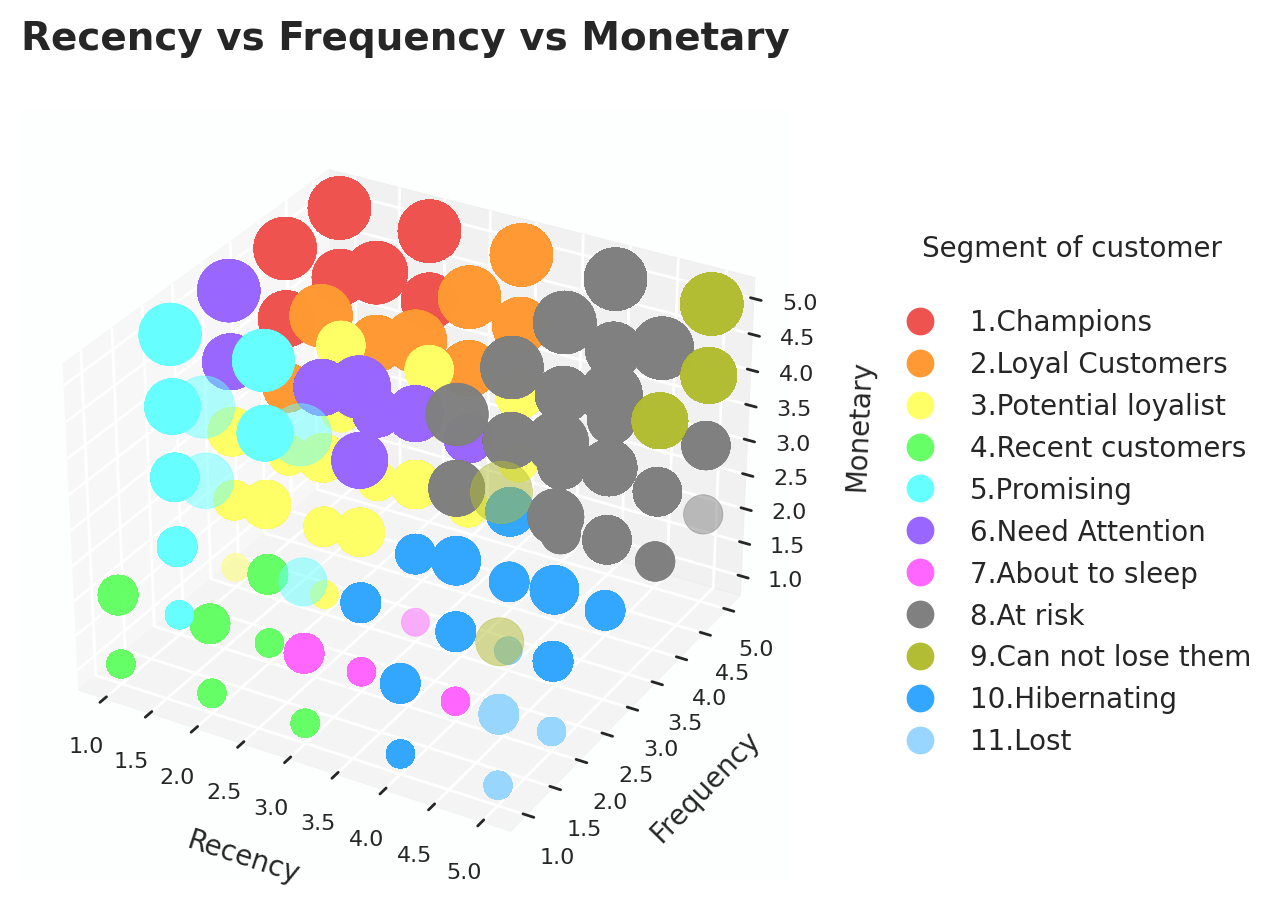

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import re

# Sample data
recency = pd.to_numeric(result['rank_R'])
frequency = pd.to_numeric(result['rank_F'])
monetary = pd.to_numeric(result['rank_M'])
segment = result['Group Segment']

# Sort the segment descriptions
segment_sorted = segment.unique()
segment_sorted.sort()

# Create a 3D plot
fig = plt.figure(figsize=(10,5),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('#FDFEFE')

# Define bubble sizes (adjust the scaling factor as needed)
bubble_sizes = monetary * 100

# Define custom colors for each segment
segment_colors = ['#EF5350', '#FF9933', '#FFFF66', '#66FF66', '#66FFFF', '#9966FF', '#FF66FF', '#808080', '#B2BD33', '#33A6FF', '#99D6FF']


# Extract numerical prefixes from segment names
segment_prefixes = [re.findall(r'^\d+', seg)[0] if re.match(r'^\d+', seg) else '' for seg in segment_sorted]
sorted_indices = sorted(range(len(segment_prefixes)), key=lambda x: int(segment_prefixes[x]) if segment_prefixes[x].isdigit() else float('inf'))

# Sort the segment descriptions based on the numerical prefixes
segment_sorted = [segment_sorted[i] for i in sorted_indices]

# Iterate over segments and plot each segment separately
for i, seg in enumerate(segment_sorted):
    seg_recency = recency[segment == seg]
    seg_frequency = frequency[segment == seg]
    seg_monetary = monetary[segment == seg]
    seg_bubble_sizes = bubble_sizes[segment == seg]
    seg_color = segment_colors[i % len(segment_colors)]

    # Plot Recency vs Frequency vs Monetary as a bubble plot
    ax.scatter(seg_recency, seg_frequency, seg_monetary,
               c=seg_color, s=seg_bubble_sizes, alpha=0.5, label=seg)

# Customizing the plot
ax.set_xlabel('Recency', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.set_zlabel('Monetary', fontsize=10)

ax.tick_params(axis='x', which='major', labelsize=8,pad=2)
ax.tick_params(axis='y', which='major', labelsize=8,pad=2)
ax.tick_params(axis='z', which='major', labelsize=8,pad=2)

# Add legend on the right-hand side
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=seg, markerfacecolor=color, markersize=10)
                   for seg, color in zip(segment_sorted, segment_colors)]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.1, 0.5), title='Segment of customer\n', title_fontsize=10)

# Set the title with bold font and larger size
ax.set_title('Recency vs Frequency vs Monetary\n', fontweight='bold', fontsize=14)

plt.show()


In [55]:
#Heatmap

# Create a pivot table with 'rank_R' as index, 'rank_F' as columns, and 'Total_Trans_Amt' as values
heatmap_data = result.pivot_table(index='rank_R', columns='rank_F', values='Total_Trans_Amt', aggfunc='mean')

fig, ax = plt.subplots(figsize=(5, 4), dpi=200)
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5, annot=True, fmt=".0f", cbar=True, ax=ax, annot_kws={"size": 8})

# Set labels and title
ax.set_xlabel('Mean of Transaction',fontsize=8)
ax.set_ylabel('')
ax.set_title('Heatmap of M (Mean)', fontweight='bold', fontsize=8)
ax.tick_params(axis= 'x', which='major', labelsize=8,pad=2)
ax.tick_params(axis= 'y', which='major', labelsize=8,pad=2)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# Adjust spacing
plt.tight_layout()

plt.show()



**Focused Segment**


---


พิจารณา Customer Segment โดยใช้ผลจาก RFM Model ร่วมกับข้อมูล Demographic เพื่อทำให้เข้าใจพฤติกรรมของลูกค้าได้ดียิ่งขึ้น โดยเฉพาะกลุ่ม “At risk”, “Can’t lose them” และ “Hibernating” ที่มีแนวโน้มจะเลิกใช้บริการ

In [56]:
#Consider 8, 9, 10 for Customer Churning

# Define the conditions for updating the 'Group_visualized' column
condition = result['Group Segment'].isin(['8.At risk', '9.Can not lose them', '10.Hibernating'])

# Update the 'Group_visualized' column using numpy.where()
result['Group_visualized'] = np.where(condition, 'Group 8,9,10', 'others')

# Print the updated DataFrame
result.head(5)


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  785387883  Existing Customer            47      F                3   
2  780466533  Existing Customer            54      M                3   
3  799224108  Existing Customer            46      F                4   
4  709122483  Existing Customer            56      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1     High School         Single     $40K - $60K          Blue   
2       Doctorate        Married         $120K +          Blue   
3        Graduate         Single  Less than $40K          Blue   
4        Graduate        Married     $60K - $80K          Blue   

   Months_on_book  ...  rank_F  percentile_M  rank_M  type  Attrition_Encoded  \
0              39  ...       2      0.027698       1   421                  0   
1              41  ...       2      0.124173       1   421                  0   
2              41  ...       2      0.189790       1   421                  0   
3              40  ...       2      0.150834       1   421                  0   
4              37  ...       2      0.198479       1   421                  0   

   RFM         Segment  No     Group Segment  Group_visualized  
0  421  About to sleep   7  7.About to sleep            others  
1  421  About to sleep   7  7.About to sleep            others  
2  421  About to sleep   7  7.About to sleep            others  
3  421  About to sleep   7  7.About to sleep            others  
4  421  About to sleep   7  7.About to sleep            others  

[5 rows x 34 columns]

In [57]:
#Focus on Existing Customer who in Group Segment 8, 9, 10

# Filter the DataFrame based on the condition
filtered_result = result[result['Attrition_Flag'] == 'Existing Customer']

# Define the conditions for updating the 'Group_visualized' column
condition = filtered_result['Group Segment'].isin(['8.At risk', '9.Can not lose them', '10.Hibernating'])

# Update the 'Group_visualized' column using numpy.where()
filtered_result['Group_visualized'] = np.where(condition, 'Group 8,9,10', 'others')

filtered_result.count()


<ipython-input-57-1226203d7bdc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_result['Group_visualized'] = np.where(condition, 'Group 8,9,10', 'others')


CLIENTNUM                   8500
Attrition_Flag              8500
Customer_Age                8500
Gender                      8500
Dependent_count             8500
Education_Level             8500
Marital_Status              8500
Income_Category             8500
Card_Category               8500
Months_on_book              8500
Total_Relationship_Count    8500
Months_Inactive_12_mon      8500
Contacts_Count_12_mon       8500
Credit_Limit                8500
Total_Revolving_Bal         8500
Avg_Open_To_Buy             8500
Total_Amt_Chng_Q4_Q1        8500
Total_Trans_Amt             8500
Total_Trans_Ct              8500
Total_Ct_Chng_Q4_Q1         8500
Avg_Utilization_Ratio       8500
percentile_R                8500
rank_R                      8500
percentile_F                8500
rank_F                      8500
percentile_M                8500
rank_M                      8500
type                        8500
Attrition_Encoded           8500
RFM                         8500
Segment   

Text(0, 0.5, 'Total Trans Amt (Million)')

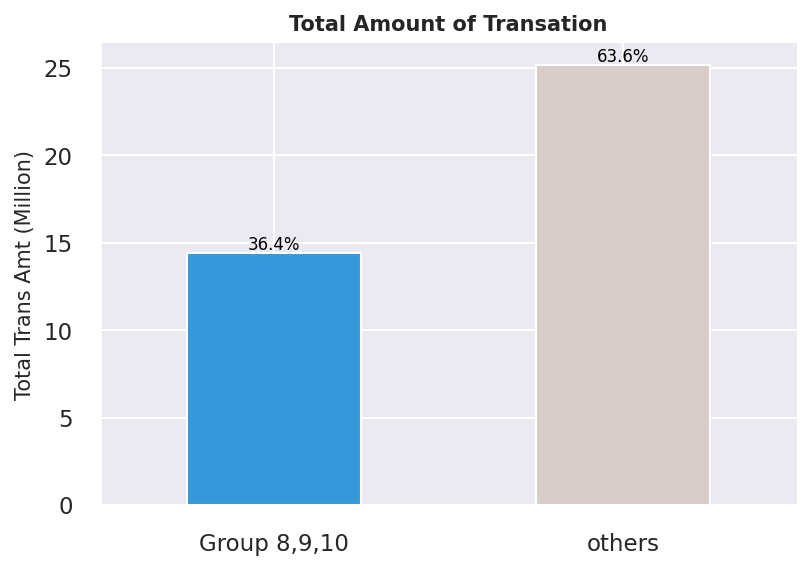

In [73]:
# Calculate the total sum of 'Total_Trans_Amt'
total_sum = filtered_result['Total_Trans_Amt'].sum() / 1e6

colors = ['#3498DB', '#D7CCC8']
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

bar_plot = (filtered_result.groupby('Group_visualized')['Total_Trans_Amt'].sum() / 1e6).plot(kind='bar', color=colors, ax=ax)
plt.title('Total Amount of Transation', fontweight='bold', fontsize=10)
plt.xlabel('')

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)

# Adding data labels to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_sum) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the y-axis label to display the scale in millions
ax.set_ylabel('Total Trans Amt (Million)', fontsize=10)

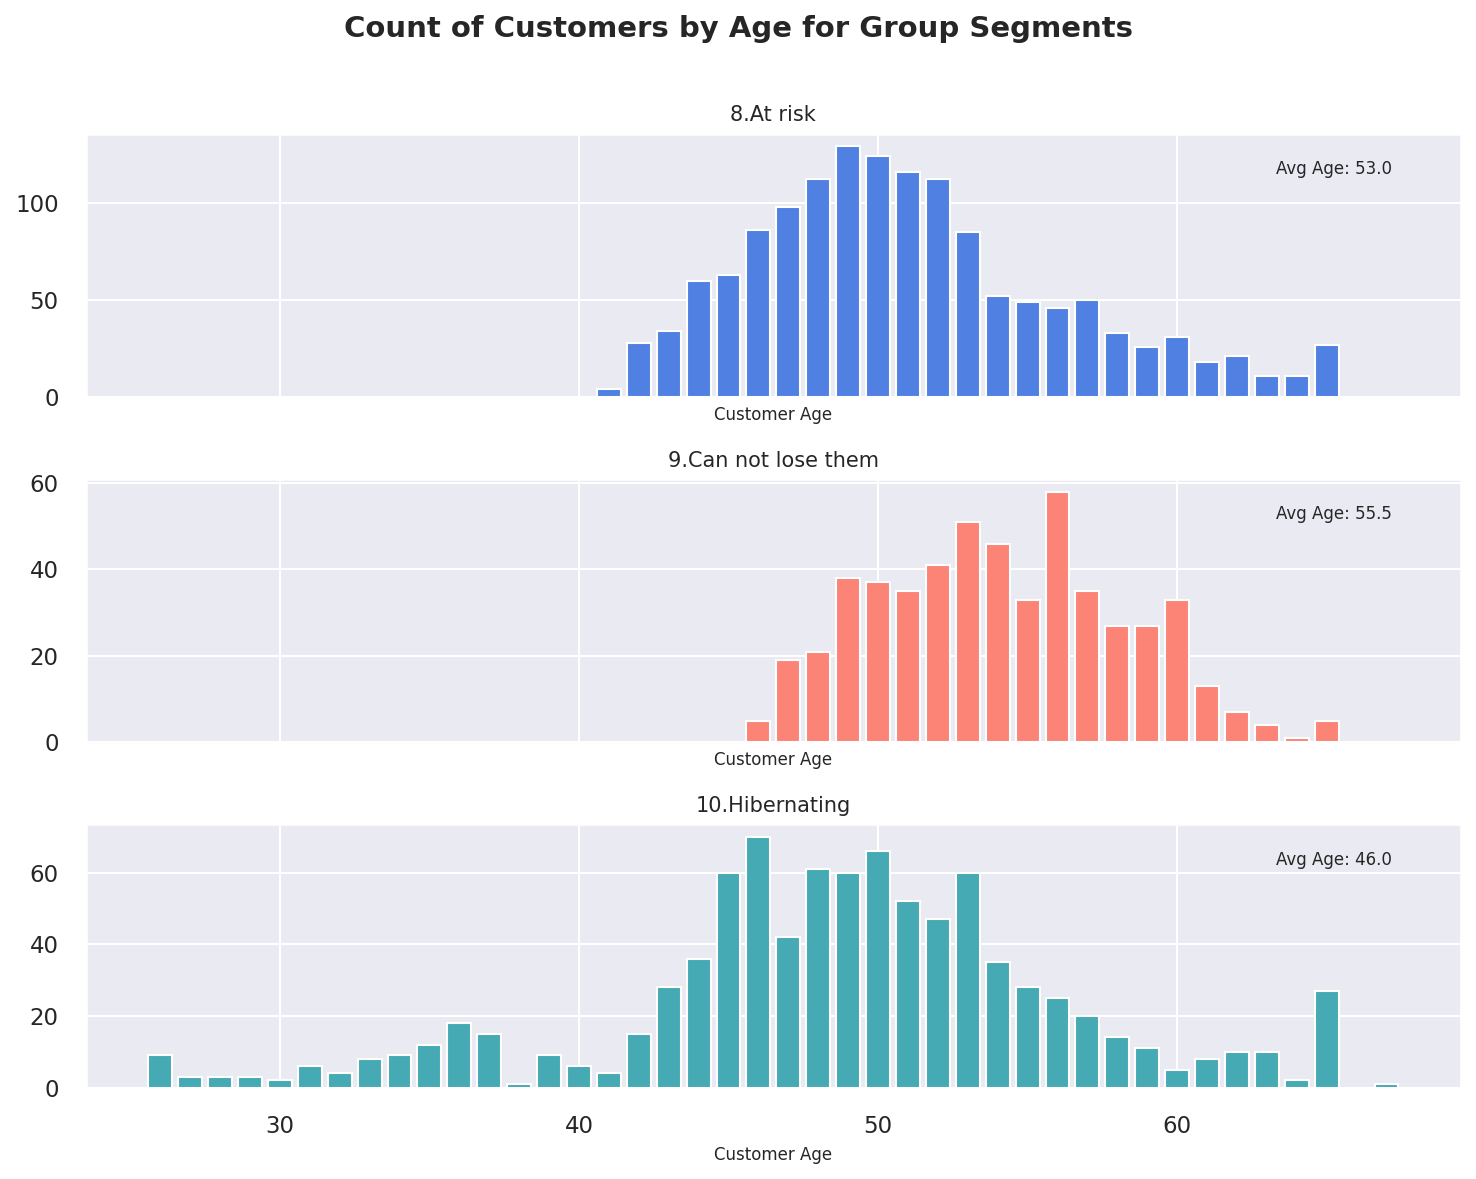

In [74]:
#Consider Customer's Age for Gr.8,9,10

group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']
colors = ['#4F80E2', '#FC8476', '#45AAB4']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(group_segments), ncols=1, figsize=(10,8), dpi=150,alpha=0.6 ,sharex=True)

# Iterate over each group segment and create separate bar plots
for i, segment in enumerate(group_segments):
    segment_data = filtered_result[filtered_result['Group Segment'] == segment]
    segment_data = segment_data.groupby('Customer_Age').size().reset_index(name='Count')  # Group and count by 'Customer_Age'
    segment_data = segment_data.sort_values('Customer_Age')  # Sort by 'Customer_Age'
    axes[i].bar(segment_data['Customer_Age'], segment_data['Count'], color=colors[i])
    axes[i].set_xlabel('Customer Age',fontsize = 8)
    axes[i].set_ylabel('')
    axes[i].set_title(segment ,fontsize = 10)

    # Calculate the average age for the group segment
    average_age = segment_data['Customer_Age'].mean()

    # Add text annotation for the average age
    axes[i].text(0.95, 0.9, f'Avg Age: {average_age:.1f}', transform=axes[i].transAxes, ha='right', va='top', fontsize=8)

fig.suptitle('Count of Customers by Age for Group Segments\n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

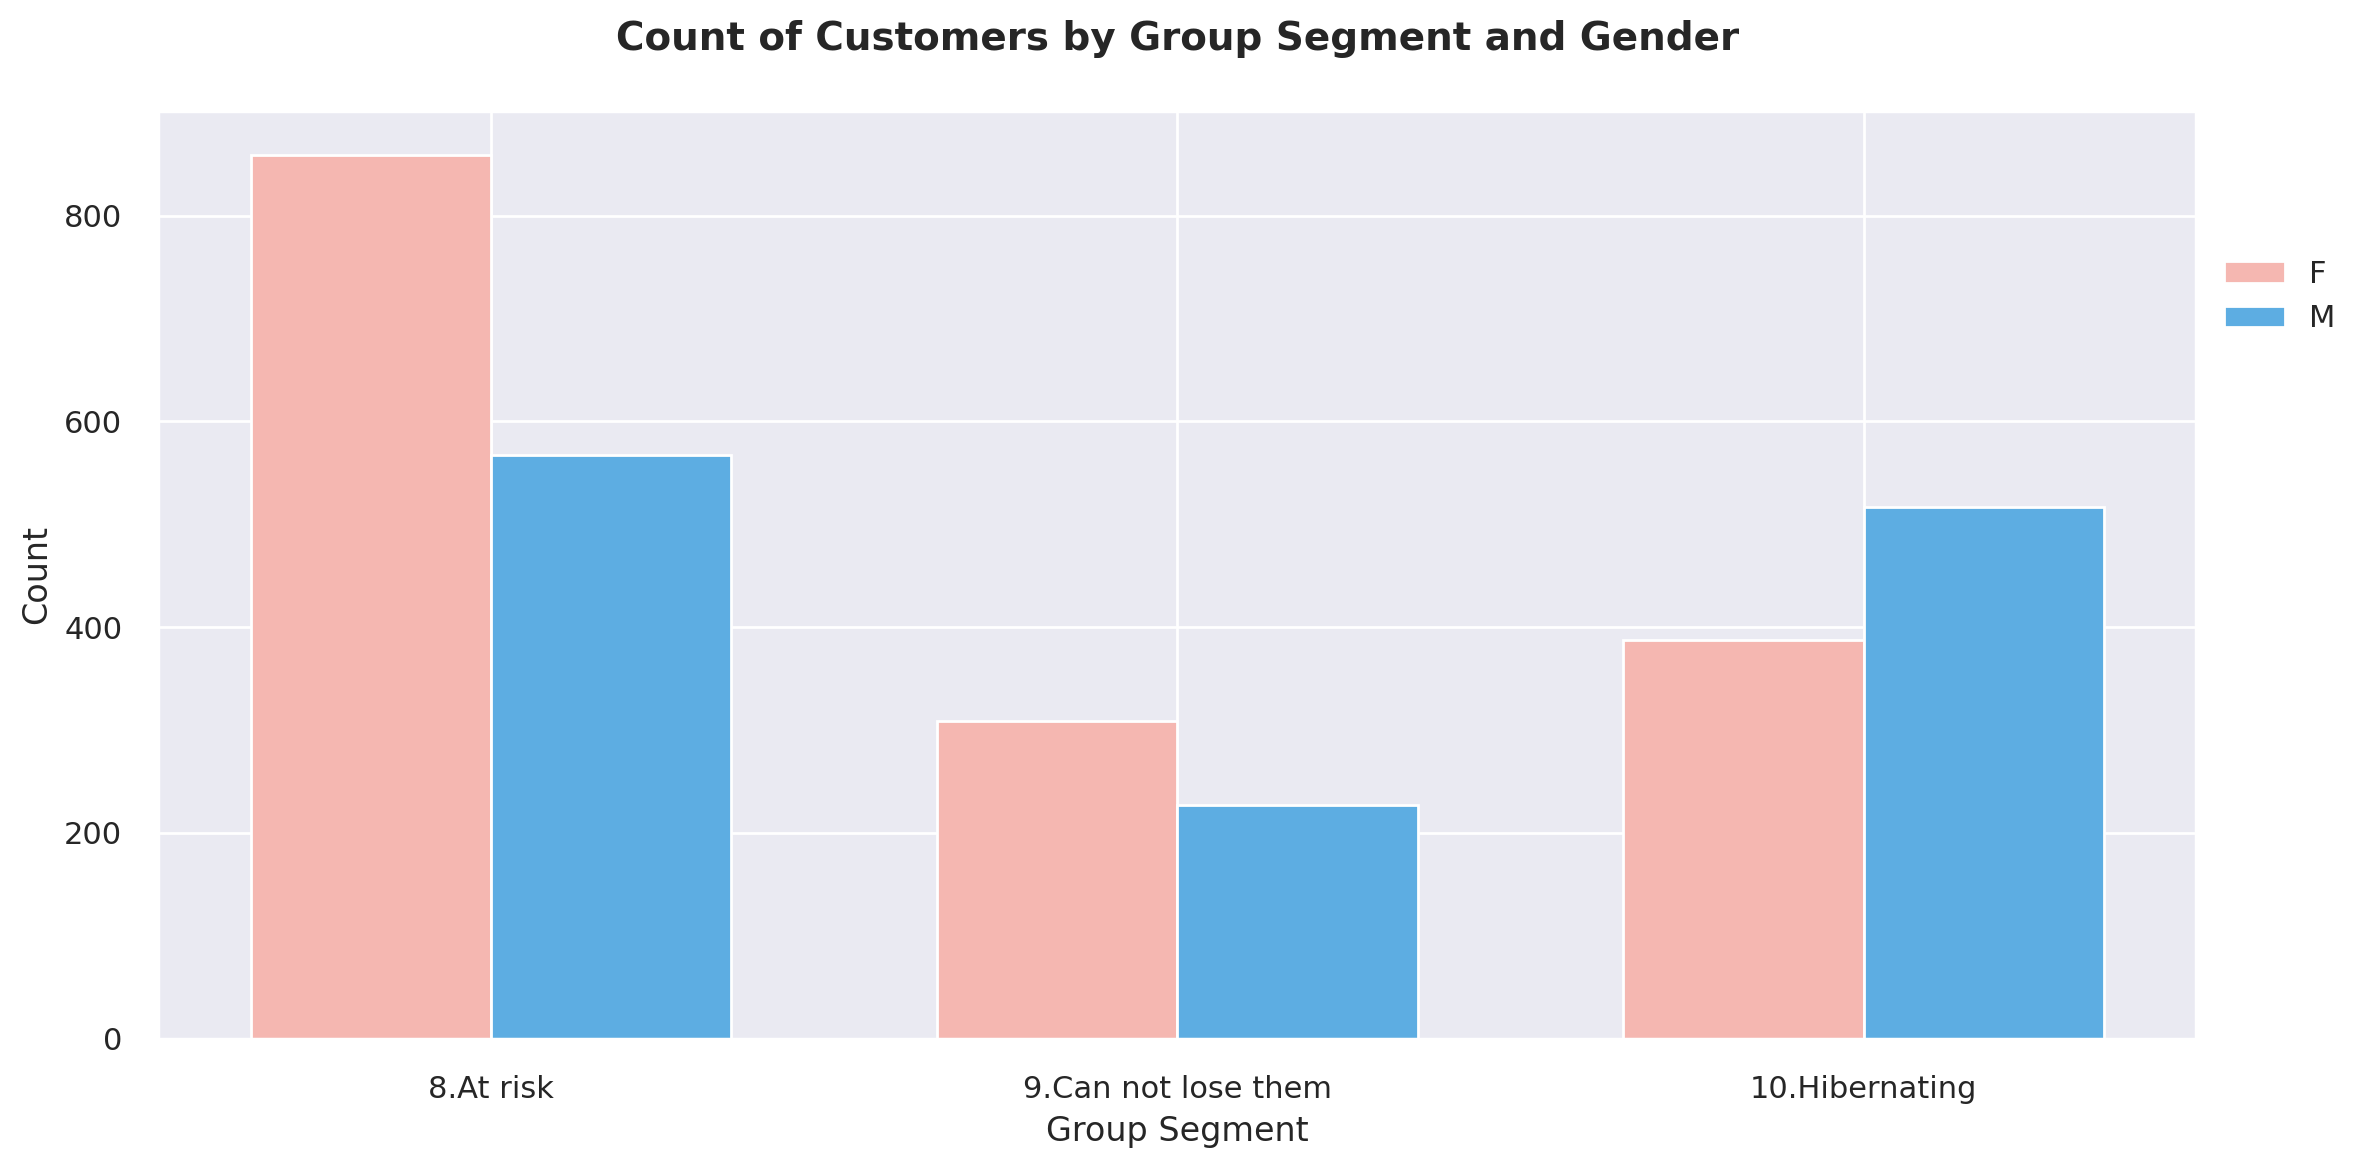

In [75]:
#Consider Customer's Gender for Gr.8,9,10
# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Set up the subplots
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Group and count the data by 'Gender' for each group segment
group_data = filtered_result[filtered_result['Group Segment'].isin(group_segments)]
group_data = group_data.groupby(['Group Segment', 'Gender']).size().unstack()
segment_counts = group_data.reindex(group_segments)

# Get the unique Gender values
Gender = segment_counts.columns

# Calculate the width of each bar
total_bars = len(group_segments)
total_groups = len(Gender)
bar_width = 0.7 / total_groups

x = np.arange(total_bars)

colors = ['#F5B7B1', '#5DADE2']  # Specify your desired colors here

# Create grouped bar chart
for i, gender in enumerate(Gender):
    offset = (i - (total_groups - 1) / 2) * bar_width
    ax.bar(x + offset, segment_counts[gender], width=bar_width, color=colors[i], label=gender)

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(segment_counts.index)
ax.set_xlabel('Group Segment')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Group Segment and Gender\n', fontsize=14, fontweight='bold')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()


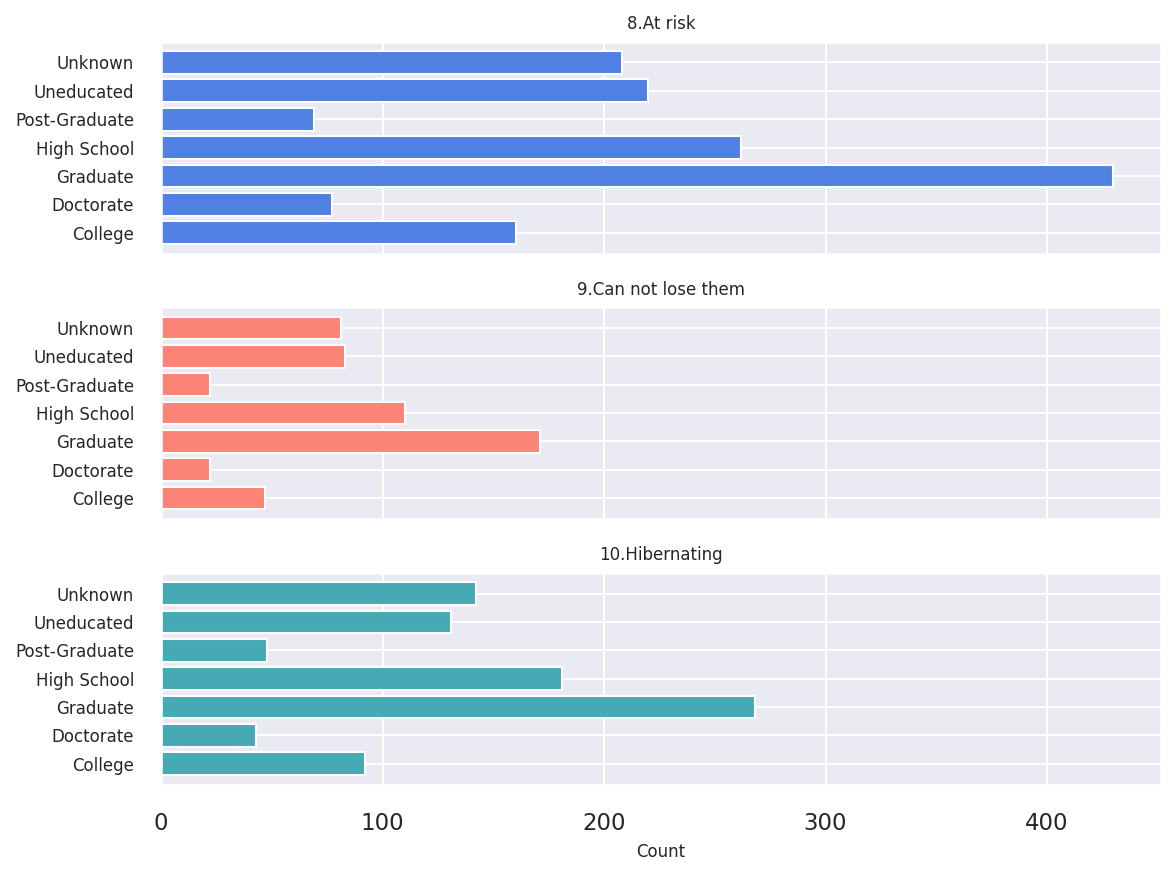

In [76]:
#Consider Customer's Education Level for Gr. 8, 9, 10

# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']
colors = ['#4F80E2', '#FC8476', '#45AAB4']

fig, axes = plt.subplots(nrows=len(group_segments), ncols=1, figsize=(8, 6), dpi=150, alpha=0.6,sharex=True)
,
# Iterate over each group segment and create separate horizontal bar plots
for i, segment in enumerate(group_segments):
    ax = axes[i]
    segment_data = filtered_result[filtered_result['Group Segment'] == segment]
    segment_data = segment_data.groupby('Education_Level').size().reset_index(name='Count')  # Group and count by 'Education_Level'
    segment_data = segment_data.sort_values('Education_Level')  # Sort by 'Education_Level'
    ax.barh(segment_data['Education_Level'], segment_data['Count'], color=colors[i])  # Use barh for horizontal bar plot
    ax.set_title(segment, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.xlabel('Count', fontsize=8)

plt.tight_layout()
plt.show()


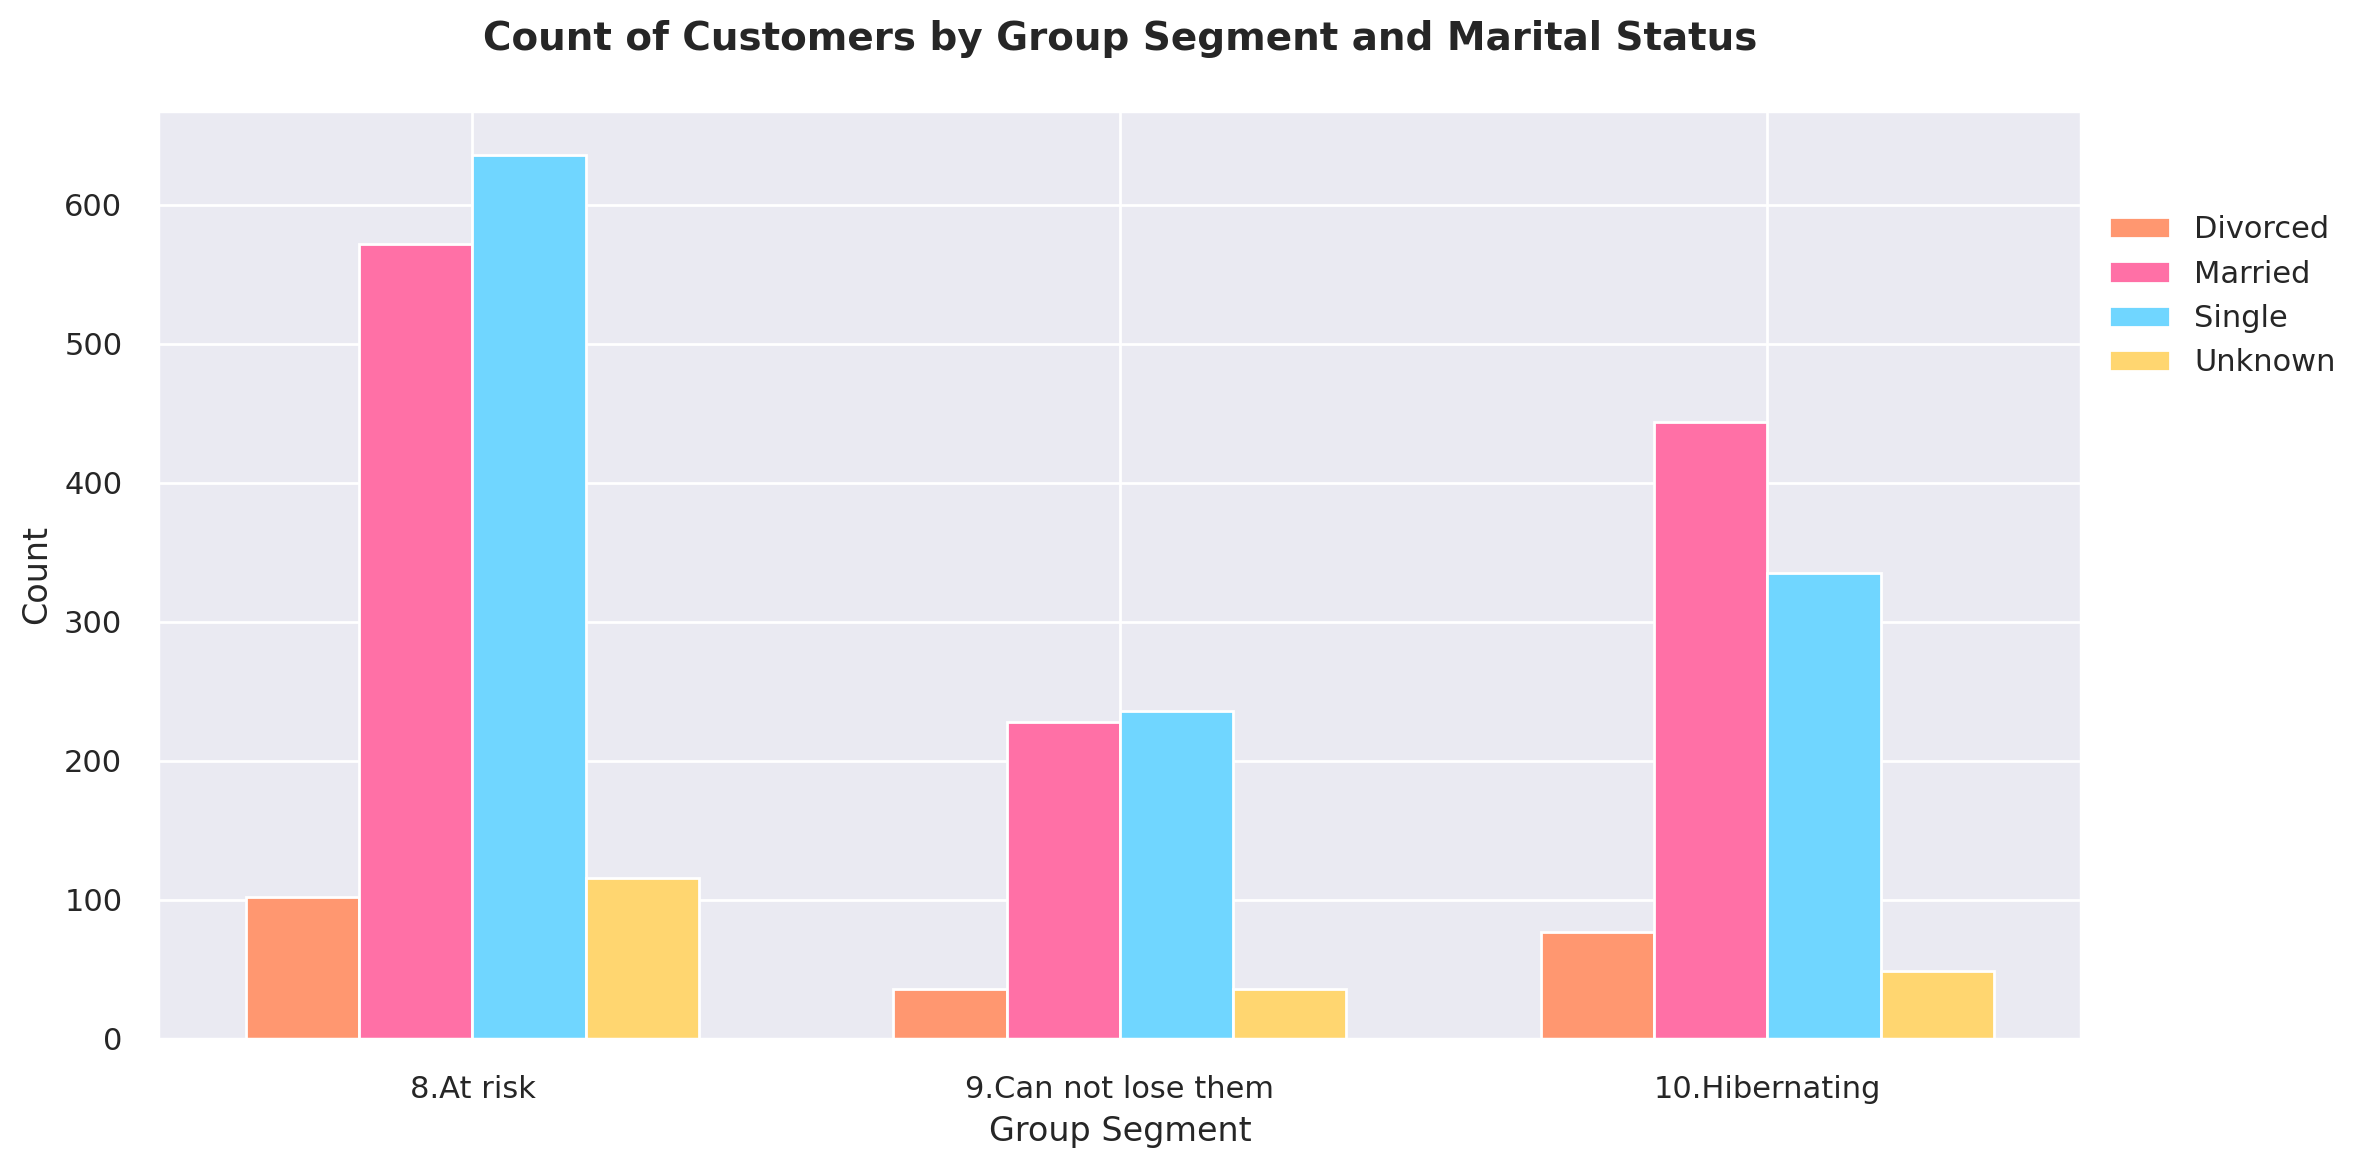

In [77]:
#Consider Customer's Marital_Status for 8, 9, 10

# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Set up the subplots
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Group and count the data by 'Marital_Status' for each group segment
group_data = filtered_result[filtered_result['Group Segment'].isin(group_segments)]
group_data = group_data.groupby(['Group Segment', 'Marital_Status']).size().unstack()
segment_counts = group_data.reindex(group_segments)


# Get the unique marital status values
marital_statuses = segment_counts.columns

# Calculate the width of each bar
total_bars = len(group_segments)
total_groups = len(marital_statuses)
bar_width = 0.7 / total_groups

# Set the x positions for the bars
x = np.arange(total_bars)

colors = [ '#ff9770','#ff70a6','#70d6ff', '#ffd670']
# Create grouped bar chart
for i, marital_status in enumerate(marital_statuses):
    offset = (i - (total_groups - 1) / 2) * bar_width
    ax.bar(x + offset, segment_counts[marital_status], width=bar_width, color=colors[i], label=marital_status)

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels( segment_counts.index )

# Set labels and title
ax.set_xlabel('Group Segment')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Group Segment and Marital Status\n', fontsize=14, fontweight='bold')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


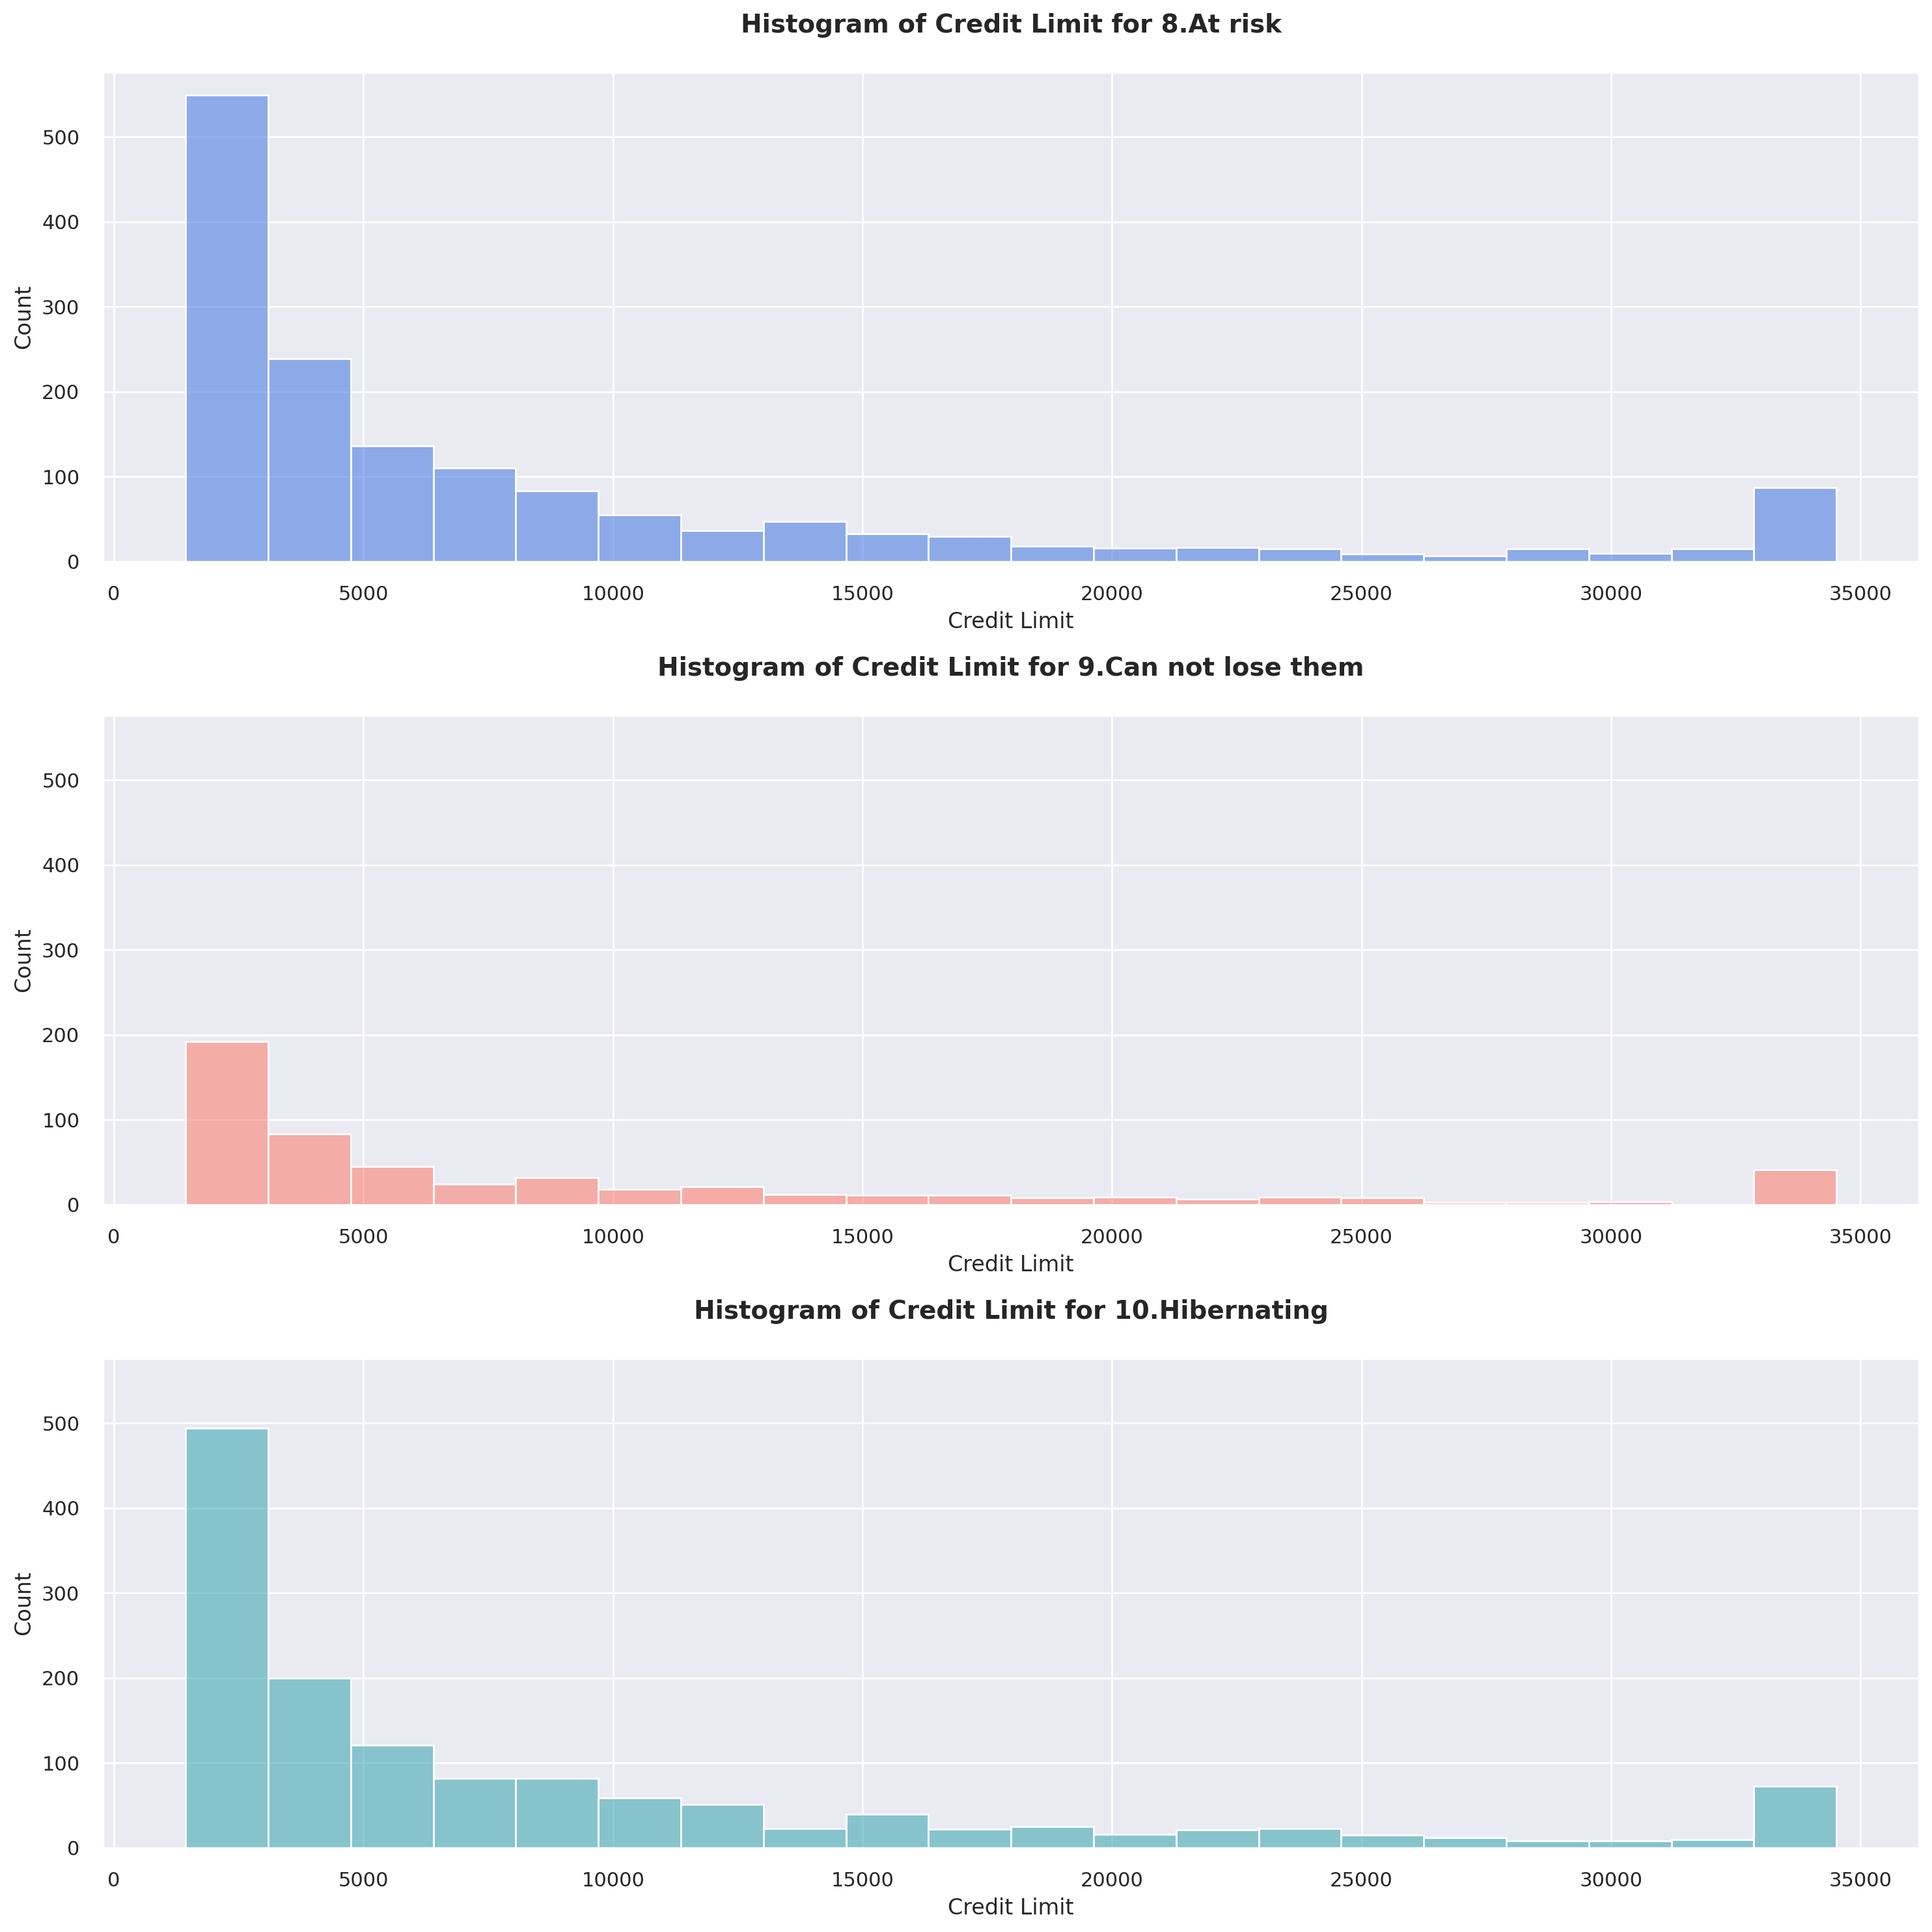

In [78]:
#Consider Customer's Credit Limit for Gr. 8, 9, 10
# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Define colors for each segment
colors = ['#4F80E2', '#FC8476', '#45AAB4']

# Set up the figure and subplots
sns.set(rc={'figure.dpi': 300})
fig, axes = plt.subplots(nrows=len(group_segments), figsize=(15, 5 * len(group_segments)), dpi=200, sharey=True)

# Plot histogram for each group segment
for i, segment in enumerate(group_segments):
    # Filter the data for the current group segment
    segment_data = result[result['Group Segment'] == segment]

    # Plot histogram with specified color
    ax = axes[i]
    sns.histplot(data=segment_data, x='Credit_Limit', bins=20, alpha=0.6, ax=ax, color=colors[i])

    # Set labels and title
    ax.set_xlabel('Credit Limit')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of Credit Limit for {segment}\n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

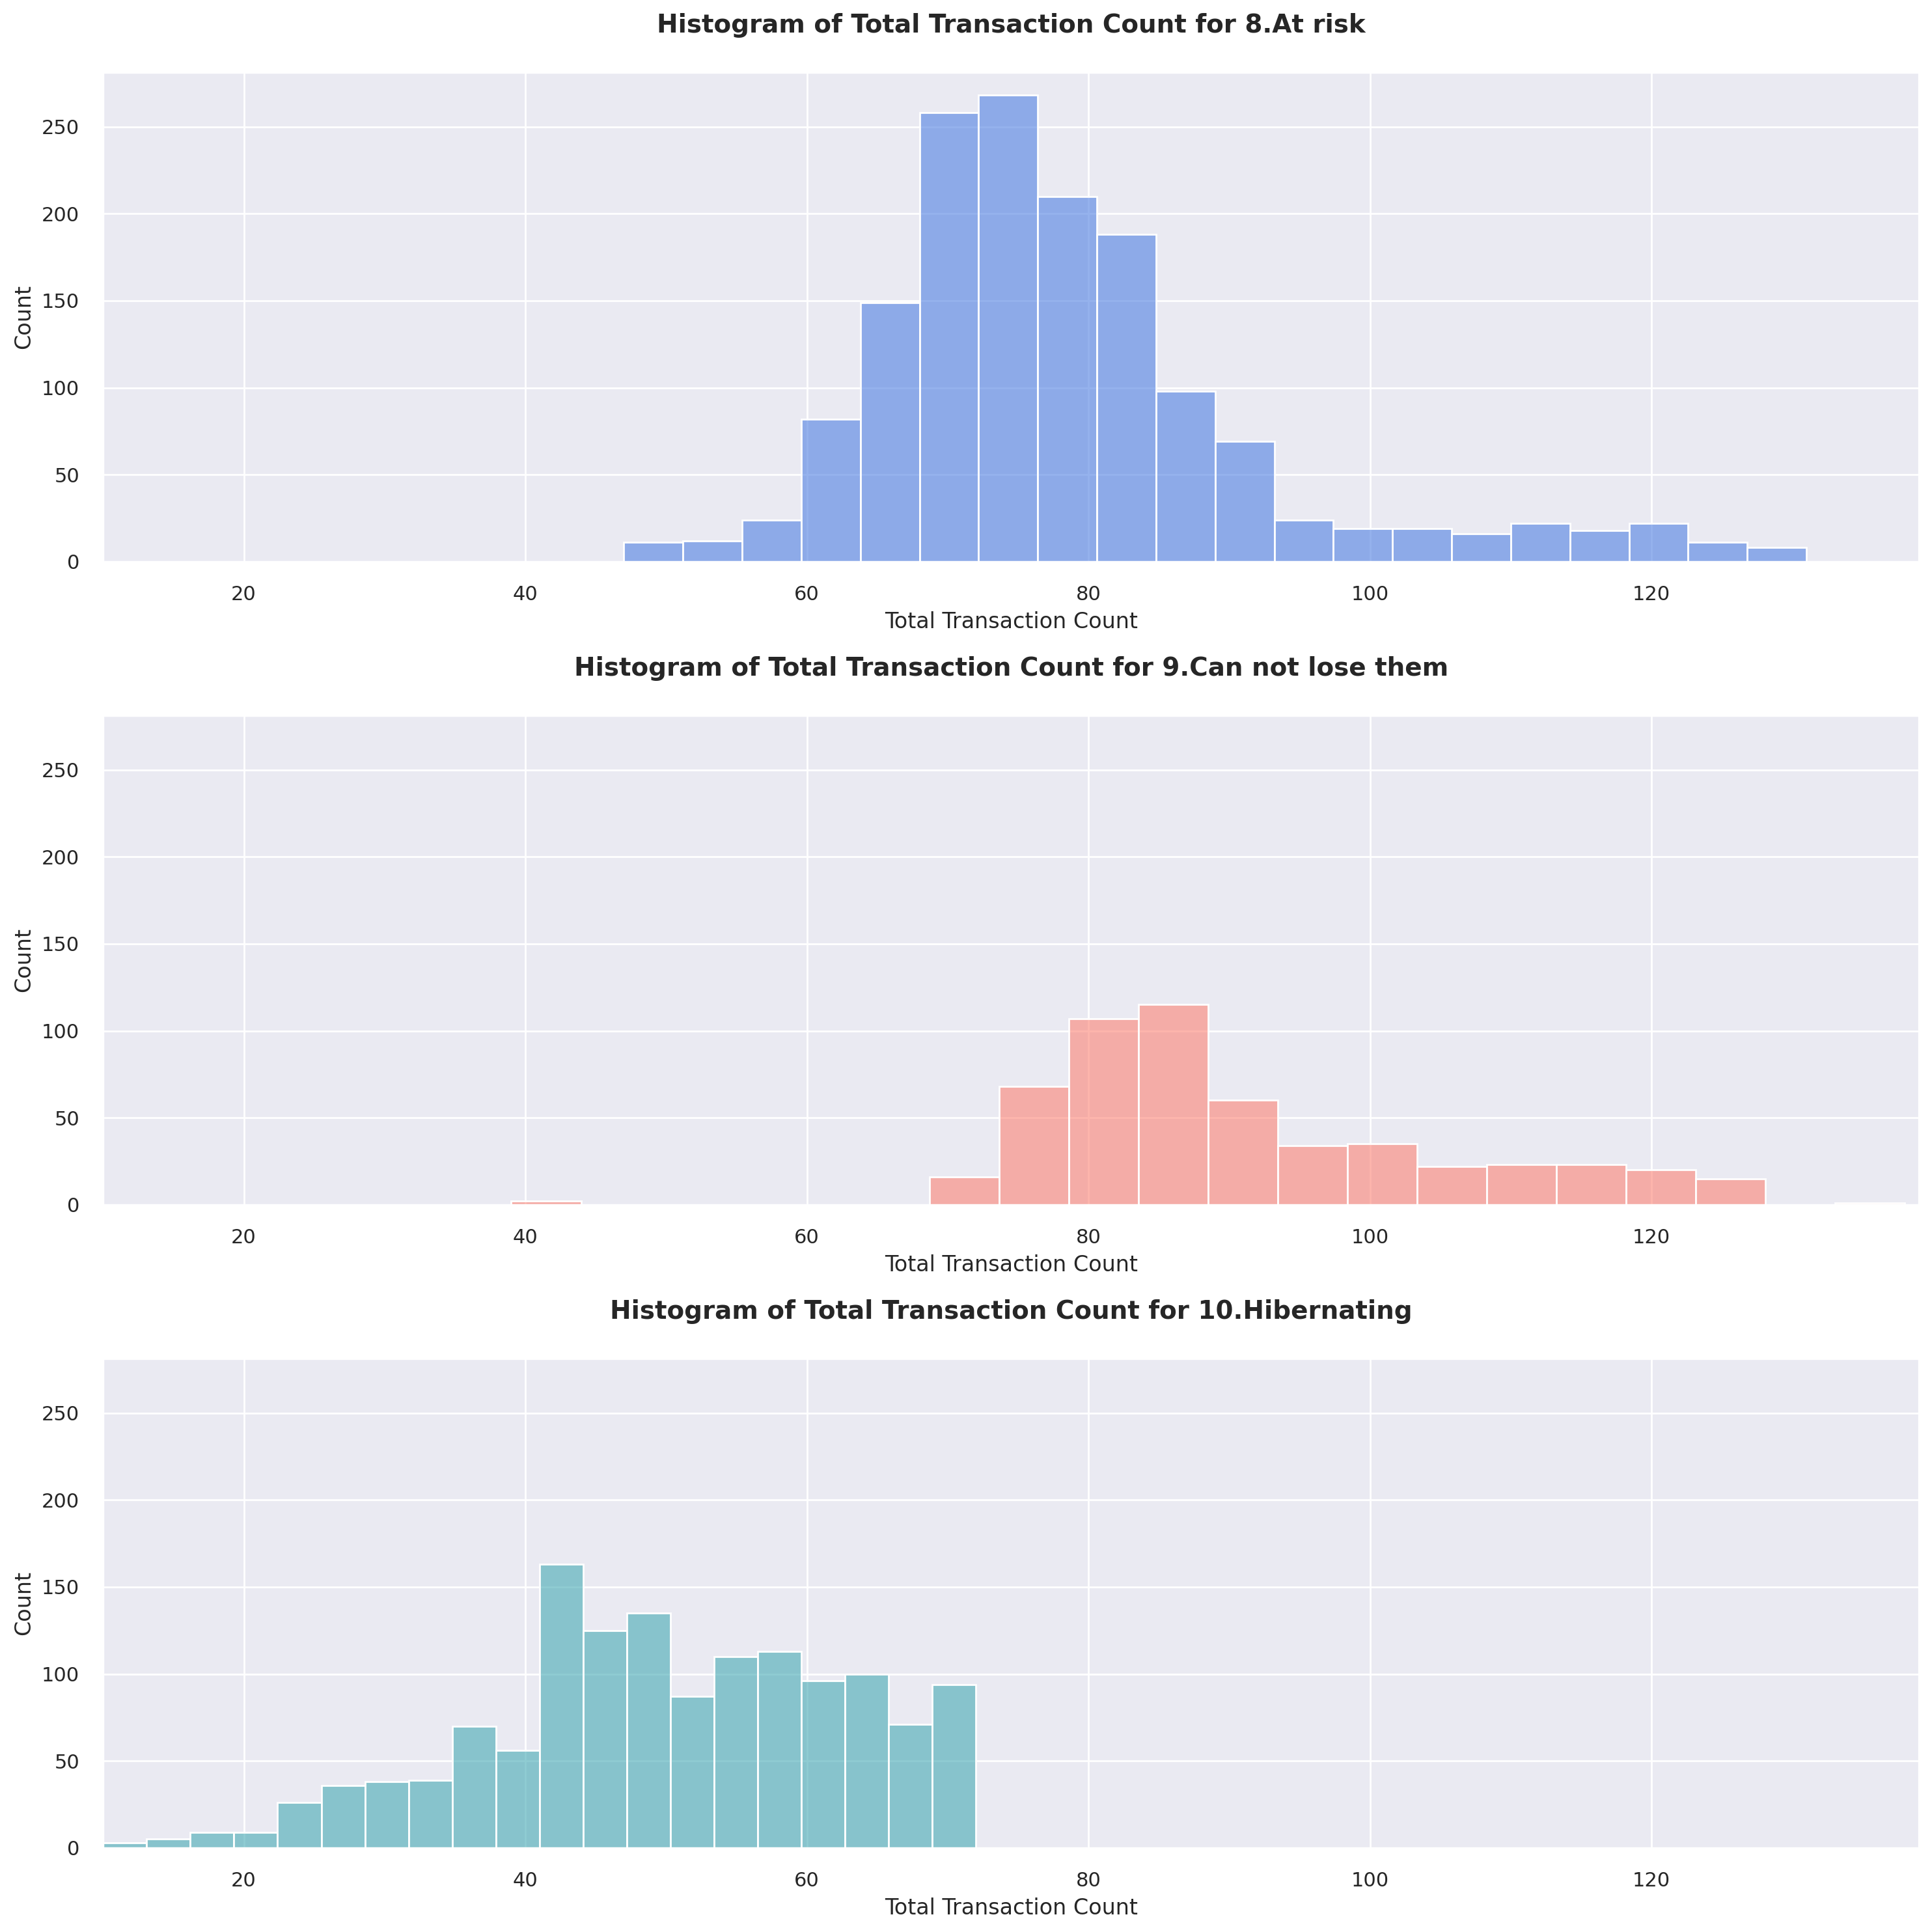

In [79]:
#Consider Customer's Total Transaction Count for Gr. 8, 9, 10
# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']
colors = ['#4F80E2', '#FC8476', '#45AAB4']

# Set up the figure and subplots
sns.set(rc={'figure.dpi': 300})
fig, axes = plt.subplots(nrows=len(group_segments), figsize=(15, 5 * len(group_segments)), dpi=200, sharey=True)

# Plot histogram for each group segment
for i, segment in enumerate(group_segments):
    # Filter the data for the current group segment
    segment_data = result[result['Group Segment'] == segment]

    # Plot histogram with specified color
    ax = axes[i]
    sns.histplot(data=segment_data, x='Total_Trans_Ct', bins=20, alpha=0.6, ax=ax, color=colors[i])

    # Set labels and title
    ax.set_xlabel('Total Transaction Count')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of Total Transaction Count for {segment}\n', fontsize=14, fontweight='bold')
    x_min = result['Total_Trans_Ct'].min()
    x_max = result['Total_Trans_Ct'].max()
    ax.set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

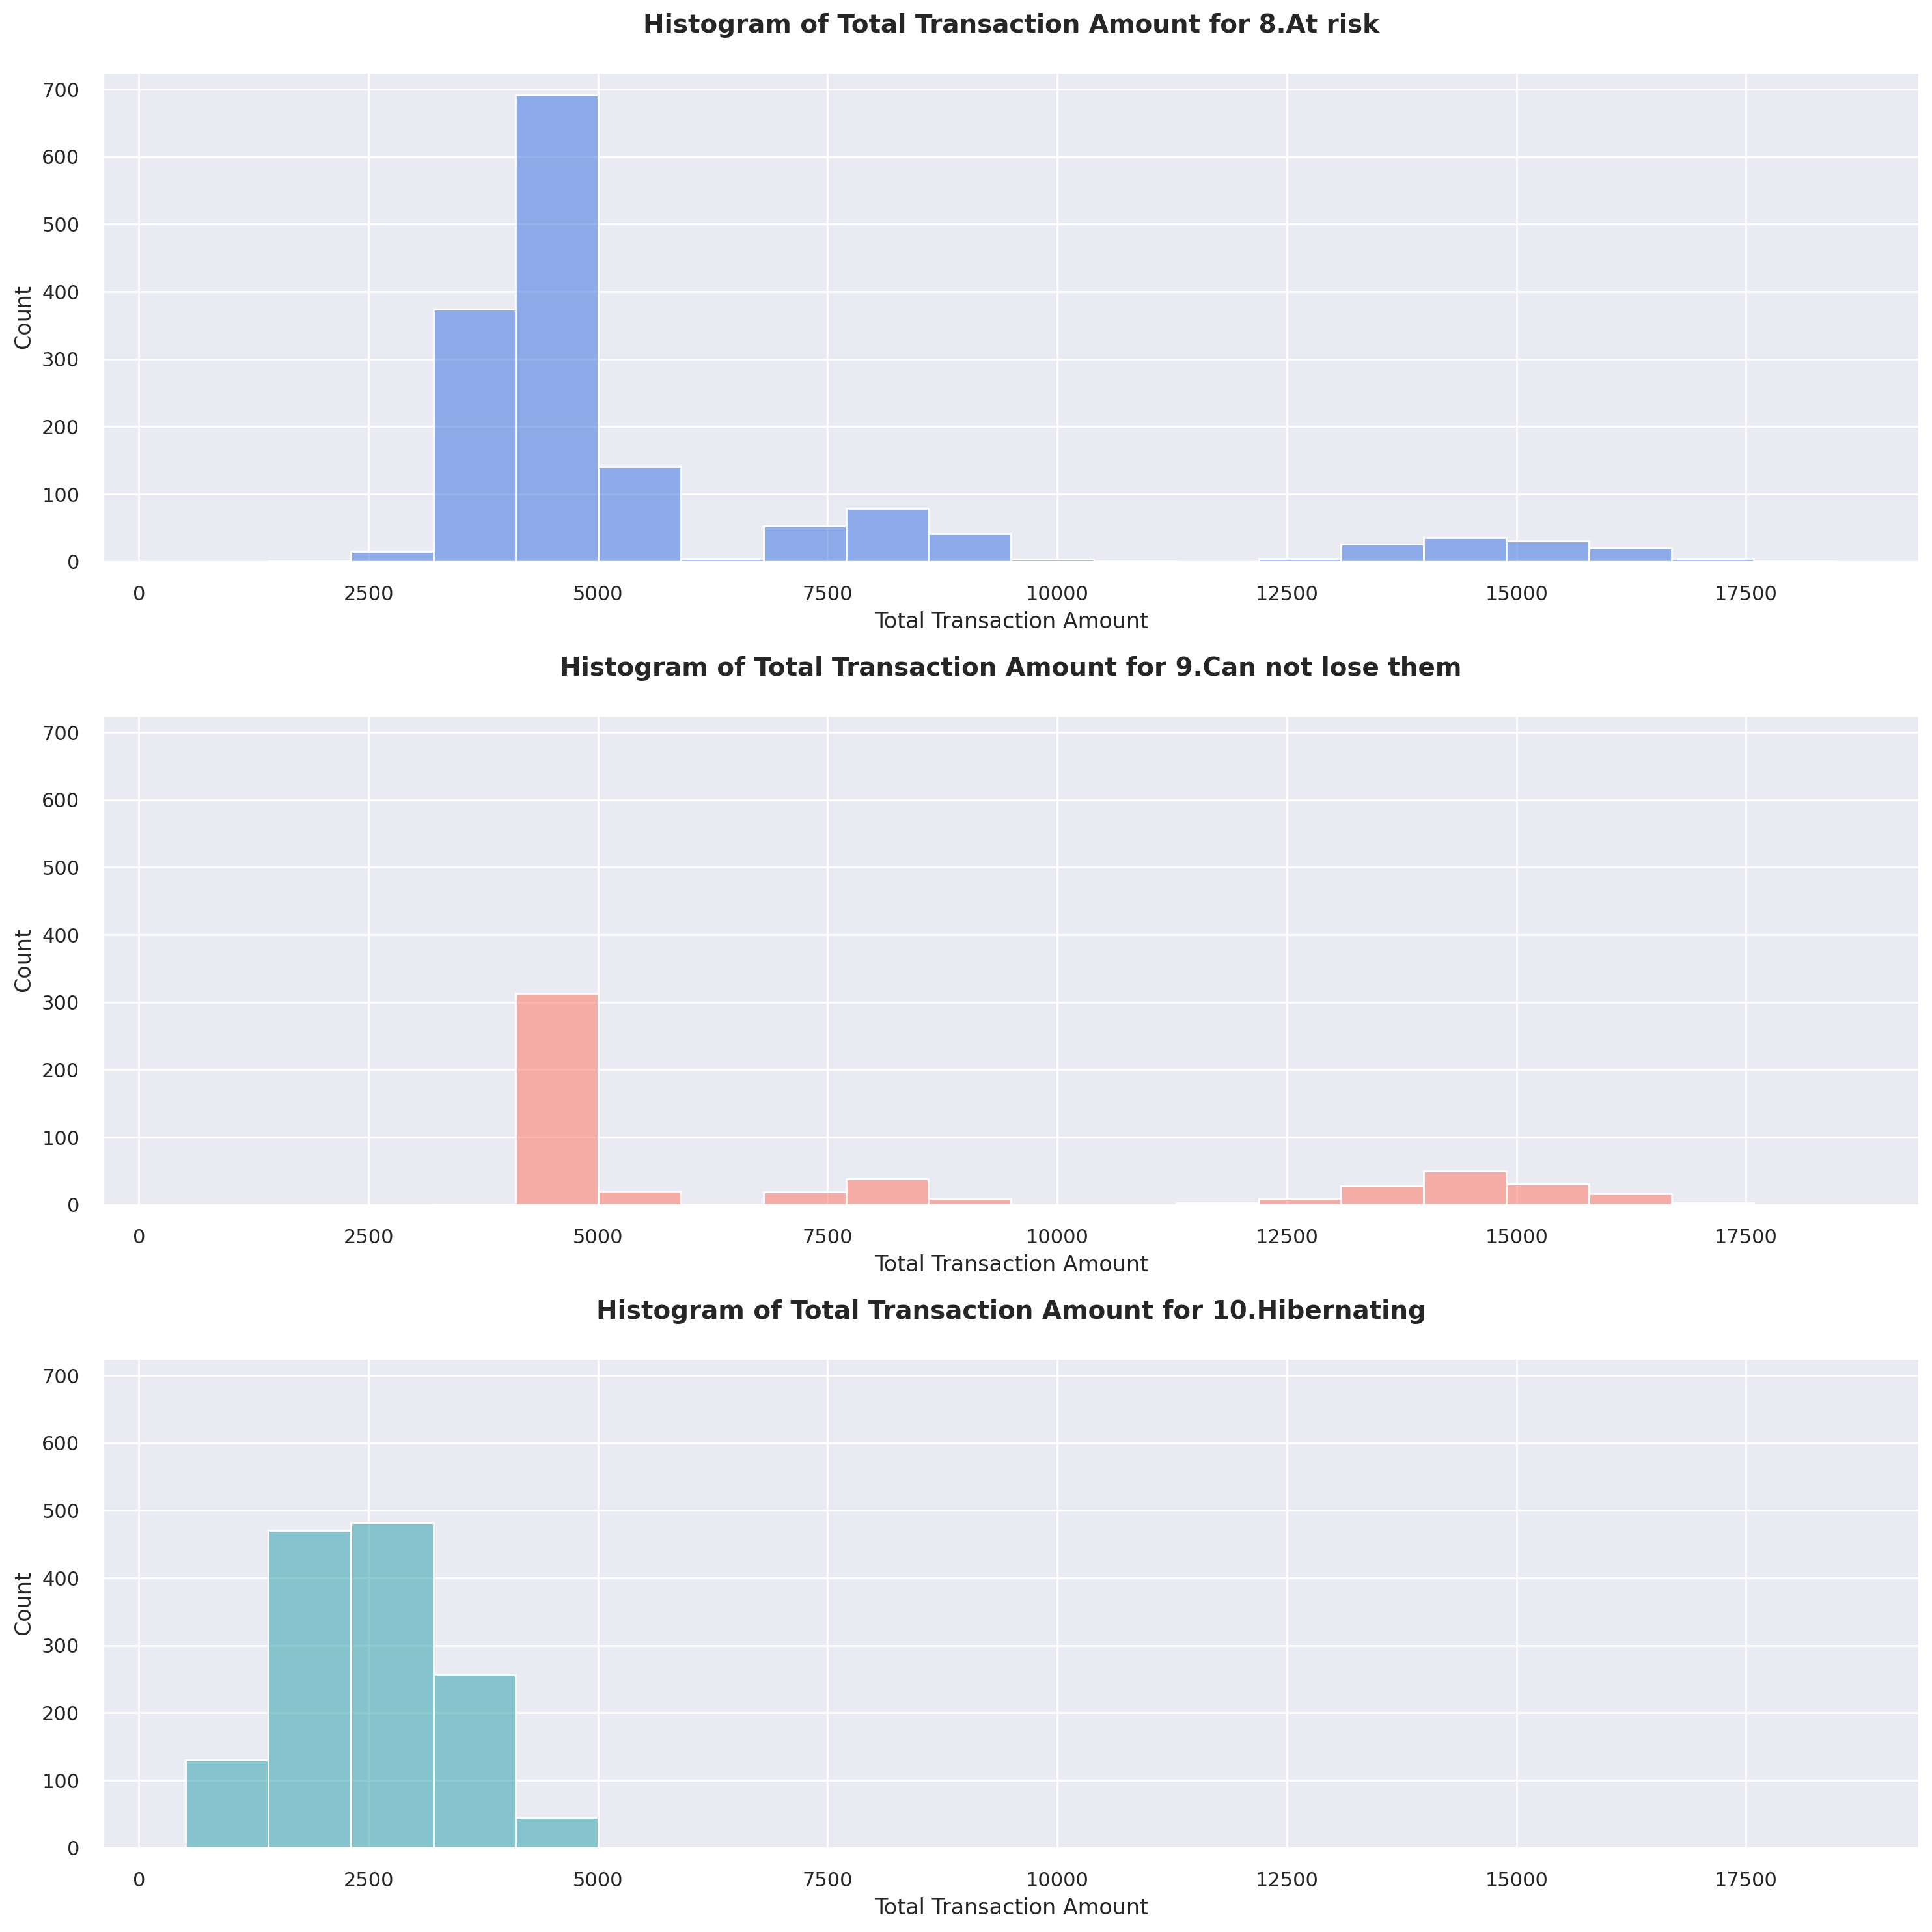

In [80]:
#Consider Customer's Total Transaction Amount for Gr. 8, 9, 10
# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

colors = ['#4F80E2', '#FC8476', '#45AAB4']
sns.set(rc={'figure.dpi': 300})
fig, axes = plt.subplots(nrows=len(group_segments), figsize=(15, 5 * len(group_segments)), dpi=200, sharey=True)

# Plot histogram
num_bins = 20  # Specify the number of bins
total_trans_amt_min = result['Total_Trans_Amt'].min()
total_trans_amt_max = result['Total_Trans_Amt'].max()
bin_range = (total_trans_amt_min, total_trans_amt_max)

for i, segment in enumerate(group_segments):
    # Filter the data for the current group segment
    segment_data = result[result['Group Segment'] == segment]

    # Plot histogram with specified color and bin range
    ax = axes[i]
    sns.histplot(data=segment_data, x='Total_Trans_Amt', bins=num_bins, alpha=0.6, ax=ax, color=colors[i], binrange=bin_range)

    # Set labels and title
    ax.set_xlabel('Total Transaction Amount')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of Total Transaction Amount for {segment}\n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Descriptive Statistics:** สมมติฐานข้อมูล Demographic ได้แก่ อายุ จำนวนผลิตภัณฑ์ที่ลูกค้าถือครอง เพศ ระดับการศึกษา สถานภาพสมรส ช่วงรายได้ ของลูกค้า จะมีความสัมพันธ์ที่มีผลต่อการปิดบัญชีของลูกค้า

---




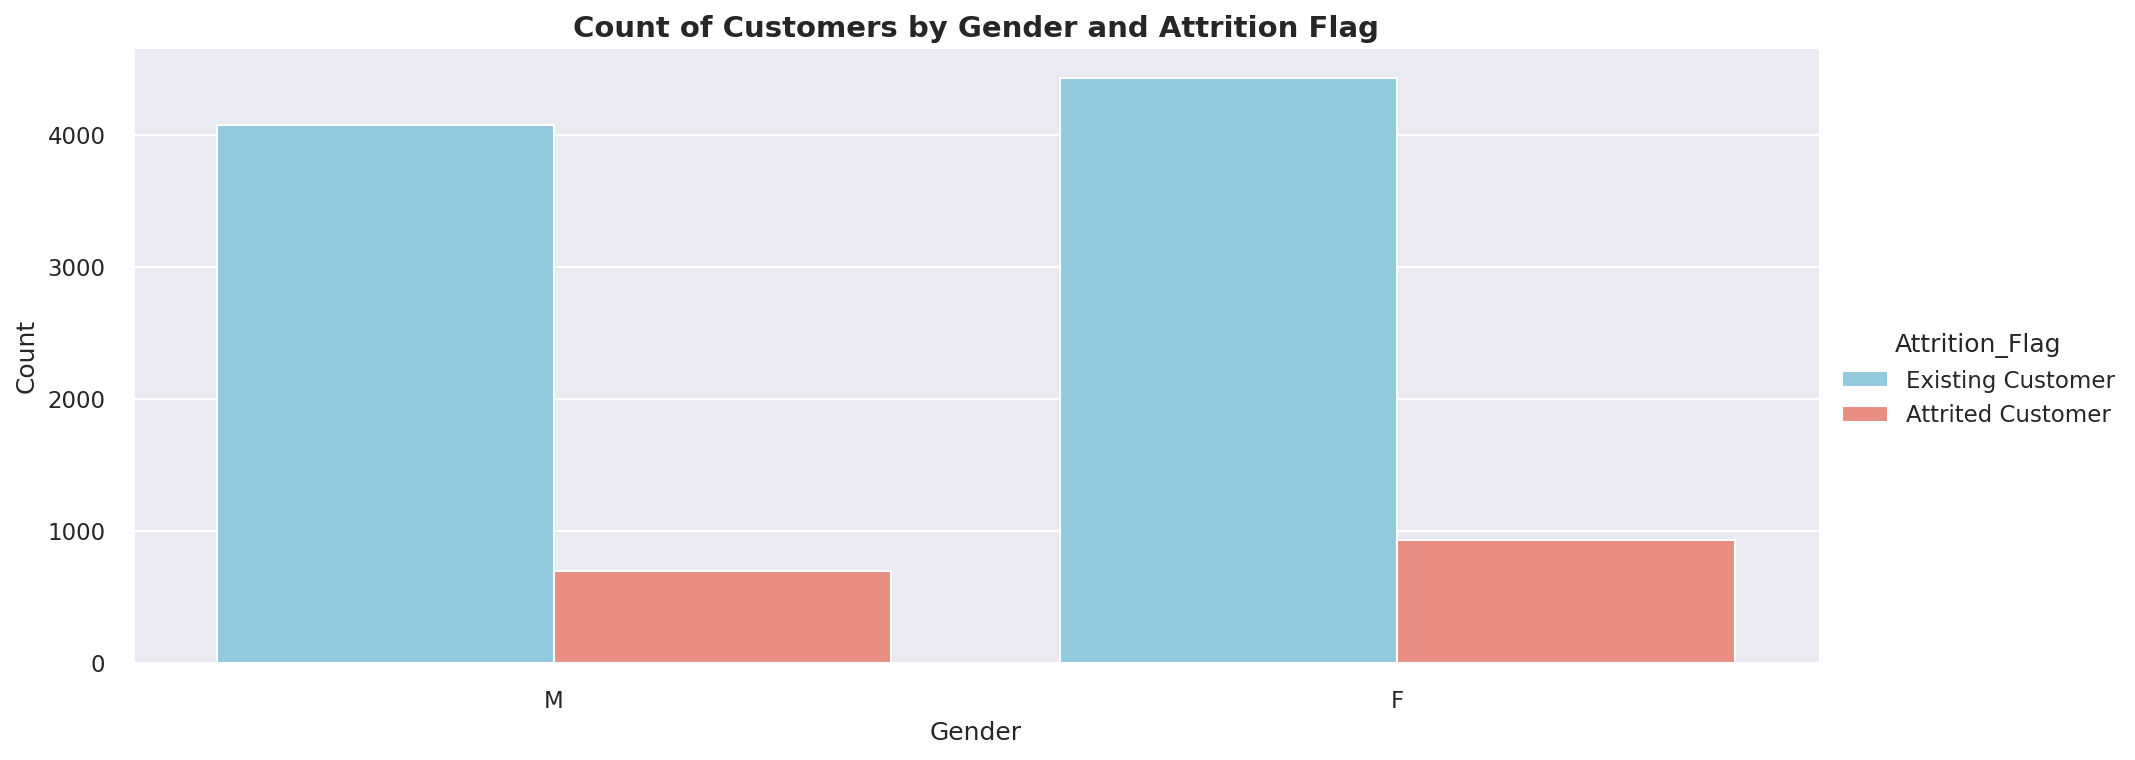

In [103]:
#Count of Customers by Gender and Attrition Flag
# Plot with a figure-level function
custom_palette = ['skyblue', 'salmon']

# Create the count plot
sns.catplot(
    kind='count',
    data=result,
    x='Gender',
    hue='Attrition_Flag',
    palette=custom_palette,
    height=5,
    aspect=2.5
)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender and Attrition Flag',fontsize=14, fontweight='bold')
plt.show()

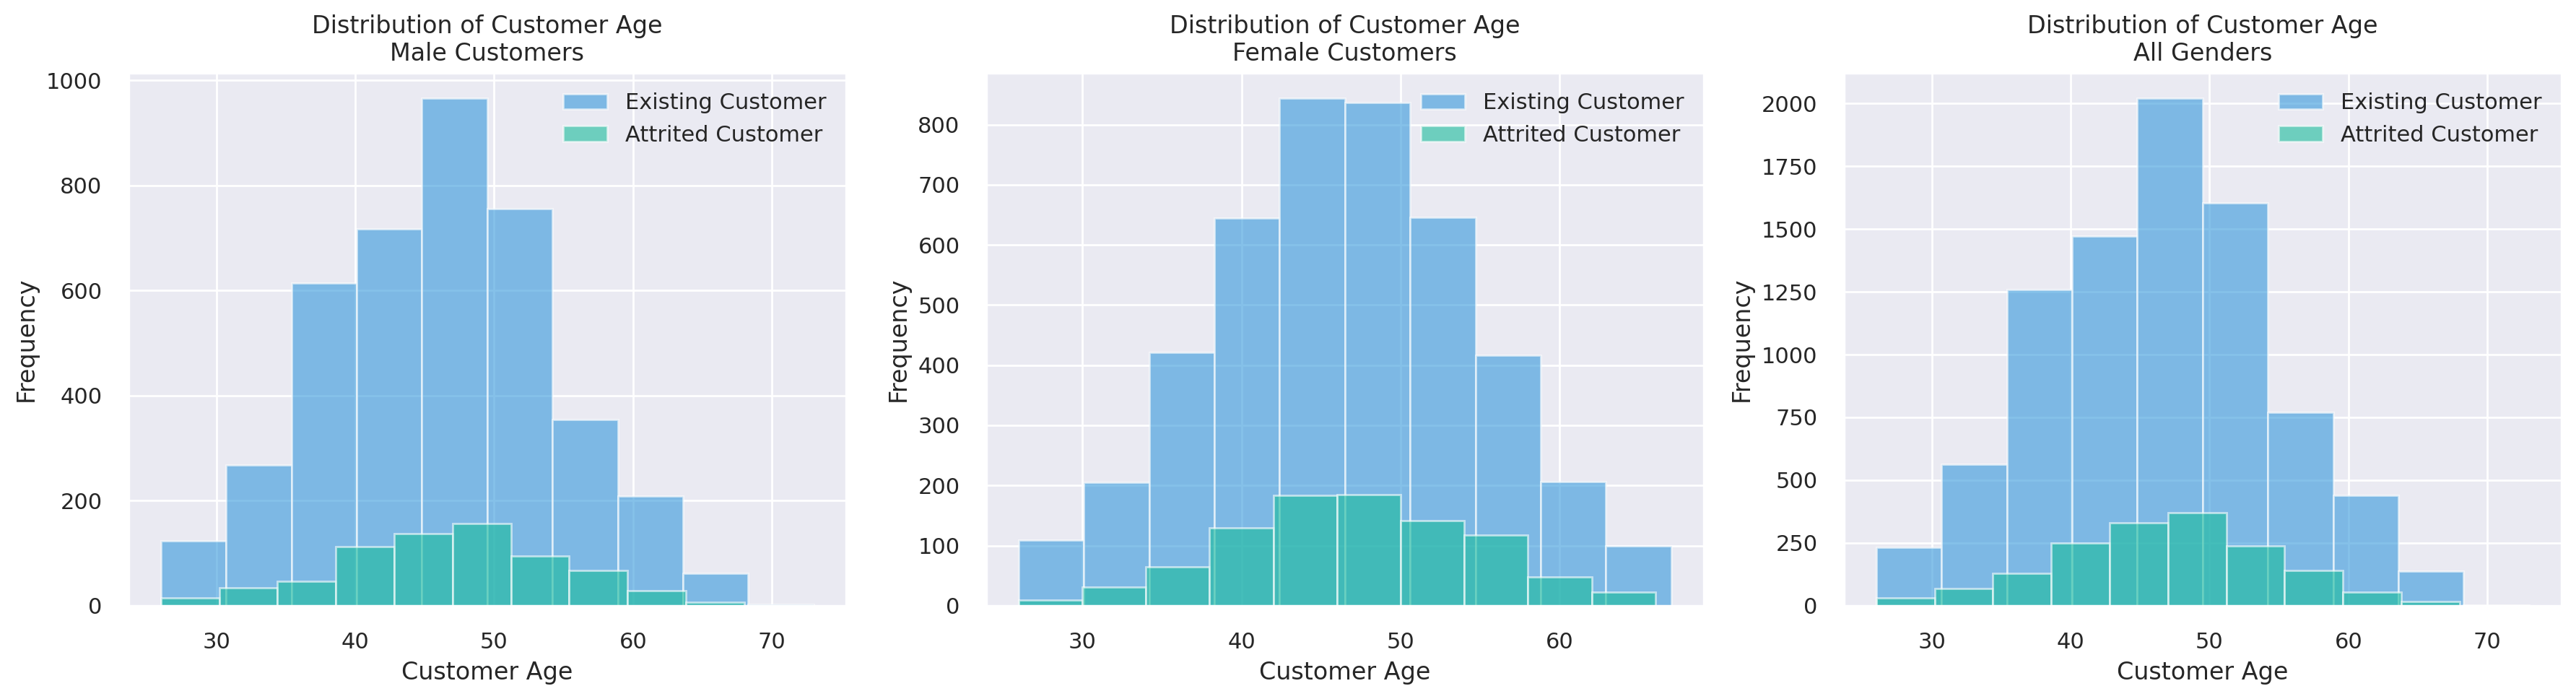

In [101]:
# Filter the data based on attrition
df_male_existing = df_bank[(df_bank['Attrition_Flag'] == 'Existing Customer') & (df_bank['Gender'] == 'M')]
df_male_attrited = df_bank[(df_bank['Attrition_Flag'] == 'Attrited Customer') & (df_bank['Gender'] == 'M')]
df_female_existing = df_bank[(df_bank['Attrition_Flag'] == 'Existing Customer') & (df_bank['Gender'] == 'F')]
df_female_attrited = df_bank[(df_bank['Attrition_Flag'] == 'Attrited Customer') & (df_bank['Gender'] == 'F')]
df_existing = df_bank[(df_bank['Attrition_Flag'] == 'Existing Customer') ]
df_attrited = df_bank[(df_bank['Attrition_Flag'] == 'Attrited Customer') ]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), dpi=200)

# Histogram 1: Male - Existing and Attrited Customers
ax1.hist(df_male_existing['Customer_Age'], bins=10, alpha=0.6, label='Existing Customer',color='#3498DB')
ax1.hist(df_male_attrited['Customer_Age'], bins=10, alpha=0.6, label='Attrited Customer',color='#1ABC9C')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Customer Age\nMale Customers')
ax1.legend()

# Histogram 2: Female - Existing and Attrited Customers
ax2.hist(df_female_existing['Customer_Age'], bins=10, alpha=0.6, label='Existing Customer',color='#3498DB')
ax2.hist(df_female_attrited['Customer_Age'], bins=10, alpha=0.6, label='Attrited Customer',color='#1ABC9C')
ax2.set_xlabel('Customer Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Customer Age\nFemale Customers')
ax2.legend()

# Histogram 3: All Genders - Existing and Attrited Customers
ax3.hist(df_existing['Customer_Age'], bins=10, alpha=0.6, label='Existing Customer',color='#3498DB')
ax3.hist(df_attrited['Customer_Age'], bins=10, alpha=0.6, label='Attrited Customer',color='#1ABC9C')
ax3.set_xlabel('Customer Age')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Customer Age\nAll Genders')
ax3.legend()

plt.tight_layout()

plt.show()


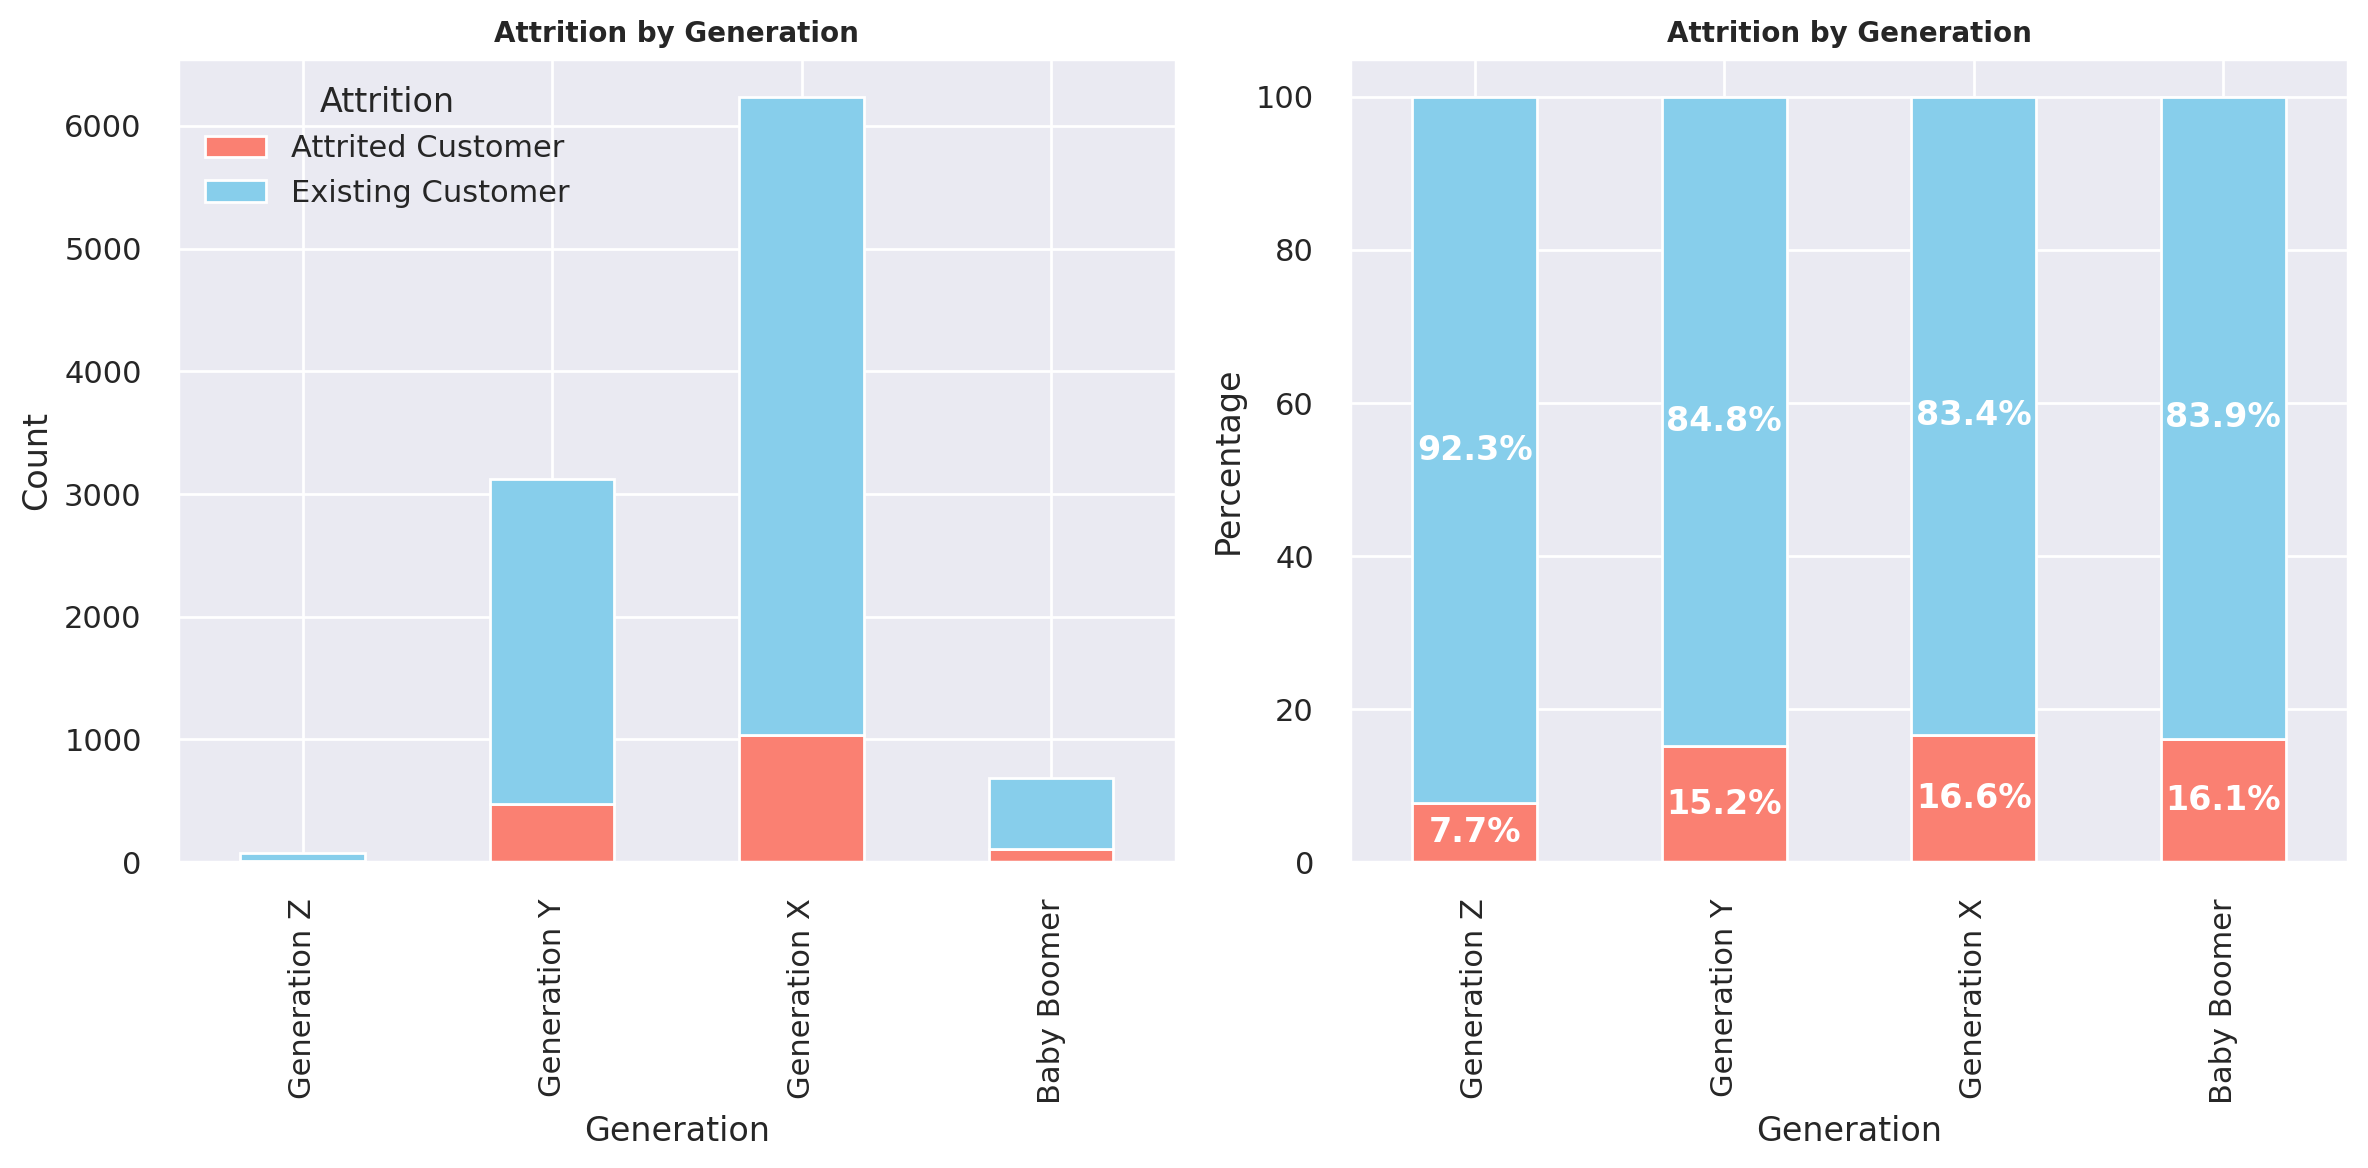

In [87]:
# Group the data by 'Attrition_Flag' and 'Generation' and calculate the count
# Create a mapping for Attrition_Encoded labels
attrition_labels = {
    0: 'Existing Customer',
    1: 'Attrited Customer'
}


df_bank['Attrition_Label'] = df_bank['Attrition_Encoded'].map(attrition_labels)

# Create a cross-tabulation between Generation and Attrition_Label
cross_tab = pd.crosstab(df_bank['Generation'], df_bank['Attrition_Label'])

# Calculate the percentages for each row
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Define darker colors for the bar charts
colors = ['salmon', 'skyblue']

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=200)

# Plot the cross-tabulation as a bar chart with darker colors
cross_tab.plot(kind='bar', stacked=True, ax=axs[0], color=colors)
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Count')
axs[0].set_title('Attrition by Generation',fontdict={'fontsize': 10, 'fontweight': 'bold'})
axs[0].legend(title='Attrition')

# Plot the cross-tabulation percentages as a bar chart with darker colors
cross_tab_percent.plot(kind='bar', stacked=True, ax=axs[1], color=colors)
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Percentage')
axs[1].set_title('Attrition by Generation',fontdict={'fontsize': 10, 'fontweight': 'bold'})
axs[1].legend().set_visible(False)  # Hide the legend

# Adding percentages on top of each bar with bigger font size
for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

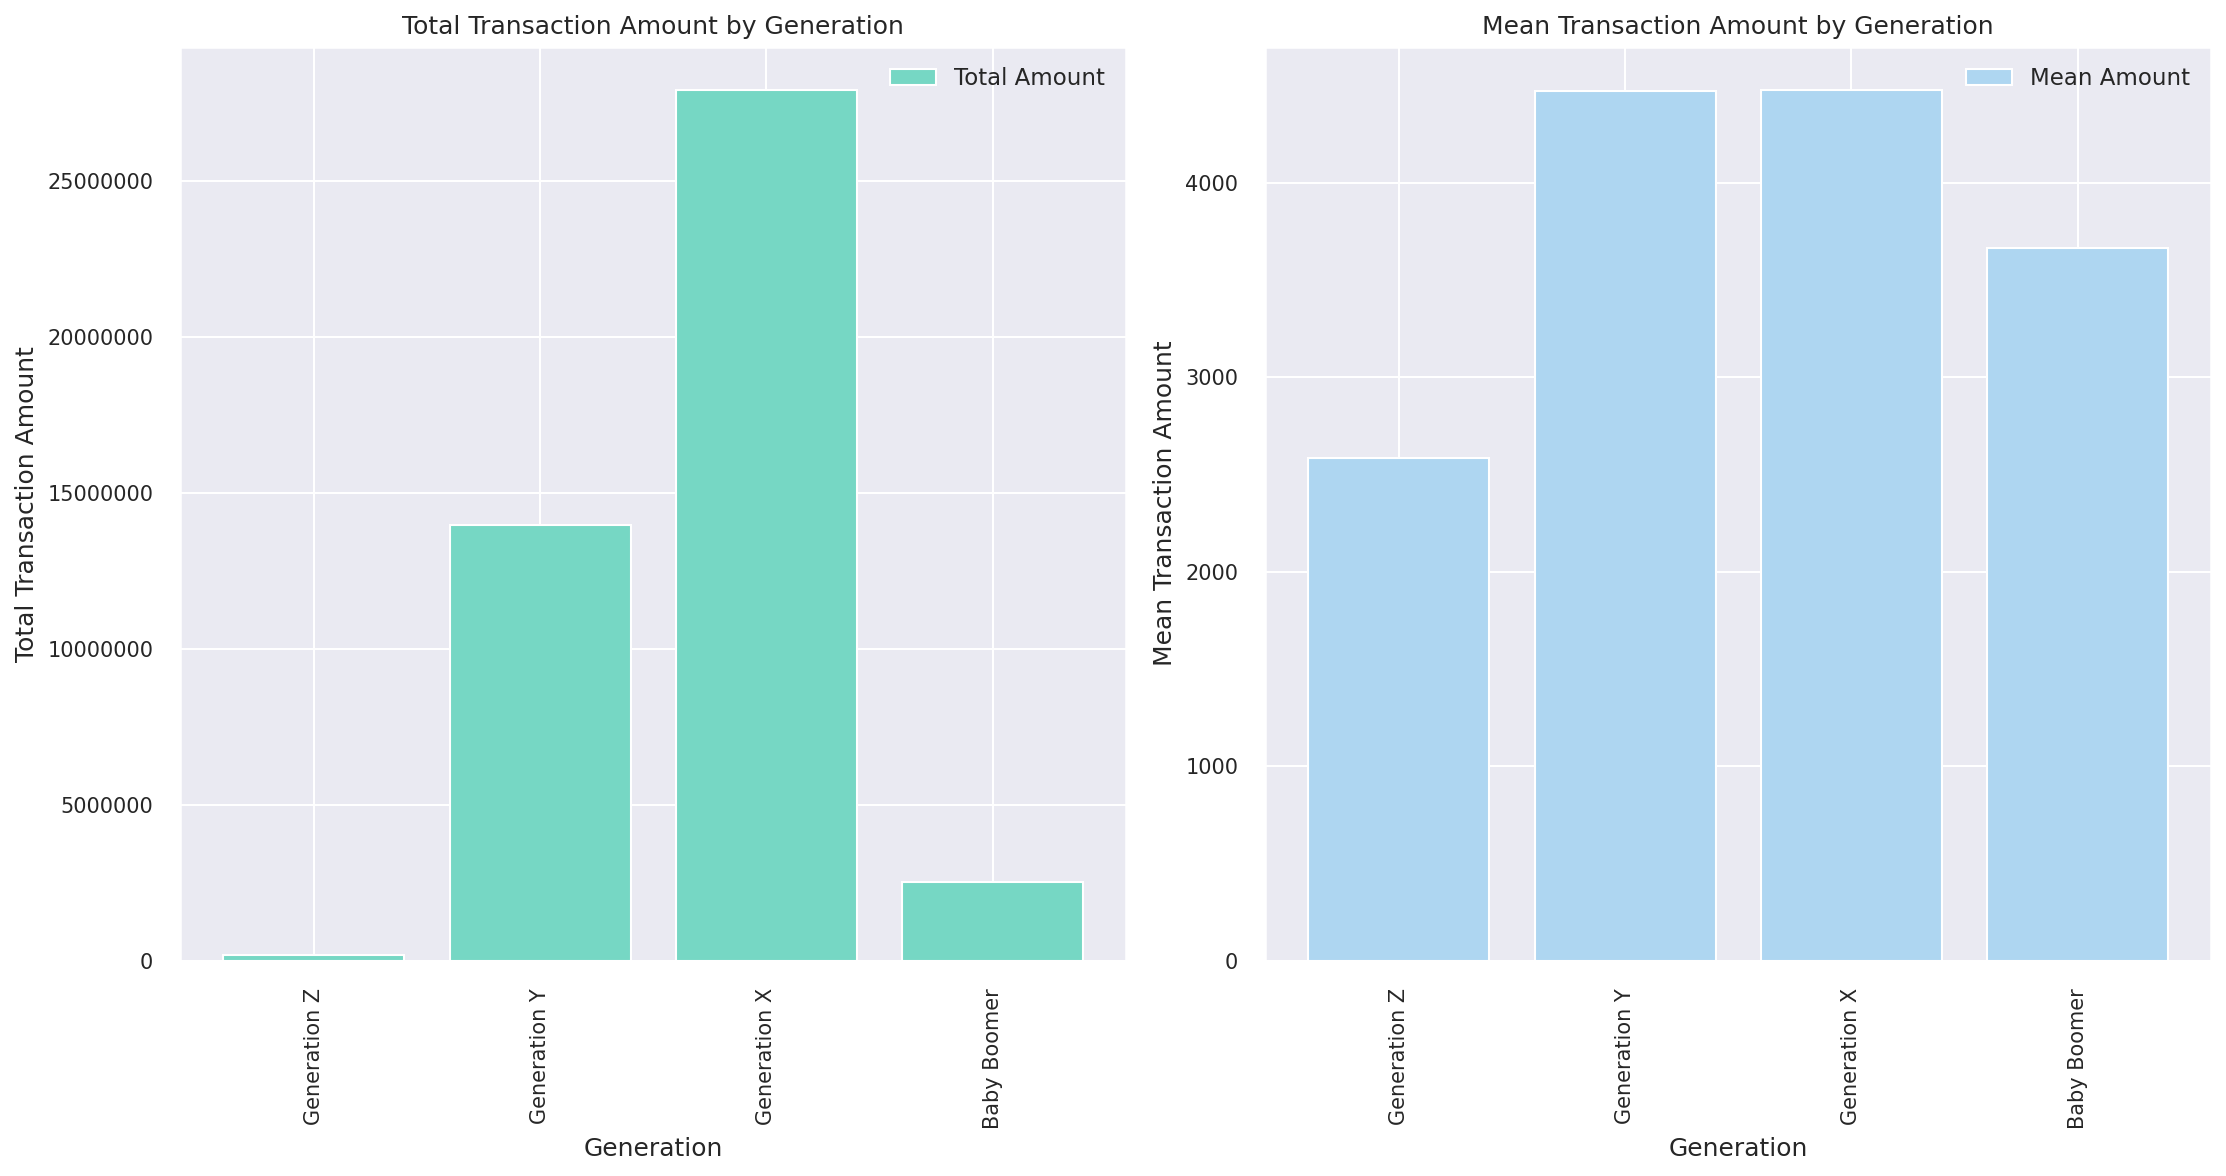

Generation
Generation Z    2586.641026
Generation Y    4469.251921
Generation X    4475.892239
Baby Boomer     3664.465893
Name: Total_Trans_Amt, dtype: float64


In [102]:
#Consider Generation
generation_ranges = {
    'Generation Z': (11, 26),
    'Generation Y': (27, 42),
    'Generation X': (43, 58),
    'Baby Boomer': (59, 120)  # Use a large upper bound for the last generation
}

# Create a new column 'Generation' based on the age ranges
df_bank['Generation'] = pd.cut(df_bank['Customer_Age'], bins=[0] + [r[1] for r in generation_ranges.values()], labels=list(generation_ranges.keys()))

generation_counts = df_bank['Generation'].value_counts().sort_index()

generation_totals = df_bank.groupby('Generation')['Total_Trans_Amt'].sum()
generation_means = df_bank.groupby('Generation')['Total_Trans_Amt'].mean()

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), dpi=150)

# Plot the total transaction amount as a bar plot
axs[0].bar(generation_totals.index, generation_totals.values, color='#76D7C4', label='Total Amount')
axs[0].set_ylabel('Total Transaction Amount')

# Plot the mean transaction amount as a bar plot
axs[1].bar(generation_means.index, generation_means.values, color='#AED6F1', label='Mean Amount')
axs[1].set_ylabel('Mean Transaction Amount')

# Set the x-axis labels and title for both subplots
axs[0].set_xlabel('Generation')
axs[0].set_title('Total Transaction Amount by Generation')

axs[1].set_xlabel('Generation')
axs[1].set_title('Mean Transaction Amount by Generation')

# Rotate the x-axis labels for better readability
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)

# Set the tick label font size for both subplots
axs[0].tick_params(axis='both', which='major', labelsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=10)

axs[0].get_yaxis().get_major_formatter().set_scientific(False)
axs[1].get_yaxis().get_major_formatter().set_scientific(False)

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()

print(generation_means)

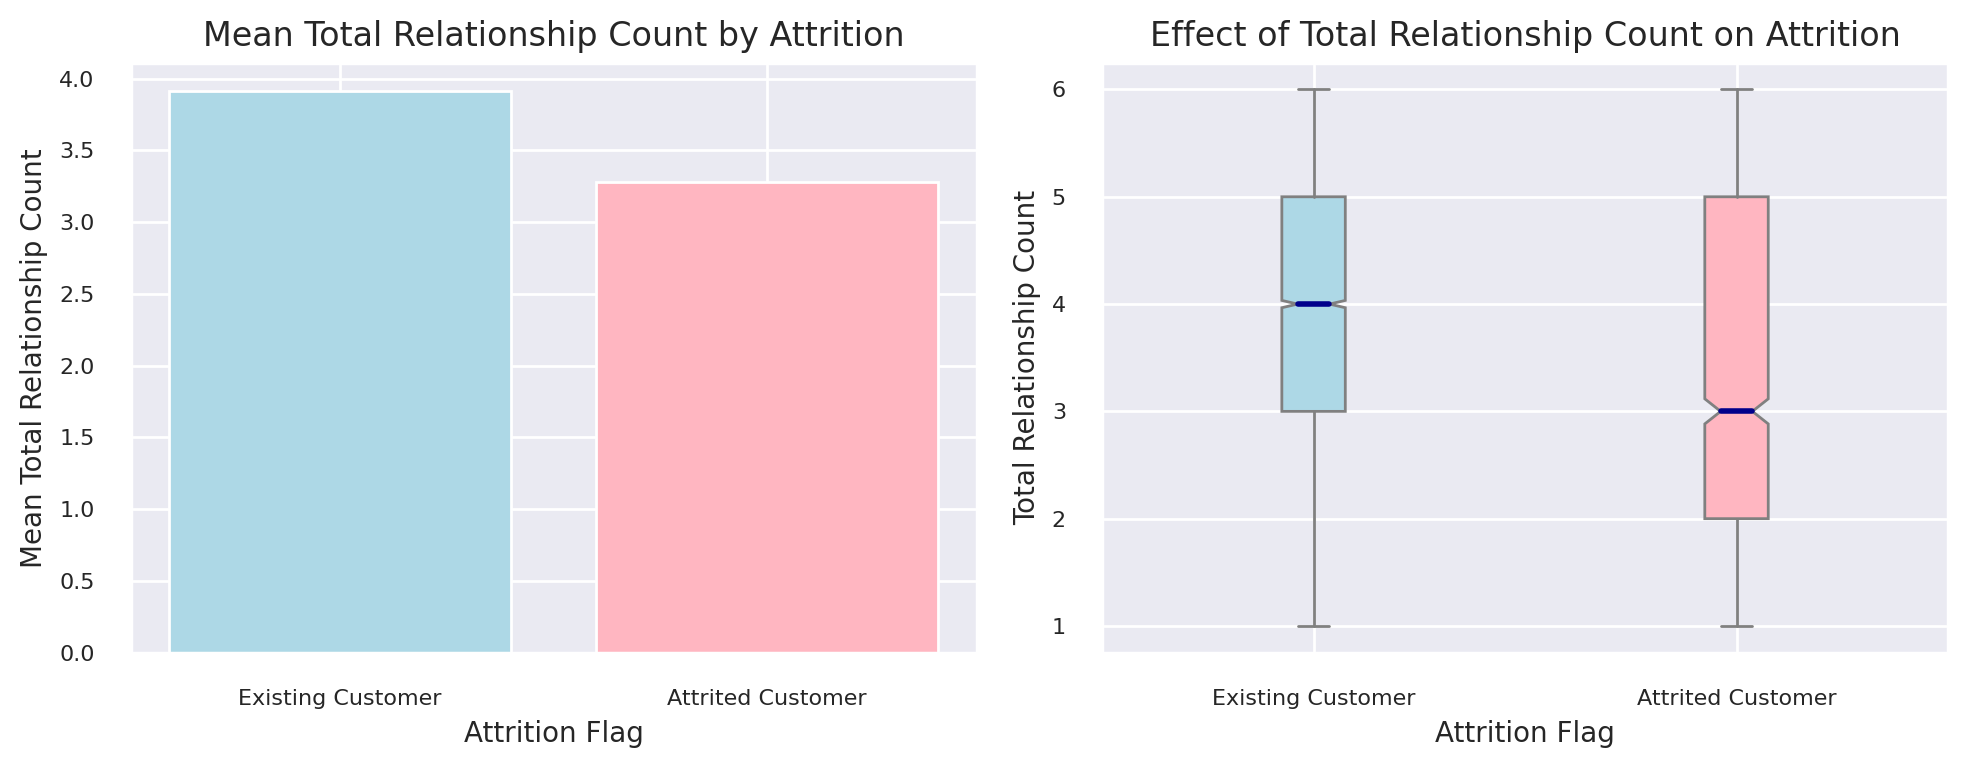

In [88]:
#Consider Mean Total Relationship Count by Attrition
# Filter the data based on attrition
df_existing = df_bank[df_bank['Attrition_Flag'] == 'Existing Customer']
df_attrited = df_bank[df_bank['Attrition_Flag'] == 'Attrited Customer']

# Calculate the mean Total_Relationship_Count for each group
mean_existing = df_existing['Total_Relationship_Count'].mean()
mean_attrited = df_attrited['Total_Relationship_Count'].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

# Grouped bar plot
ax1.bar(['Existing Customer', 'Attrited Customer'], [mean_existing, mean_attrited], color=['lightblue', 'lightpink'])
ax1.set_xlabel('Attrition Flag', fontsize=10)
ax1.set_ylabel('Mean Total Relationship Count', fontsize=10)
ax1.set_title('Mean Total Relationship Count by Attrition', fontsize=12)
ax1.tick_params(axis='x', labelrotation=0)
ax1.tick_params(axis='both', labelsize=8)

# Box plot
box_colors = ['lightblue', 'lightpink']
boxes = ax2.boxplot([df_existing['Total_Relationship_Count'], df_attrited['Total_Relationship_Count']],
                    labels=['Existing Customer', 'Attrited Customer'],
                    notch=True,
                    patch_artist=True,
                    boxprops={'facecolor': box_colors[0], 'edgecolor': 'gray'},
                    whiskerprops={'color': 'gray'},
                    capprops={'color': 'gray'},
                    medianprops={'color': 'darkblue', 'linewidth': 2},
                    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 4}
                    )
for patch, color in zip(boxes['boxes'], box_colors):
    patch.set_facecolor(color)
ax2.set_xlabel('Attrition Flag', fontsize=10)
ax2.set_ylabel('Total Relationship Count', fontsize=10)
ax2.set_title('Effect of Total Relationship Count on Attrition', fontsize=12)
ax2.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='both', labelsize=8)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


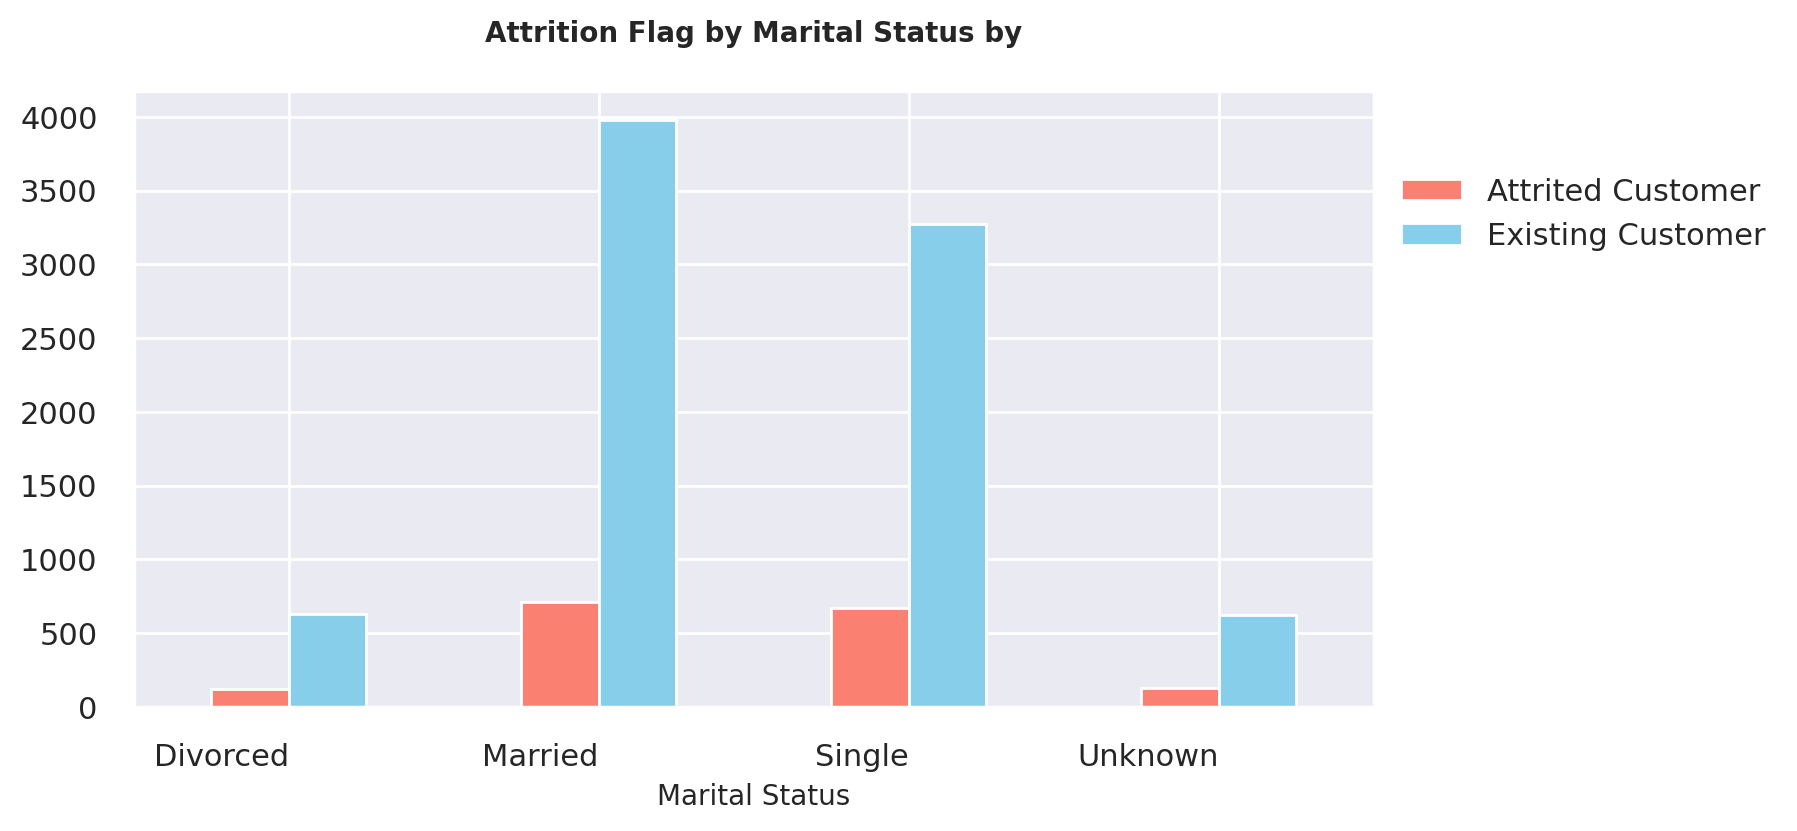

In [89]:
# Group the data by 'Marital_Status' and 'Attrition_Flag' columns
grouped_data = df_bank.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack().fillna(0)

colors = ['salmon', 'skyblue']
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
grouped_data.plot(kind='bar', color=colors, ax=ax)

# Set labels and title
ax.set_xlabel('Marital Status',fontsize=10)
ax.set_ylabel(None)
ax.set_title('Attrition Flag by Marital Status by\n', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

plt.show()

Text(0.5, 1.0, 'Count of Customers by Income Category and Attrition Flag')

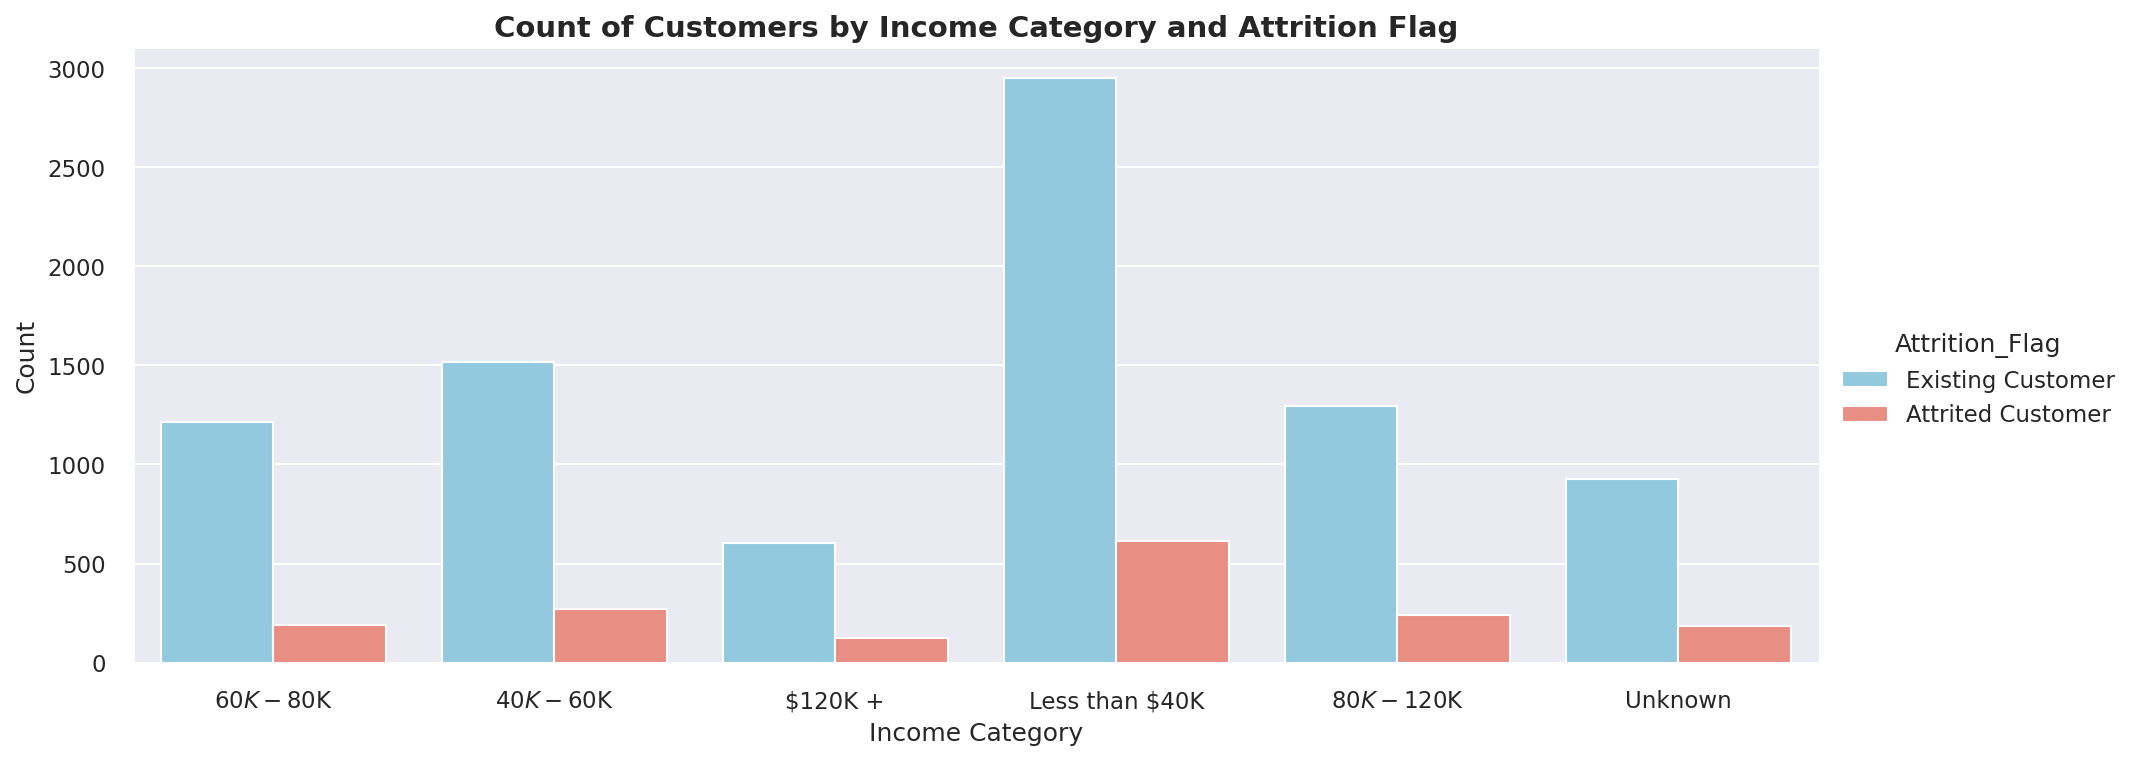

In [104]:
#Count of Customers by Income Category and Attrition Flag
# Plot with a figure-level function
custom_palette = ['skyblue', 'salmon']
sns.set(rc={'figure.dpi':150})
sns.catplot( kind='count',
             data=result,
             x='Income_Category',
             hue='Attrition_Flag',
             height=5, aspect=2.5,
               palette=custom_palette

        )

# Set axis labels and title
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Count of Customers by Income Category and Attrition Flag',fontsize=14, fontweight='bold')

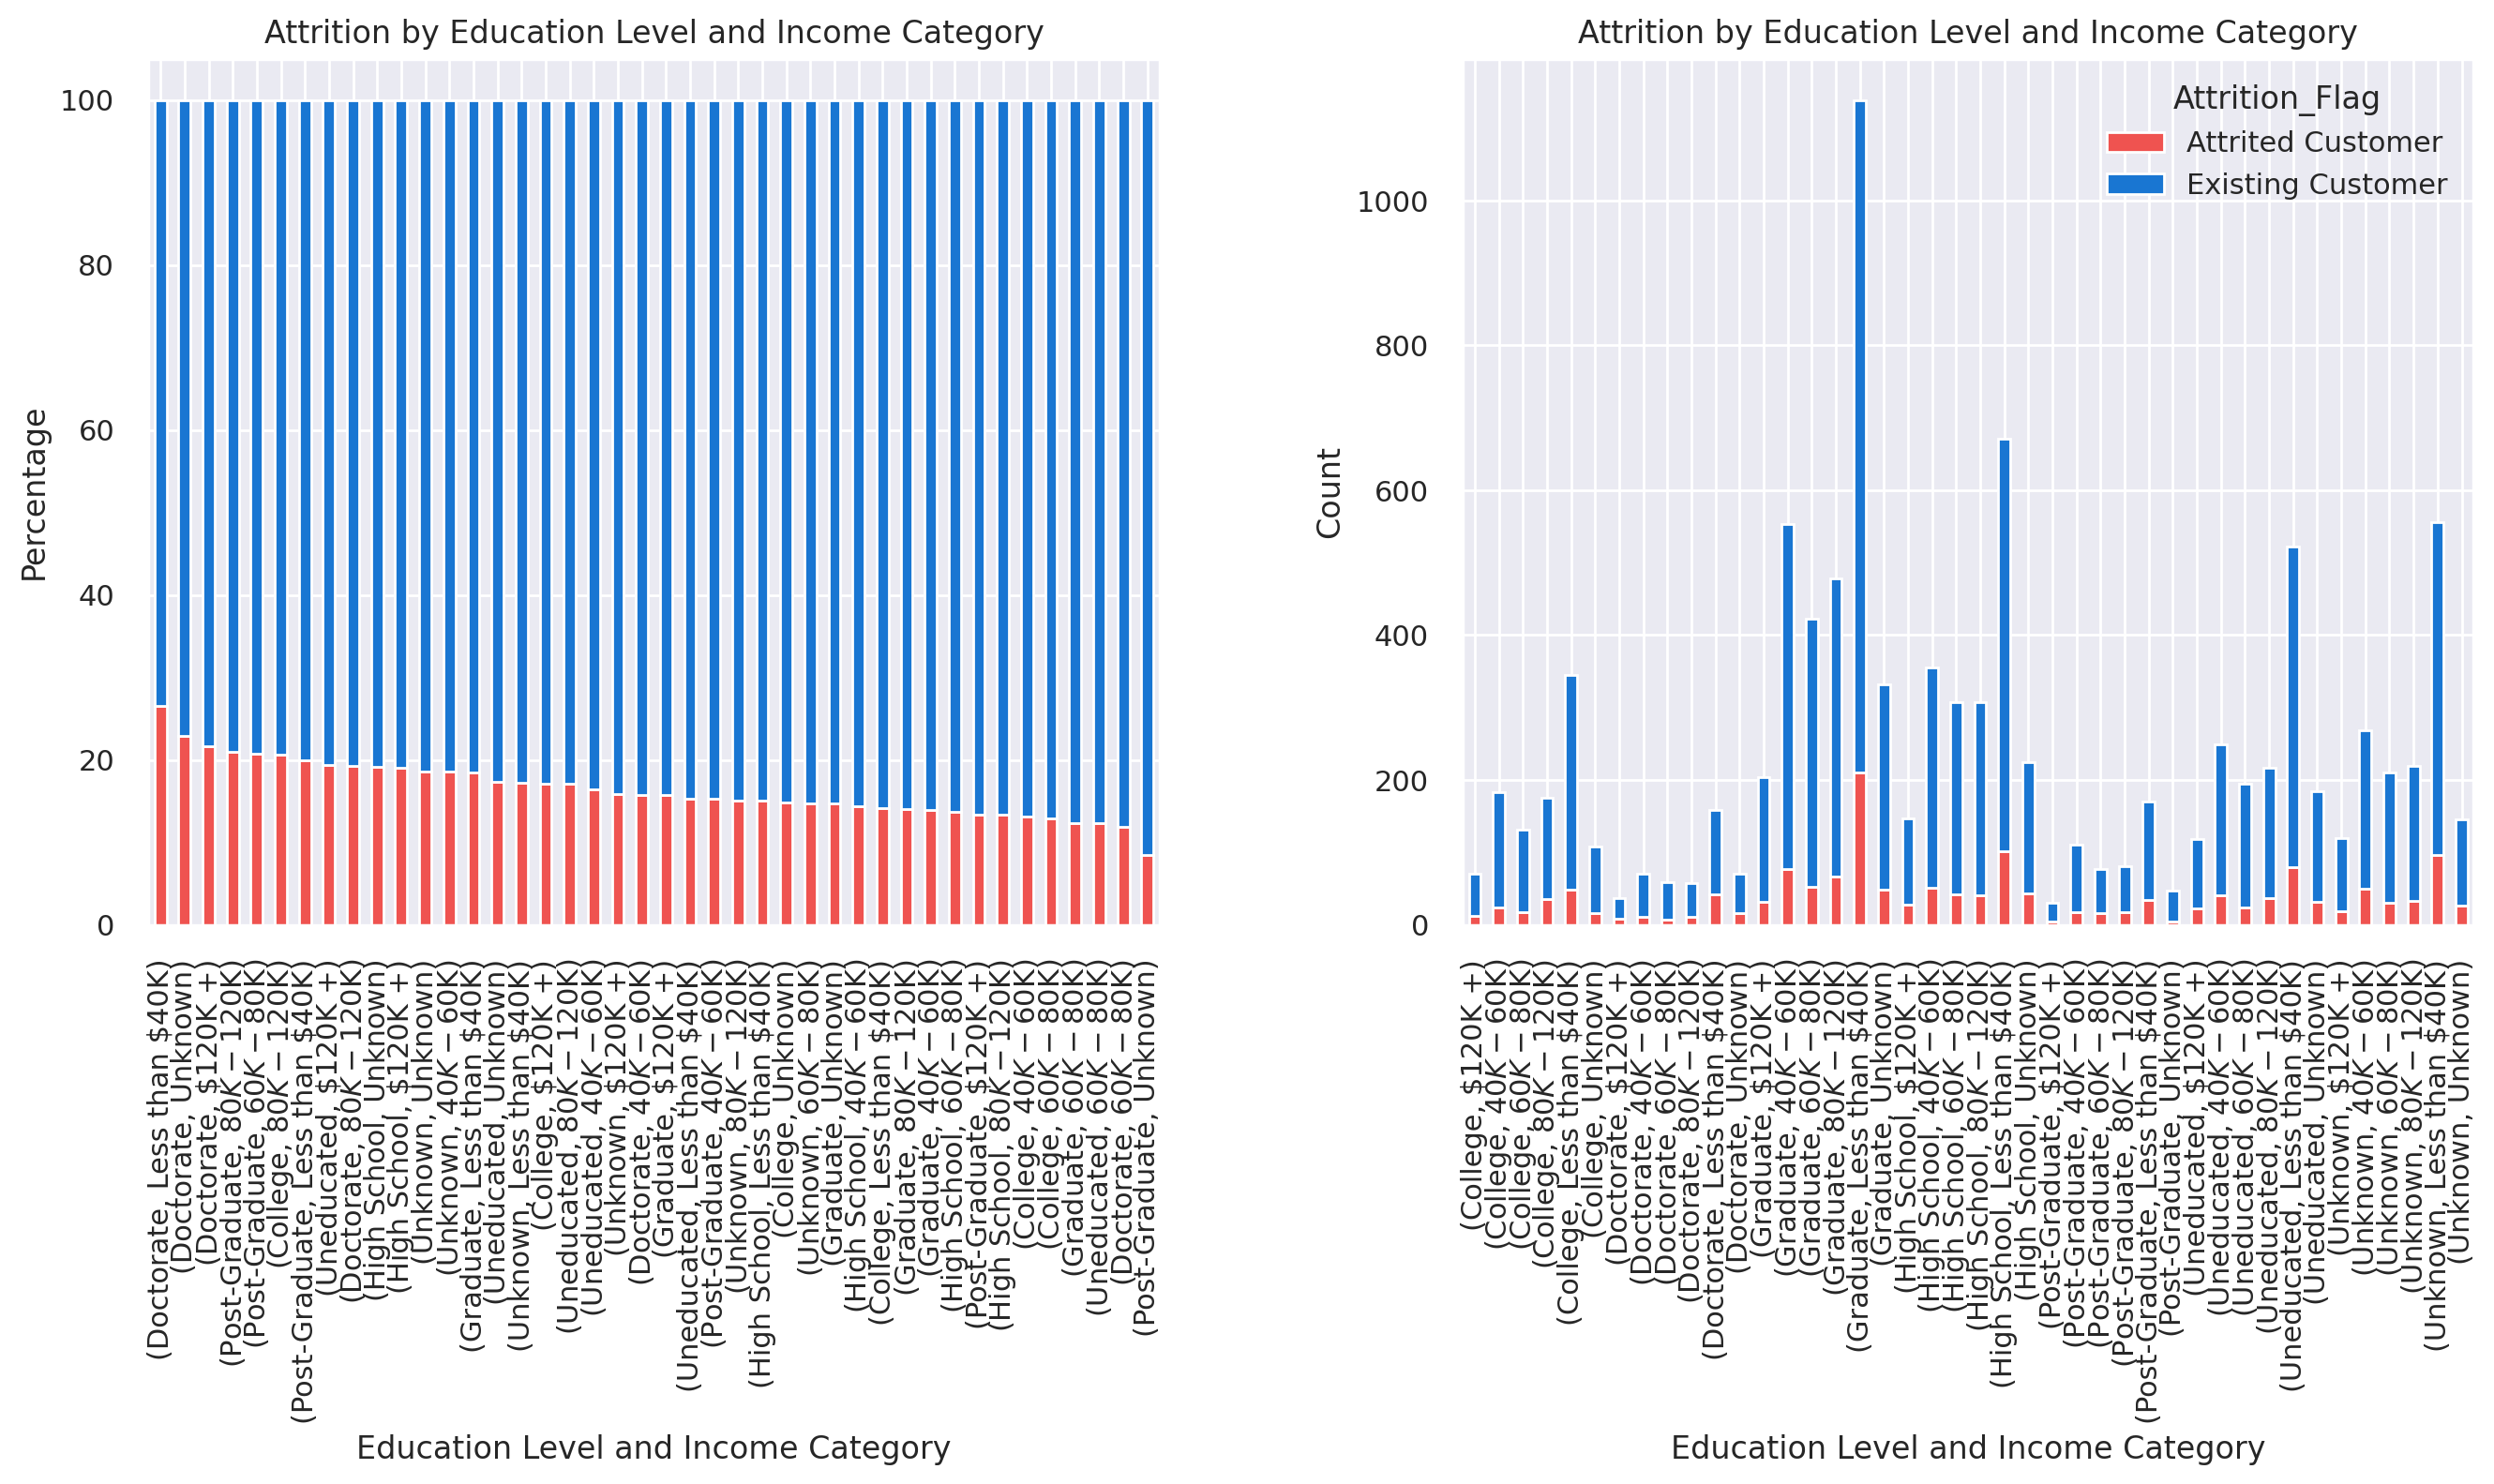

In [90]:
# Group the data by 'Education_Level', 'Income_Category', and 'Attrition_Flag' columns
grouped_data = df_bank.groupby(['Education_Level', 'Income_Category', 'Attrition_Flag']).size().unstack().fillna(0)

# Normalize the data to calculate percentages
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Sort the data by the highest percentage within each category
sorted_data = normalized_data.sort_values(by='Attrited Customer', ascending=False)

# Define the colors for the bars
colors = ['#EF5350', '#1976D2']

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=200)

# Plot the first stacked bar chart with percentages
ax1 = sorted_data.plot(kind='bar', stacked=True, color=colors, ax=axes[0])
ax1.set_xlabel('Education Level and Income Category')
ax1.set_ylabel('Percentage')
ax1.set_title('Attrition by Education Level and Income Category', fontsize=12)
ax1.legend([])  # Remove the legend

# Plot the second stacked bar chart without percentages
ax2 = grouped_data.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
ax2.set_xlabel('Education Level and Income Category')
ax2.set_ylabel('Count')
ax2.set_title('Attrition by Education Level and Income Category', fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.show()

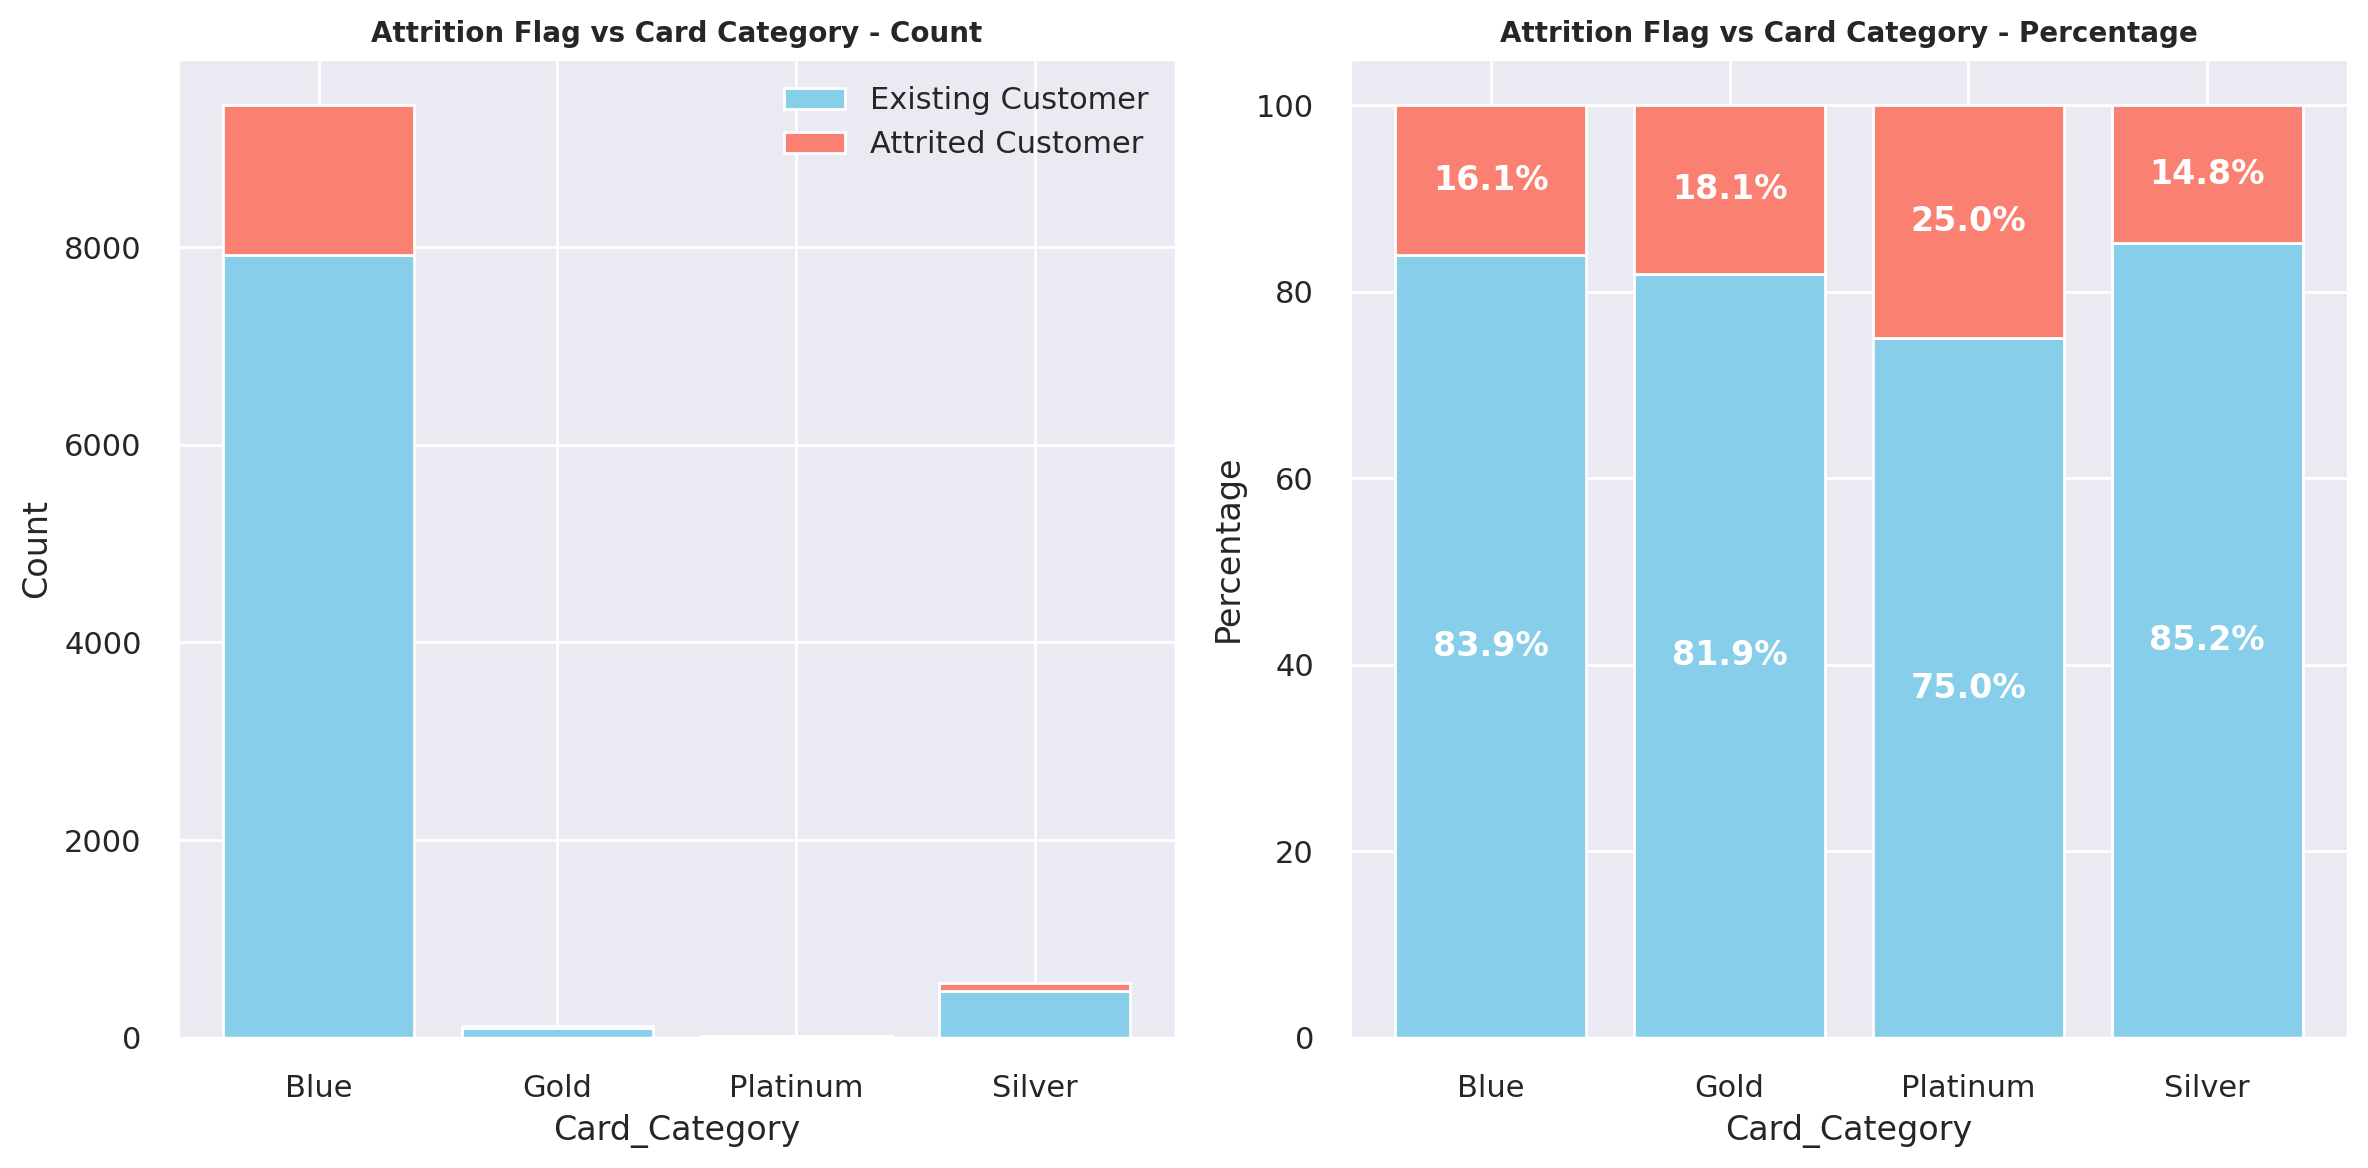

In [91]:
# Consider card category
grouped_counts = df_bank.groupby(['Card_Category', 'Attrition_Flag']).size().unstack()
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# Plotting count bar chart
axs[0].bar(grouped_counts.index, grouped_counts['Existing Customer'], label='Existing Customer', color='skyblue')
axs[0].bar(grouped_counts.index, grouped_counts['Attrited Customer'], label='Attrited Customer', bottom=grouped_counts['Existing Customer'], color='salmon')
axs[0].set_xlabel('Card_Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Attrition Flag vs Card Category - Count',fontdict={'fontsize': 10, 'fontweight': 'bold'})
axs[0].legend()

# Plotting percentage bar chart
axs[1].bar(grouped_percentages.index, grouped_percentages['Existing Customer'], label='Existing Customer', color='skyblue')
axs[1].bar(grouped_percentages.index, grouped_percentages['Attrited Customer'], label='Attrited Customer', bottom=grouped_percentages['Existing Customer'], color='salmon')
axs[1].set_xlabel('Card_Category')
axs[1].set_ylabel('Percentage')
axs[1].set_title('Attrition Flag vs Card Category - Percentage',fontdict={'fontsize': 10, 'fontweight': 'bold'})

# Adding percentages on top of each bar with bigger font size
for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, fontweight='bold', color='white')


plt.tight_layout()
plt.show()

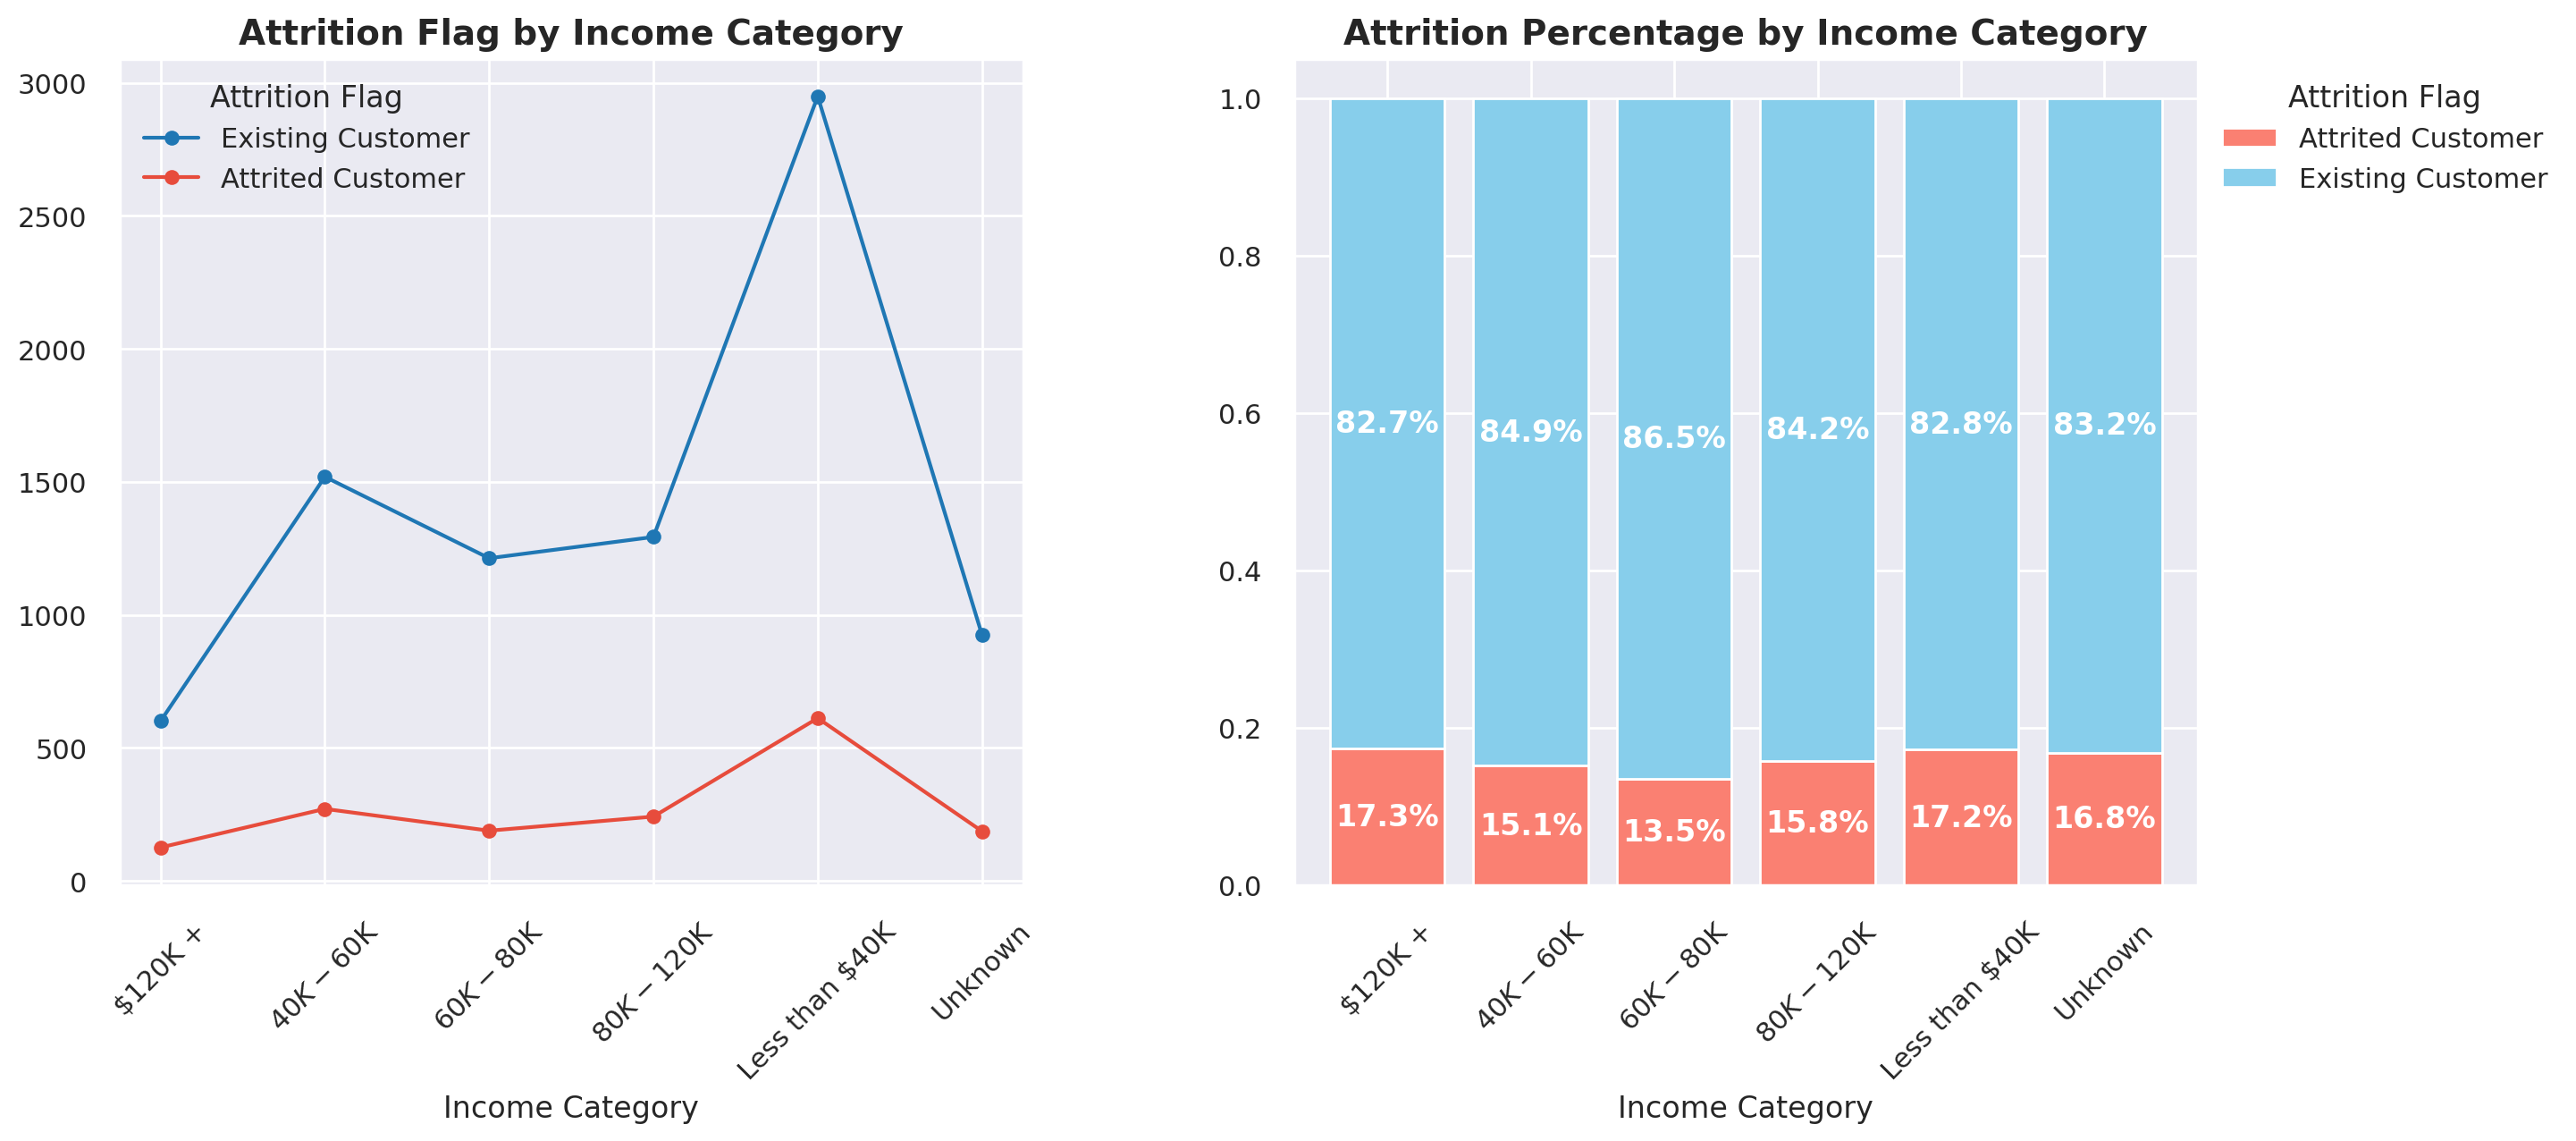

In [92]:
# Consider the data by 'Attrition_Flag' and 'Income_Category' and calculate the count

grouped_data = df_bank.groupby(['Attrition_Flag', 'Income_Category']).size().unstack()

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), dpi=200)

# Line plot for Existing Customer
ax1.plot(grouped_data.loc['Existing Customer'], marker='o', color='#1f77b4', label='Existing Customer')

# Line plot for Attrited Customer
ax1.plot(grouped_data.loc['Attrited Customer'], marker='o', color='#E74C3C', label='Attrited Customer')

ax1.set_xlabel('Income Category')
ax1.set_ylabel(None)
ax1.set_title('Attrition Flag by Income Category',fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax1.legend(title='Attrition Flag')
ax1.tick_params(axis='x', rotation=45)

# Group the data by 'Income_Category' and 'Attrition_Flag' and calculate the count
grouped_data = df_bank.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()

# Calculate the ratio of Attrition_Flag for each Income_Category
ratio_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Create a stacked bar plot

colors = ['salmon', 'skyblue']
bars = ratio_data.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax2)

# Add percentage labels to the bars
for container in bars.containers:
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        percentage = f'{height:.1%}'
        ax2.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Plot styling for Stacked bar plot
ax2.set_xlabel('Income Category')
ax2.set_ylabel(None)
ax2.set_title('Attrition Percentage by Income Category',fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax2.legend(title='Attrition Flag', bbox_to_anchor=(1, 1),)
ax2.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

plt.show()

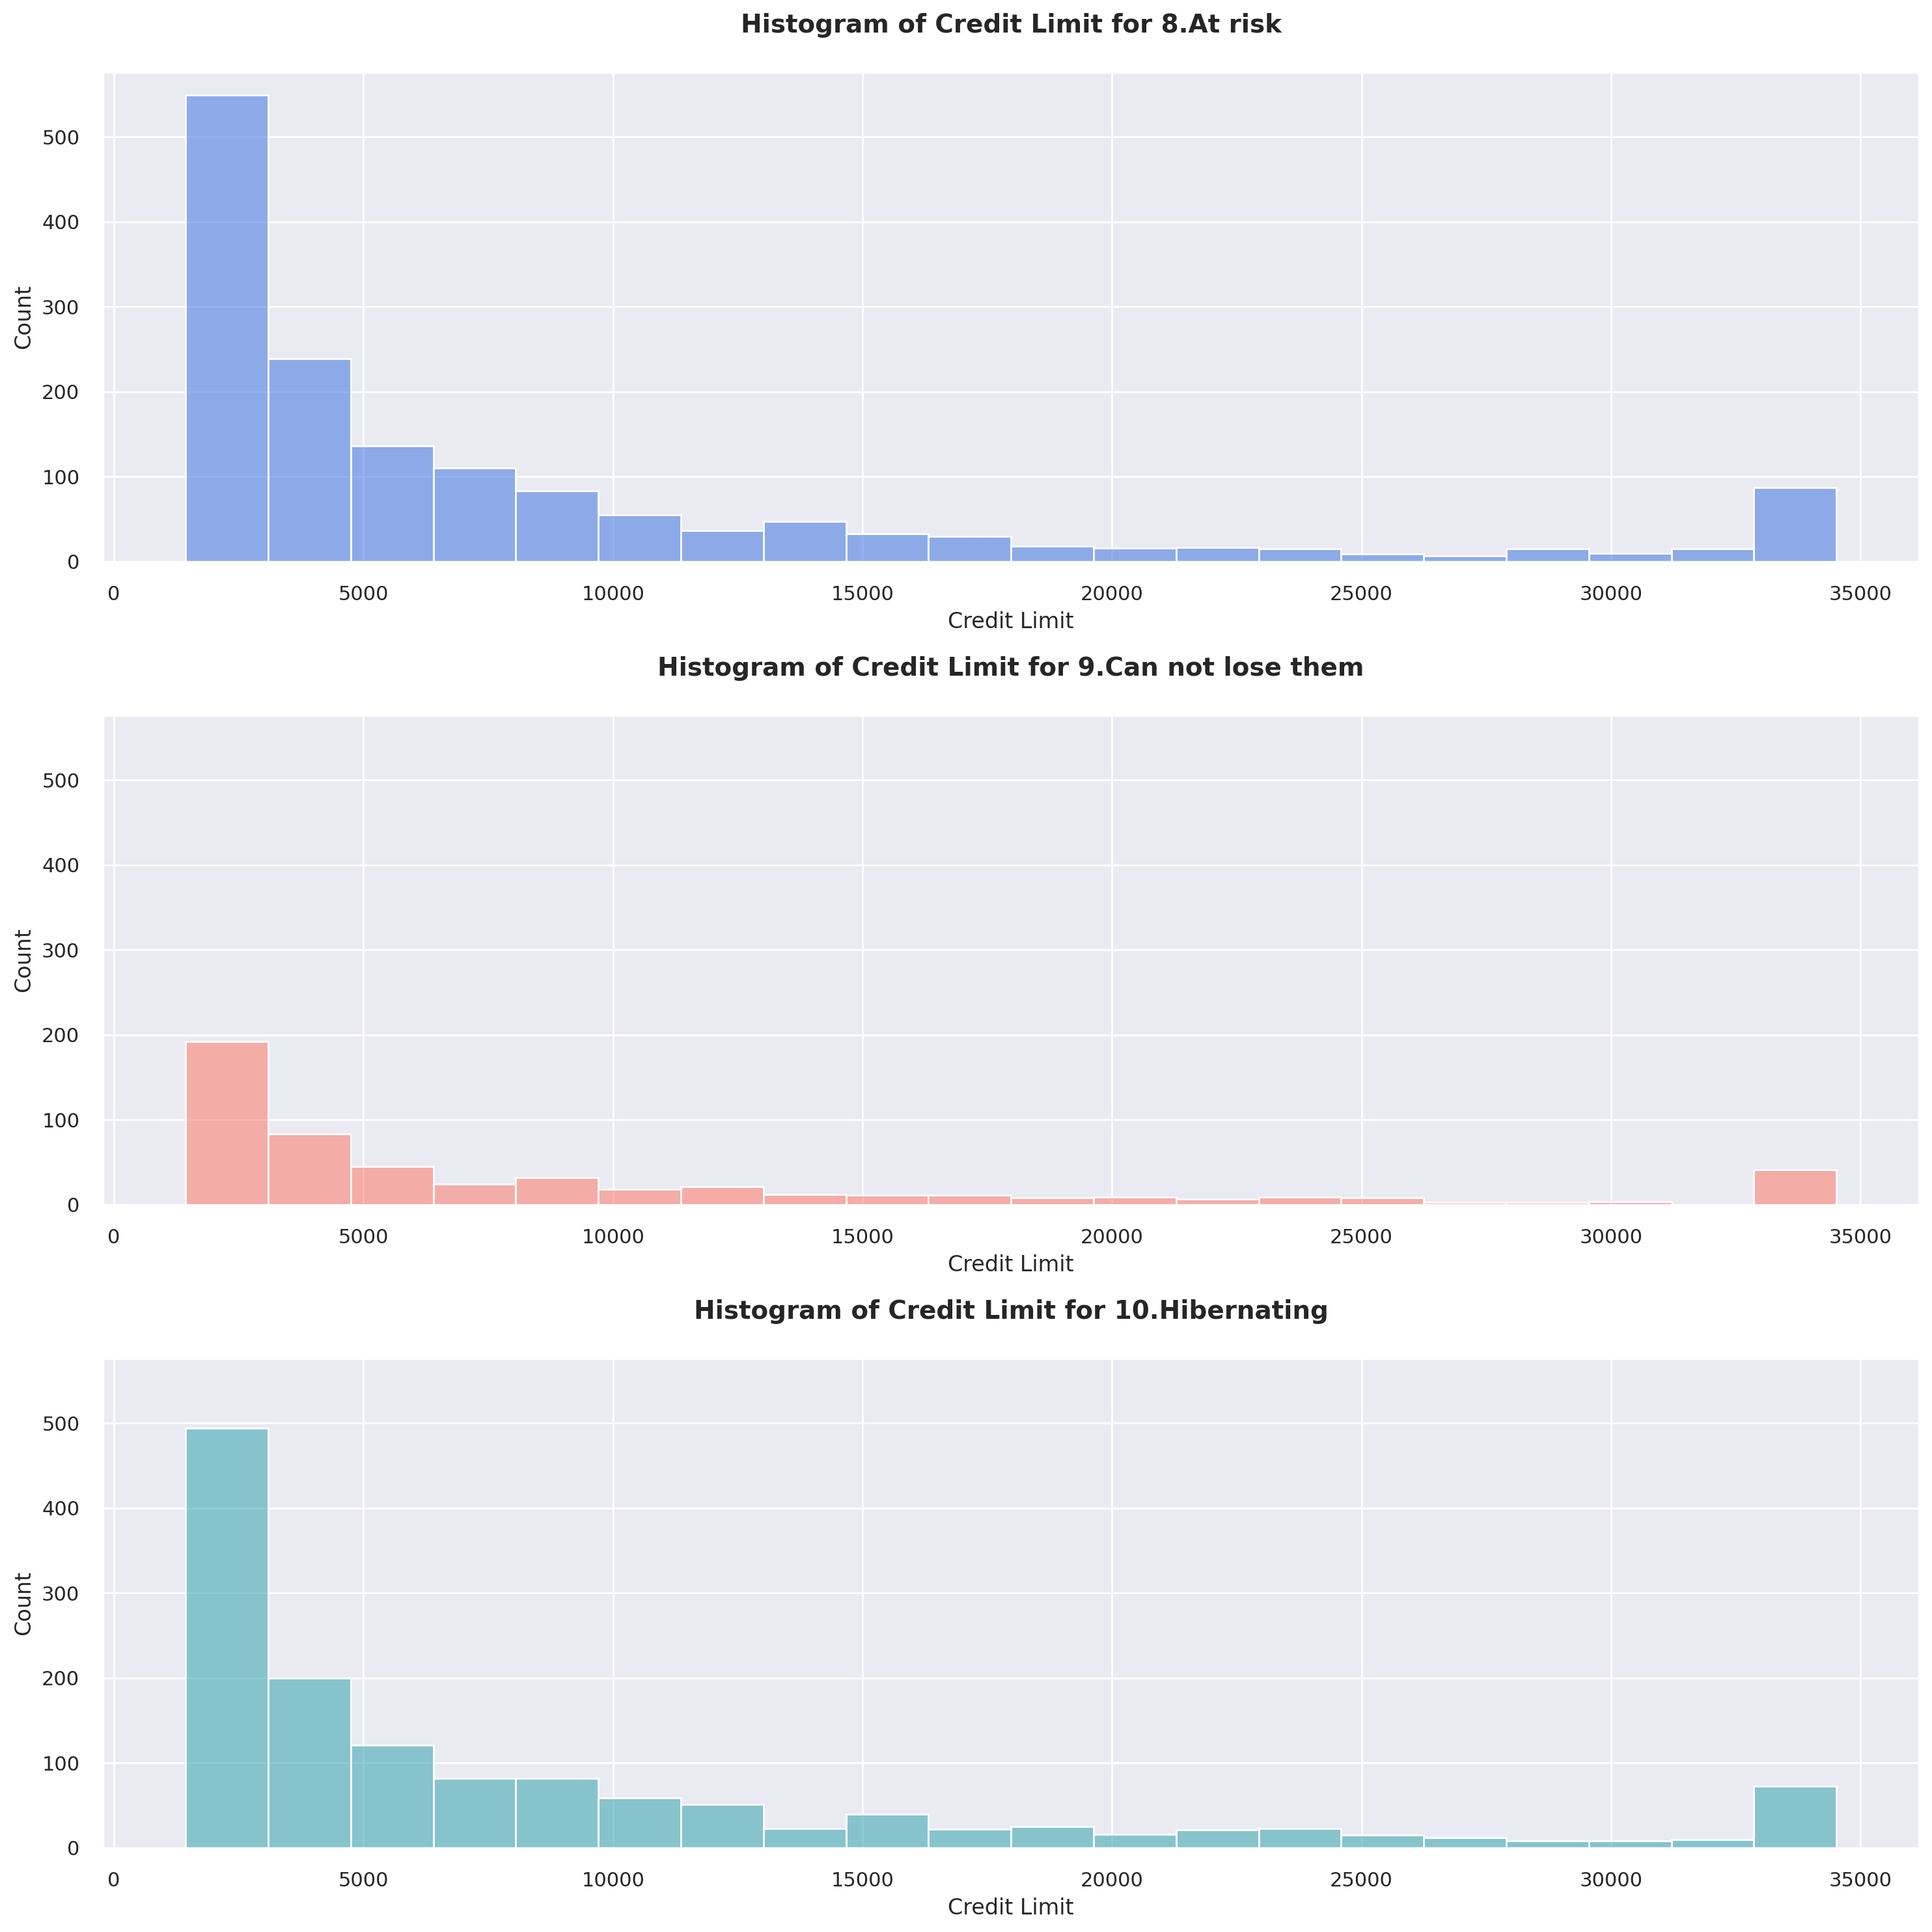

In [93]:
#Consider Customer's Credit Limit for Gr. 8, 9, 10
# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Define colors for each segment
colors = ['#4F80E2', '#FC8476', '#45AAB4']

# Set up the figure and subplots
sns.set(rc={'figure.dpi': 300})
fig, axes = plt.subplots(nrows=len(group_segments), figsize=(15, 5 * len(group_segments)), dpi=200, sharey=True)

# Plot histogram for each group segment
for i, segment in enumerate(group_segments):
    # Filter the data for the current group segment
    segment_data = result[result['Group Segment'] == segment]

    # Plot histogram with specified color
    ax = axes[i]
    sns.histplot(data=segment_data, x='Credit_Limit', bins=20, alpha=0.6, ax=ax, color=colors[i])

    # Set labels and title
    ax.set_xlabel('Credit Limit')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of Credit Limit for {segment}\n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Customers by Dependent_count and Attrition Flag')

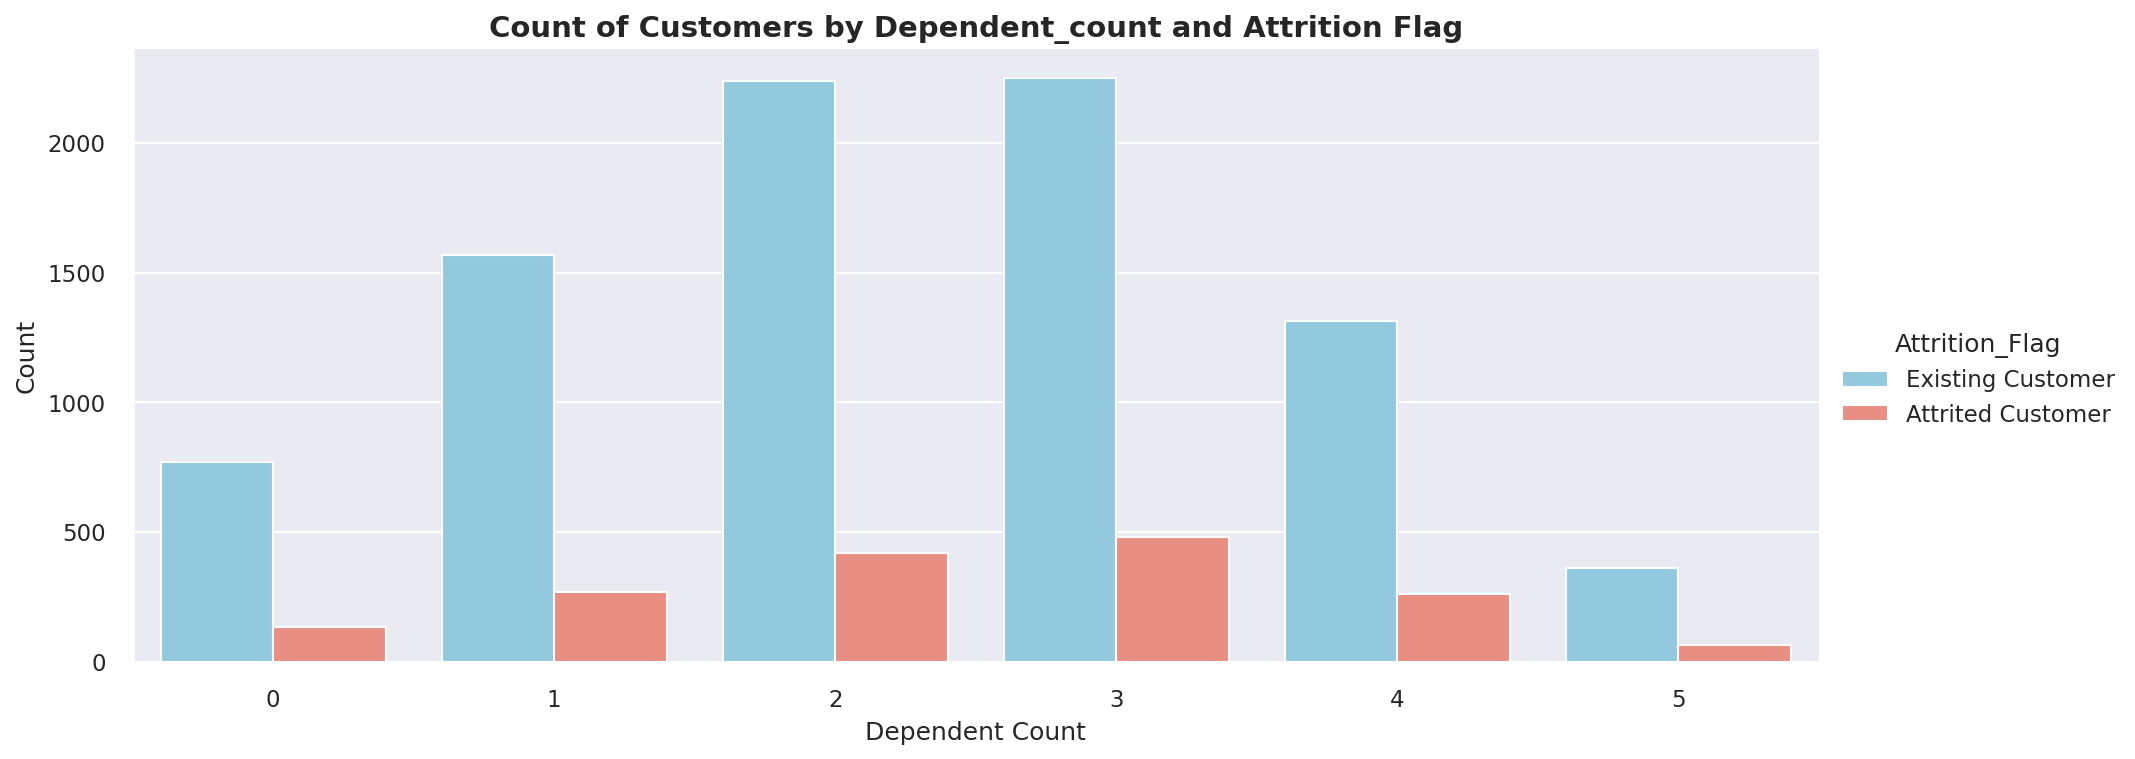

In [94]:
#Count of Customers by Dependent_count and Attrition Flag

custom_palette = ['skyblue', 'salmon']
# Plot with a figure-level function
sns.set(rc={'figure.dpi':150})
sns.catplot( kind='count',
             data=result,
             x='Dependent_count',
             palette=custom_palette,
             hue='Attrition_Flag',
             height=5, aspect=2.5
        )

# Set axis labels and title
plt.xlabel('Dependent Count')
plt.ylabel('Count')
plt.title('Count of Customers by Dependent_count and Attrition Flag',fontsize=14, fontweight='bold')

In [95]:
#Count of Customers by Months on Book and Attrition Flag

bin_width = 10

# Calculate the rounded bin edges
max_value = result['Months_on_book'].max()
num_bins = int(np.ceil(max_value / bin_width))
bin_edges = np.arange(0, (num_bins + 1) * bin_width, bin_width)

result['Months_on_book_bin'] = pd.cut(result['Months_on_book'], bins=bin_edges)

custom_palette = ['skyblue', 'salmon']
# Plot count plot
sns.set(rc={'figure.dpi': 150})
sns.catplot(kind='count',
            data=result,
            x='Months_on_book_bin',
            palette=custom_palette,
            hue='Attrition_Flag',
            height=5,
            aspect=2.5)

# Set axis labels and title
plt.xlabel('Months on Book')
plt.ylabel('Count')
plt.title('Count of Customers by Months on Book and Attrition Flag',fontsize=14, fontweight='bold')
plt.show()

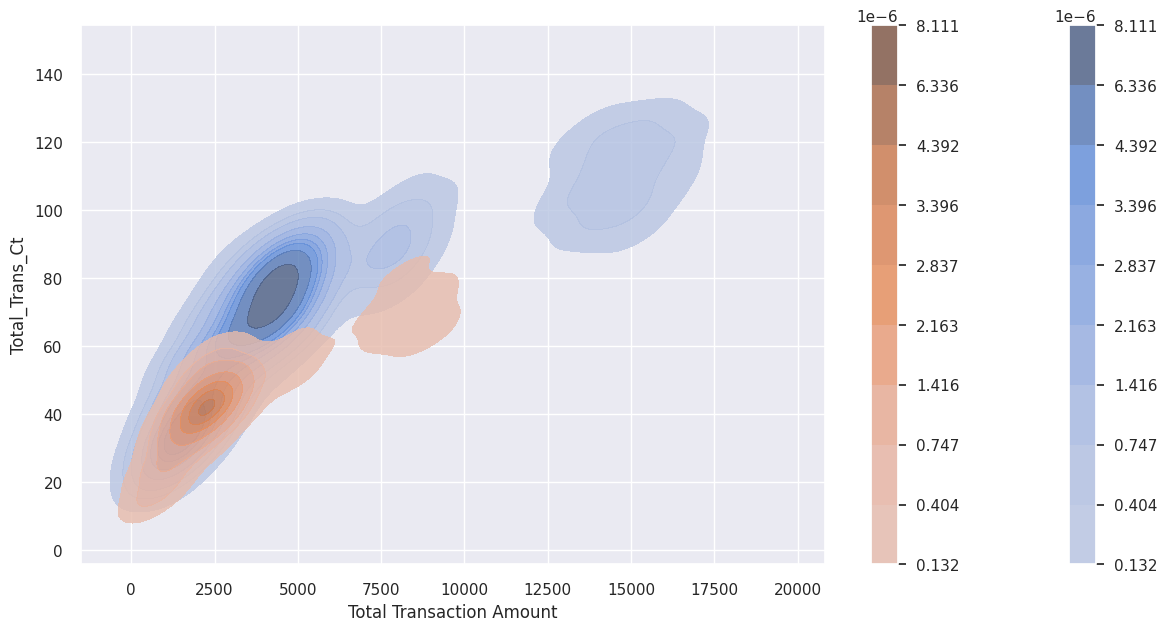

In [96]:
#Consider the relationship between Total Transaction Count and Total Transaction Amount

# Plot with an axes-level function (to avoid cluttering between legend and color bars)
plt.figure(figsize=(15, 7), dpi=100)
ax = plt.gca()
sns.kdeplot(
    ax=ax,
    data=result,
    x='Total_Trans_Amt', y='Total_Trans_Ct',
    hue='Attrition_Flag',
    fill=True,
    cbar=True,
    alpha=0.8
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Put the legend on the left-hand side

plt.xlabel('Total Transaction Amount')
plt.show()


In [97]:
#Consider Count of Customers by Contacts Count within 12 mon and Attrition Flag
# Plot with a figure-level function
custom_palette = ['skyblue', 'salmon']
sns.set(rc={'figure.dpi':150})
sns.catplot( kind='count',
             data=result,
             x='Contacts_Count_12_mon',
              palette=custom_palette,
             hue='Attrition_Flag',
             height=5, aspect=2.5,

        )

# Set axis labels and title
plt.xlabel('Contacts Count within 12 mon')
plt.ylabel('Count')
plt.title('Count of Customers by Contacts Count within 12 mon and Attrition Flag',fontsize=14, fontweight='bold')

plt.show()


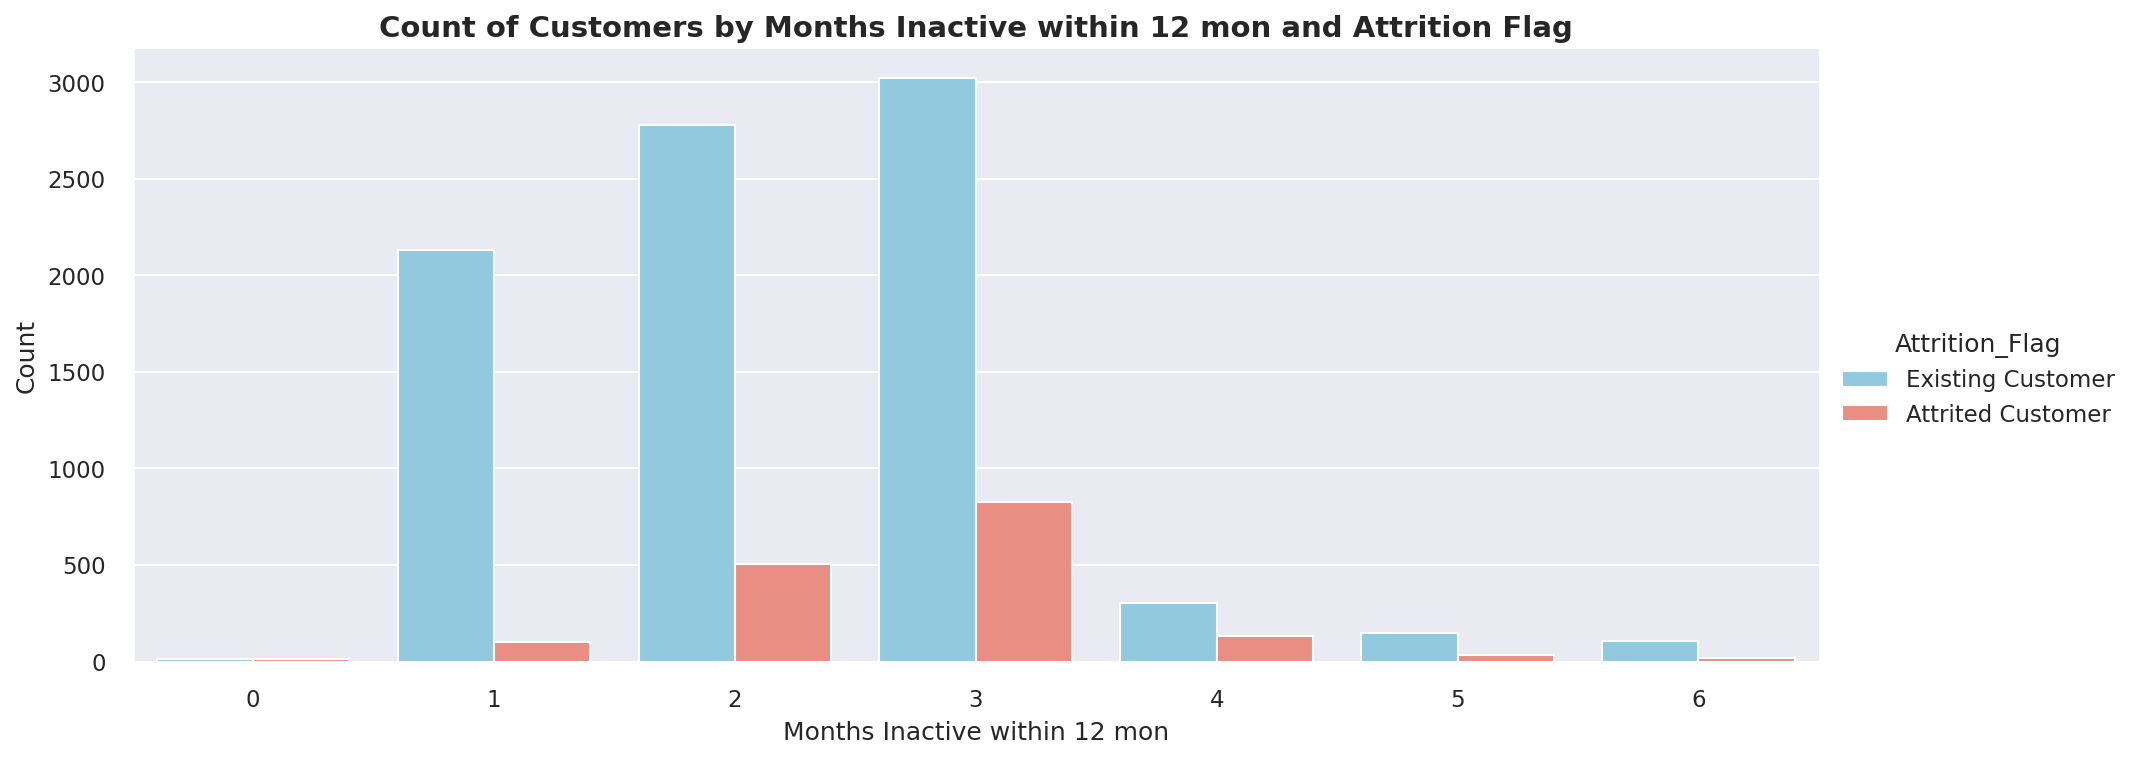

In [100]:
#Consider Count of Customers by Months Inactive within 12 mon and Attrition Flag
# Plot with a figure-level function
custom_palette = ['skyblue', 'salmon']
sns.set(rc={'figure.dpi':150})
sns.catplot( kind='count',
             data=result,
             x='Months_Inactive_12_mon',
             hue='Attrition_Flag',
             palette=custom_palette,
             height=5, aspect=2.5,

        )

# Set axis labels and title
plt.xlabel('Months Inactive within 12 mon')
plt.ylabel('Count')
plt.title('Count of Customers by Months Inactive within 12 mon and Attrition Flag',fontsize=14, fontweight='bold')

plt.show()

##Reference:

---

[1] https://how-many-steps-inc.webflow.io/rfm-segmentation-overview

[2] https://www.putler.com/rfm-analysis/

[3] https://www.linkedin.com/pulse/rfm-analysis-important-revenue-growth-analytics-capability-kakas/